# Graph State Benchmark Example

In [1]:
%load_ext autoreload
%autoreload 2

# Choose (or define) a backend

In [2]:
#backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"

**Set IQM Token if using Resonance.**

In [ ]:
import os
token = "XXXXXXX"
os.environ["IQM_TOKEN"] = token

# from iqm.benchmarks.utils import get_iqm_backend
# backend=get_iqm_backend("garnet")

from iqm.qiskit_iqm.iqm_provider import IQMProvider
iqm_url="XXXXXXXXXXXXXXXXXXXXXXXXX"
provider = IQMProvider(iqm_url)
backend = provider.get_backend()

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Graph State Configuration

In [ ]:
from iqm.benchmarks.entanglement.graph_states import *

In [6]:
EXAMPLE_GRAPHSTATE = GraphStateConfiguration(
    qubits=list(range(22)),
    shots=2**12,
    tomography="state_tomography",
    num_bootstraps = 150,
    # n_random_unitaries=25,
    # n_median_of_means=4,
    #max_gates_per_batch=40_000,
)

In [7]:
benchmark_graphstate = GraphStateBenchmark(backend, EXAMPLE_GRAPHSTATE)
run_graphstate = benchmark_graphstate.run()

2025-03-01 11:38:09,060 - iqm.benchmarks.logging_config - INFO - Identifying qubit pairs and neighbor groups for the Graph State benchmark
2025-03-01 11:38:09,063 - iqm.benchmarks.logging_config - INFO - Performing state tomography of all qubit pairs
2025-03-01 11:38:09,063 - iqm.benchmarks.logging_config - INFO - Now on group 1/11
2025-03-01 11:38:09,064 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (19, 18) and neighbors {10, 11, 17, 20}
2025-03-01 11:38:09,069 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (3, 4) and neighbors {0, 2, 5, 9, 10}
2025-03-01 11:38:09,073 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (15, 14) and neighbors {16, 7}
2025-03-01 11:38:09,076 - iqm.benchmarks.logging_config - INFO - Now on qubit pair (21, 13) and neighbors {20, 12}
2025-03-01 11:38:09,078 - iqm.benchmarks.logging_config - INFO - Submitting batch with 36 circuits corresponding to qubits [19, 18, 3, 4, 15, 14, 21, 13]
C:\Users\PedroFigueroaRomero\AppData\Ro

In [8]:
result_graphstate = benchmark_graphstate.analyze()

2025-03-01 11:48:21,415 - iqm.benchmarks.logging_config - INFO - Fetching dataset
2025-03-01 11:48:21,671 - iqm.benchmarks.logging_config - INFO - Dataset imported OK
2025-03-01 11:48:21,672 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 1/11
2025-03-01 11:48:22,973 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 2/11
2025-03-01 11:48:24,283 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 3/11
2025-03-01 11:48:25,230 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 4/11
2025-03-01 11:48:26,459 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 for qubit-pair group 5/11
2025-03-01 11:48:27,654 - iqm.benchmarks.logging_config - INFO - Retrieving tomography-reconstructed states with 150 f

In [20]:
for idx, o in enumerate(result_graphstate.observations):
    if idx == 0:
        print(f"Observations: {o.name}\n****************************\n")
    print(f"{o.identifier.qubit_indices}: {100.0*(o.value/0.5):.2f} +/- {100.0*(o.uncertainty/0.5):.2f} %")

Observations: max_negativity
****************************

(19, 18): 25.78 +/- 5.55 %
(3, 4): 66.06 +/- 5.02 %
(15, 14): 64.17 +/- 1.75 %
(21, 13): 55.75 +/- 2.03 %
(5, 4): 67.33 +/- 11.24 %
(12, 13): 54.15 +/- 5.62 %
(17, 9): 71.02 +/- 6.24 %
(15, 7): 65.23 +/- 2.51 %
(19, 20): 32.72 +/- 3.80 %
(8, 9): 76.50 +/- 5.65 %
(5, 1): 49.06 +/- 4.95 %
(10, 9): 54.13 +/- 10.03 %
(15, 16): 60.51 +/- 3.78 %
(12, 6): 21.59 +/- 4.64 %
(0, 1): 55.76 +/- 1.91 %
(8, 2): 76.41 +/- 3.18 %
(17, 18): 57.82 +/- 3.97 %
(21, 20): 33.55 +/- 3.40 %
(5, 6): 62.96 +/- 3.45 %
(3, 2): 72.33 +/- 2.80 %
(10, 18): 37.82 +/- 6.71 %
(12, 20): 64.53 +/- 9.55 %
(3, 9): 69.12 +/- 5.65 %
(19, 11): 33.91 +/- 5.86 %
(8, 7): 71.71 +/- 3.01 %
(10, 11): 44.64 +/- 9.81 %
(17, 16): 68.37 +/- 3.89 %
(12, 11): 40.04 +/- 12.57 %
(0, 4): 63.59 +/- 4.03 %
(5, 11): 76.98 +/- 13.39 %
(8, 16): 68.23 +/- 4.61 %
(10, 4): 55.89 +/- 10.34 %


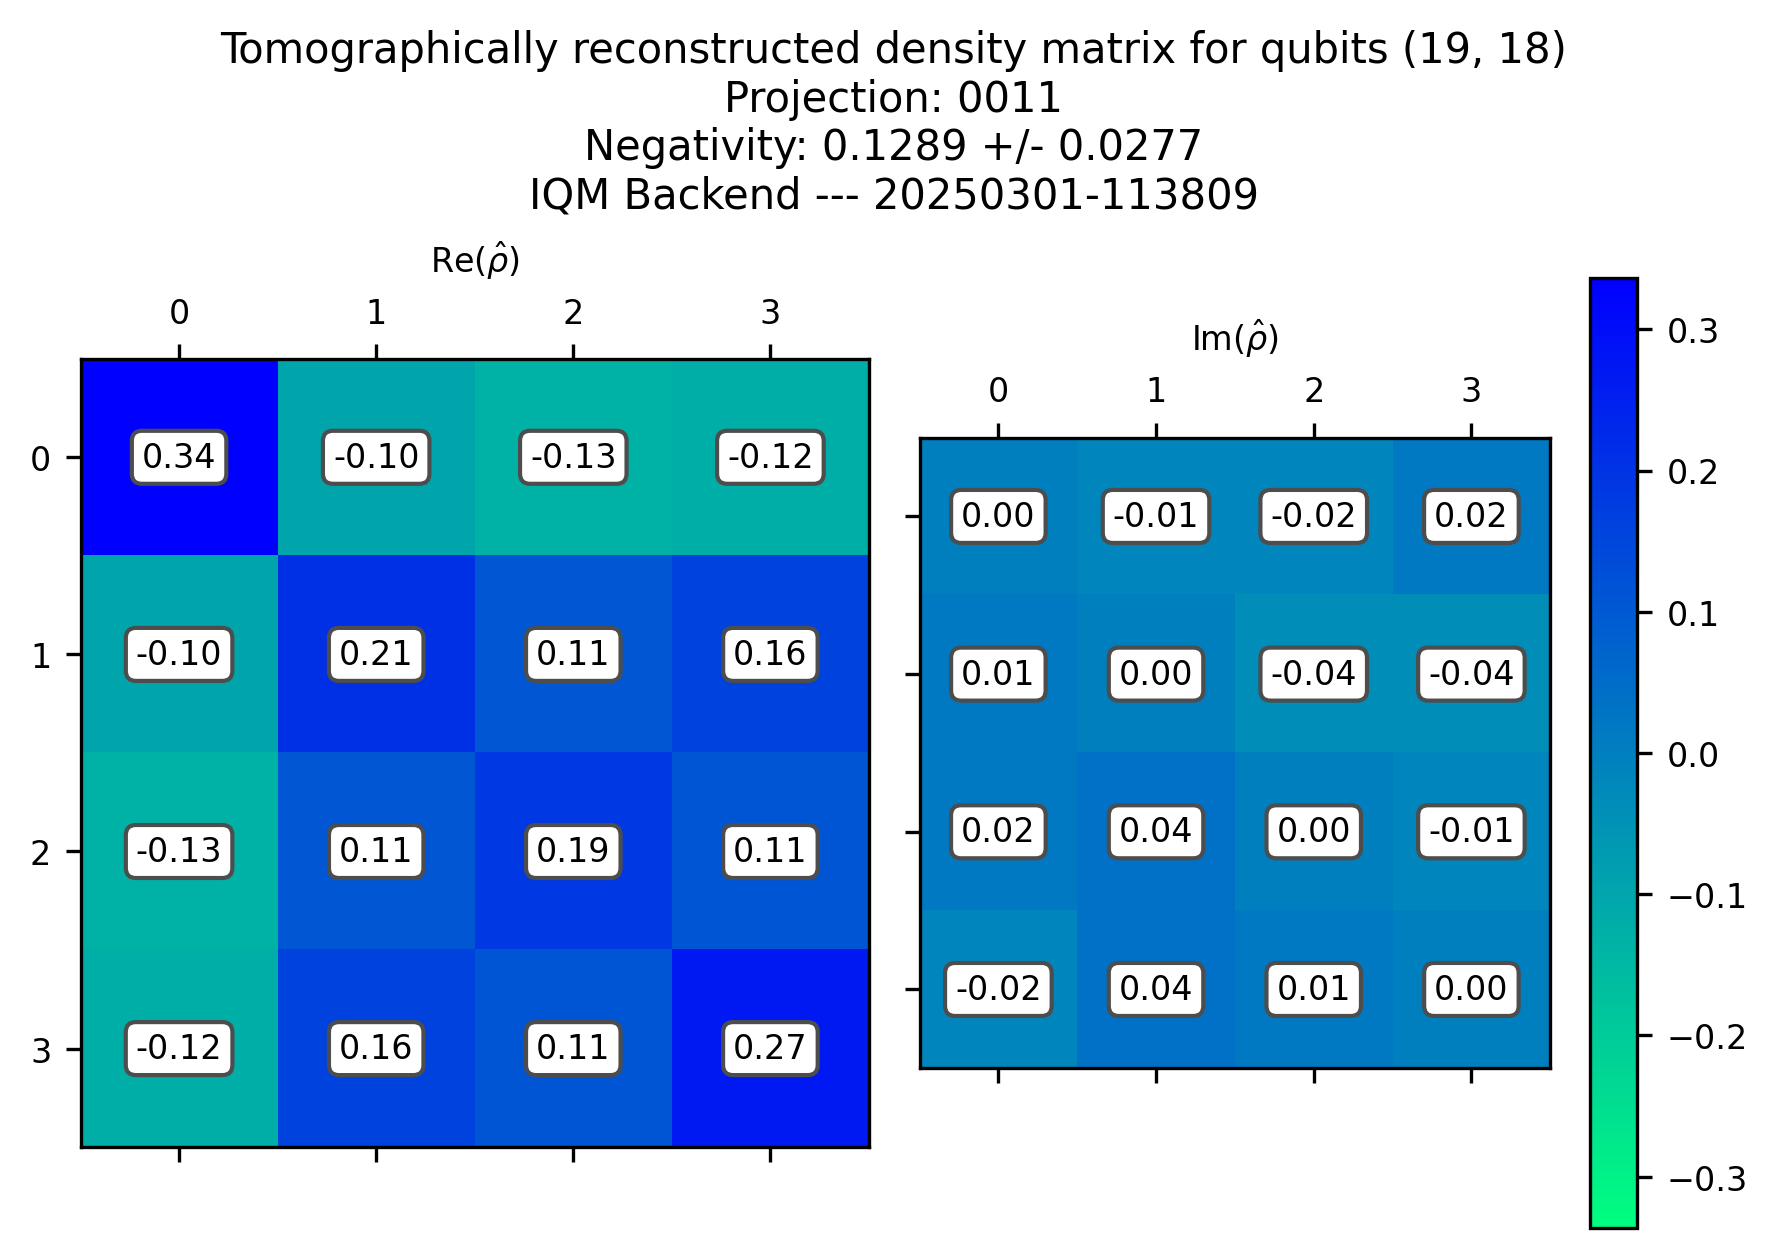

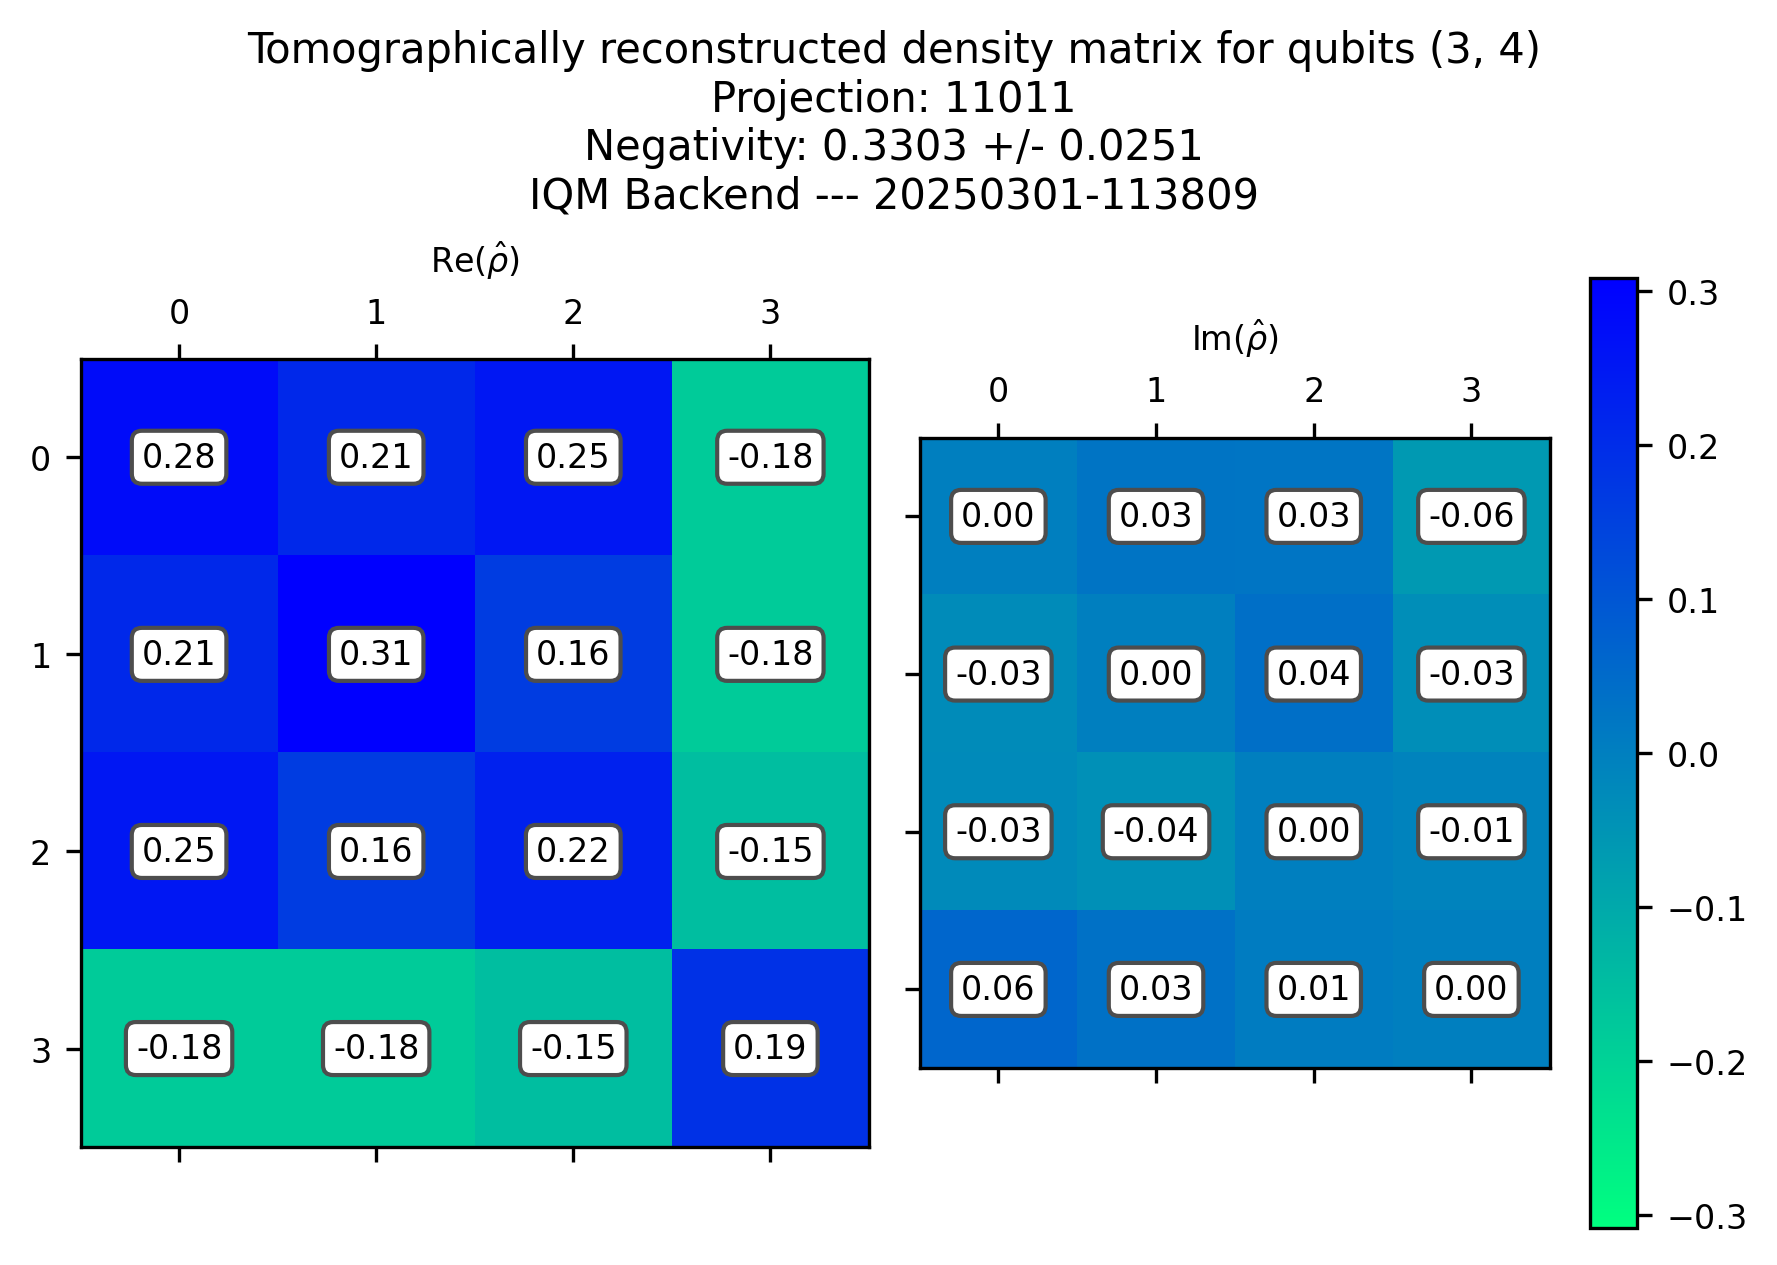

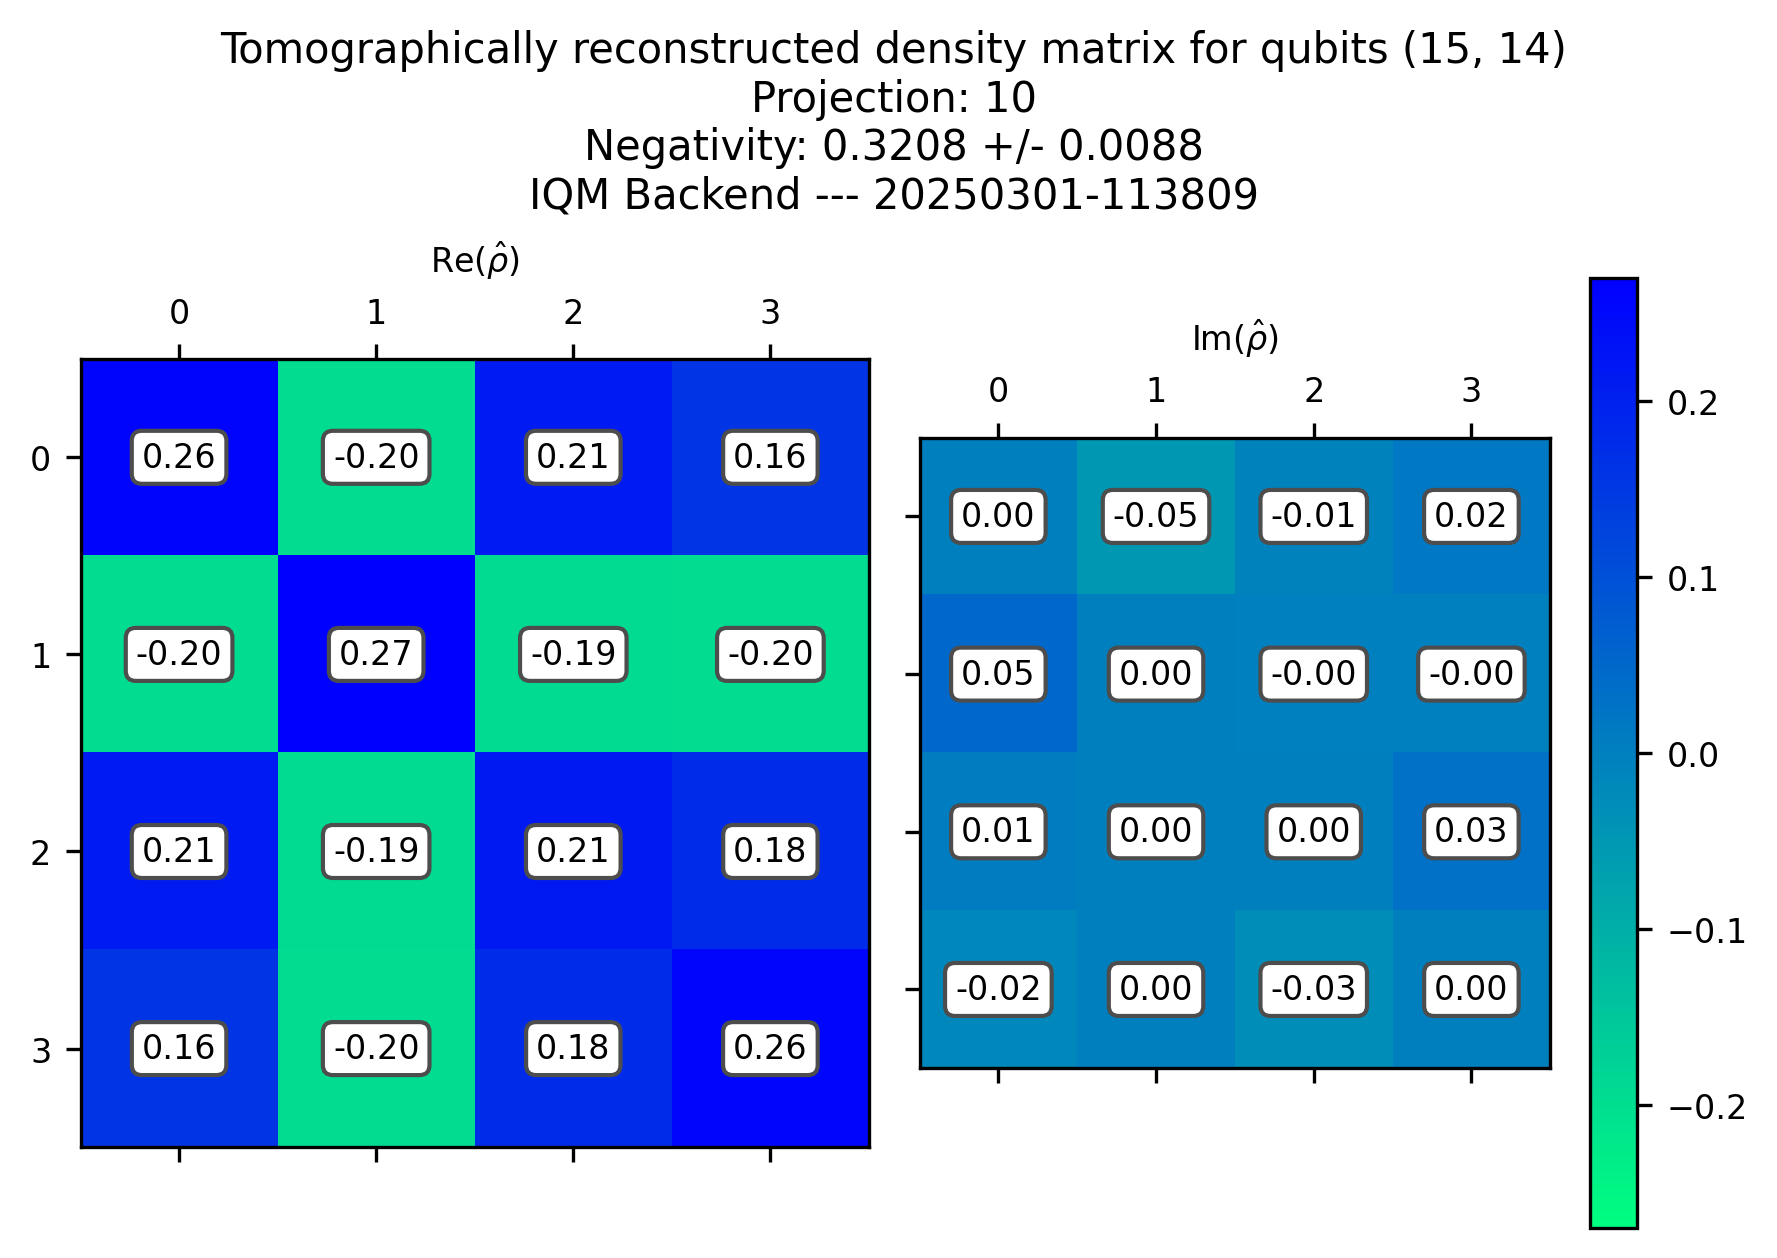

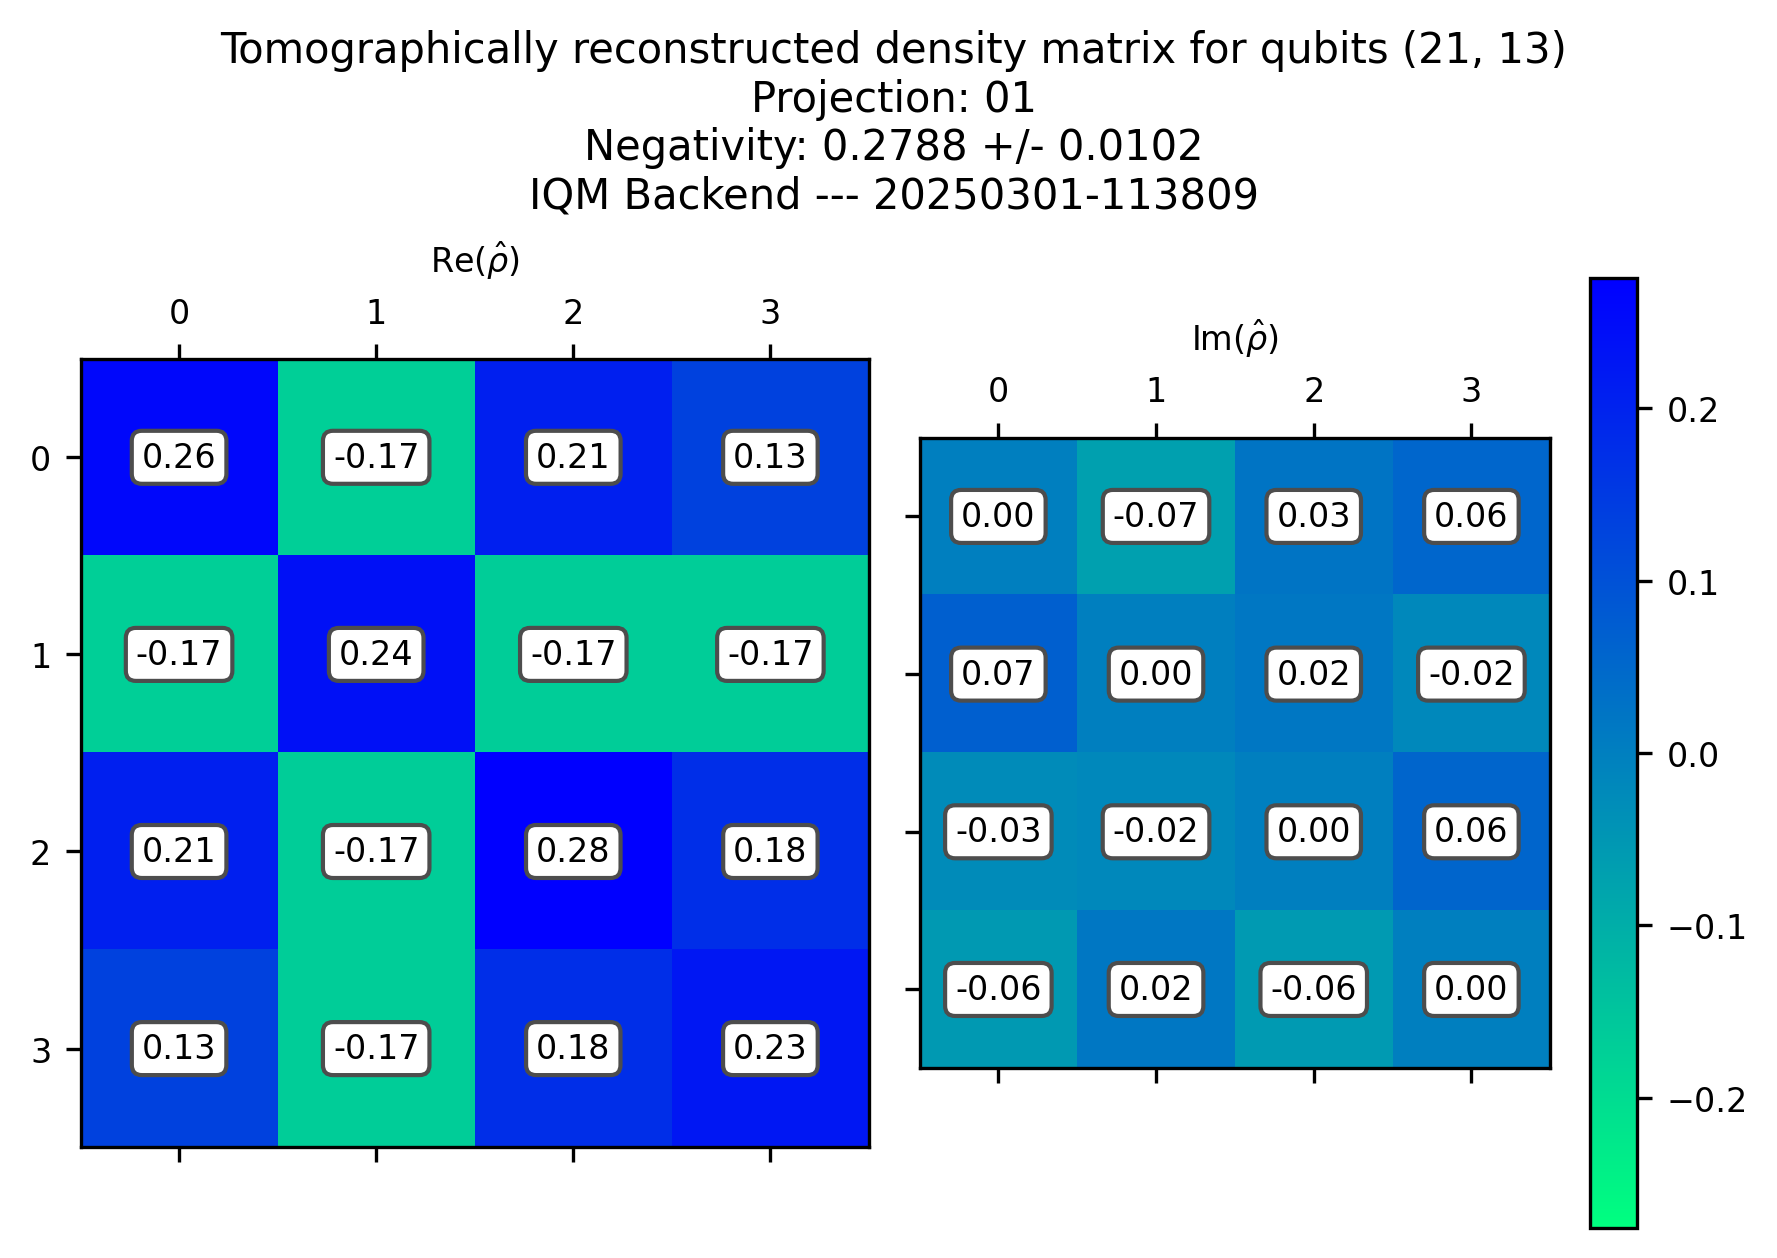

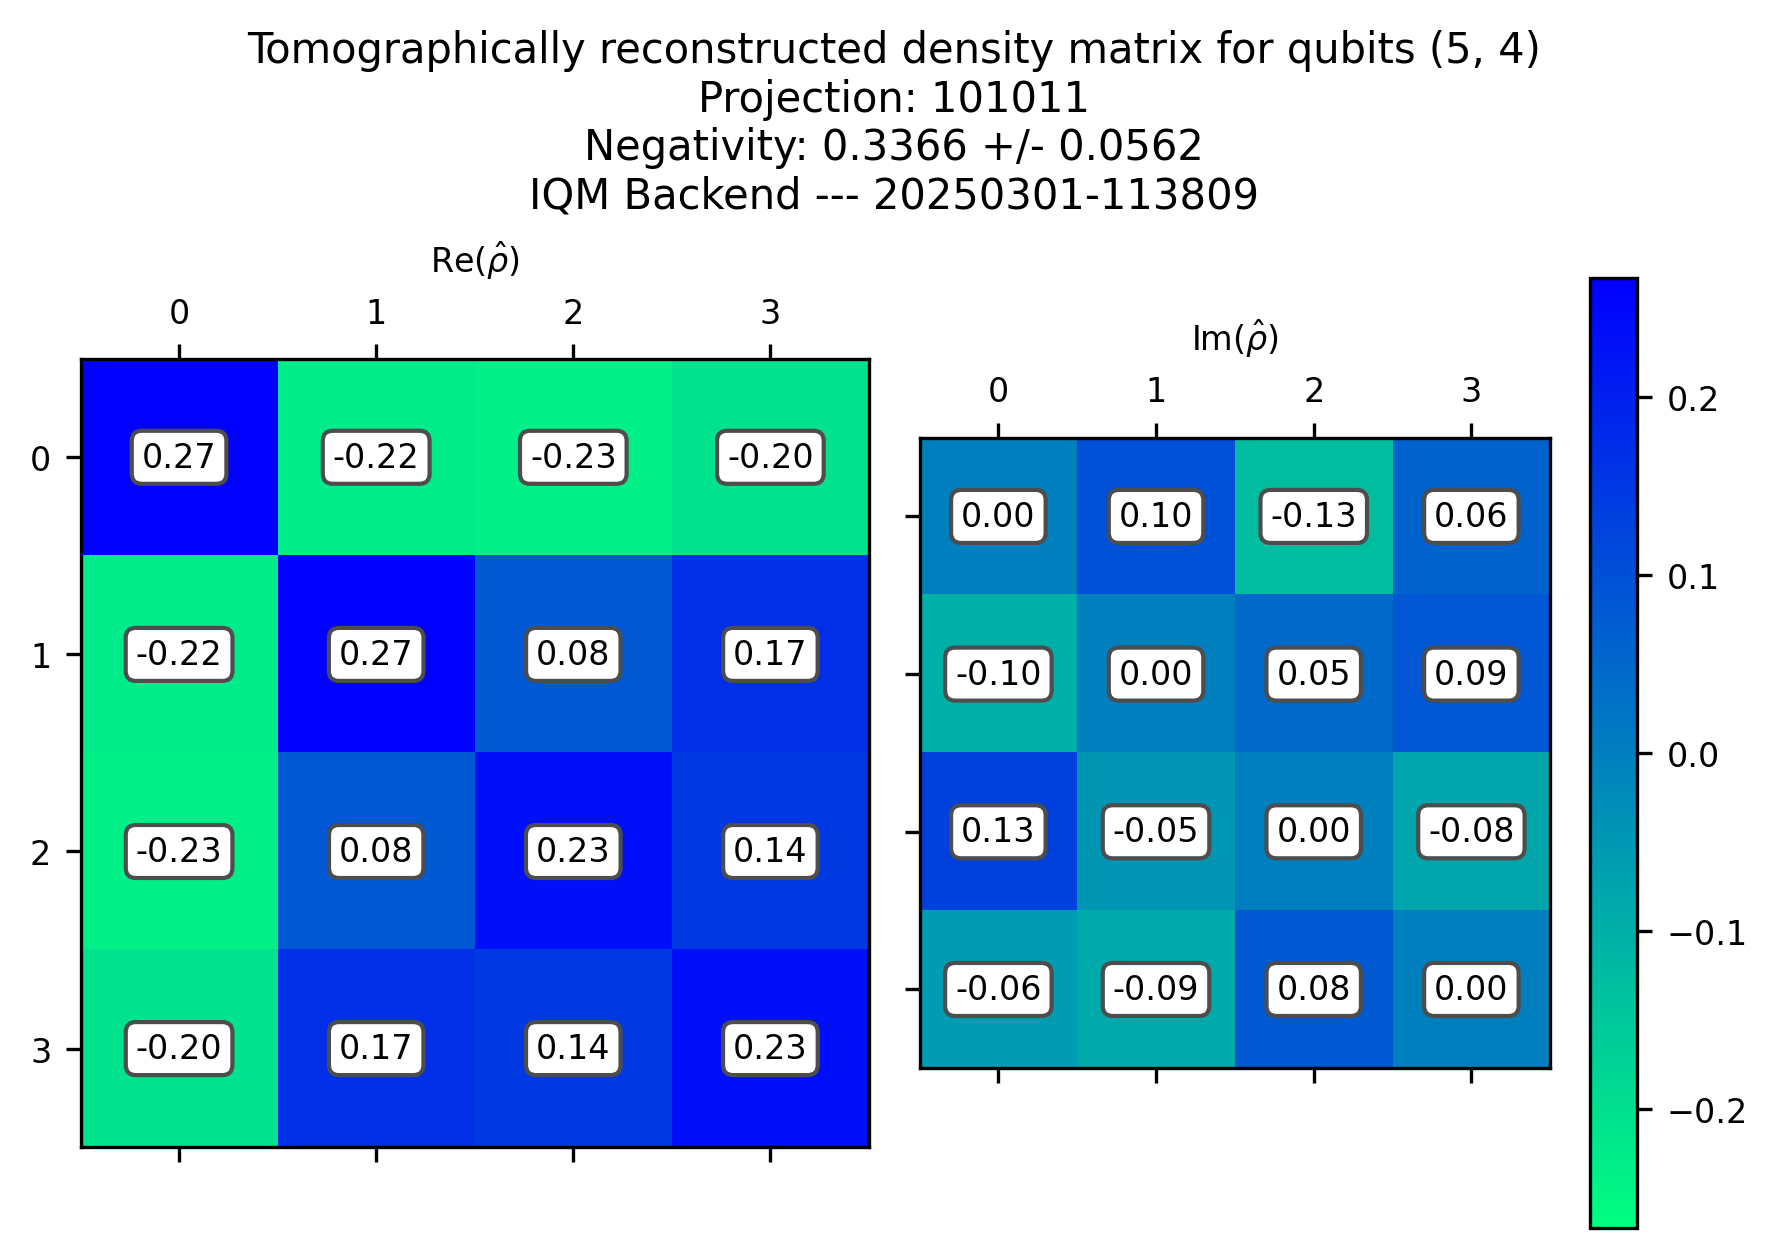

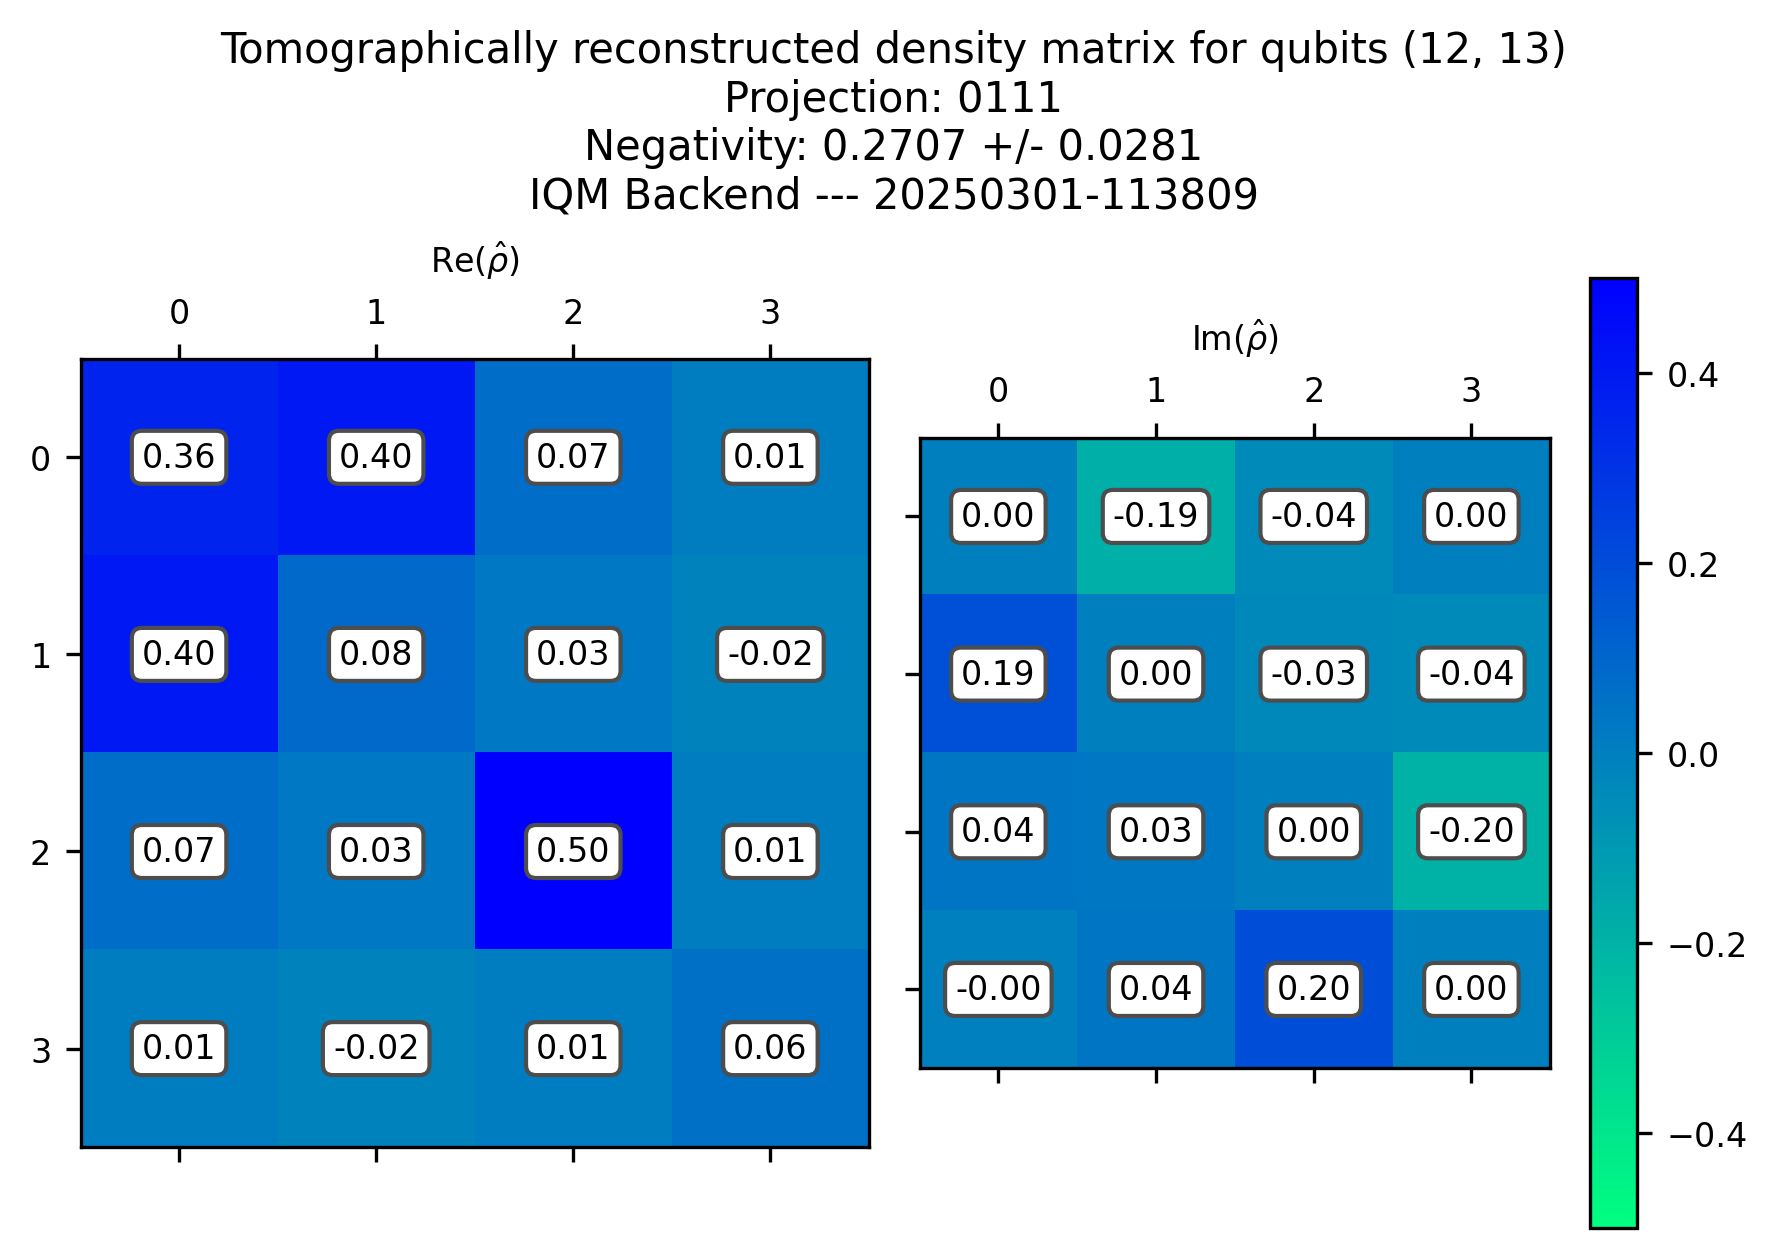

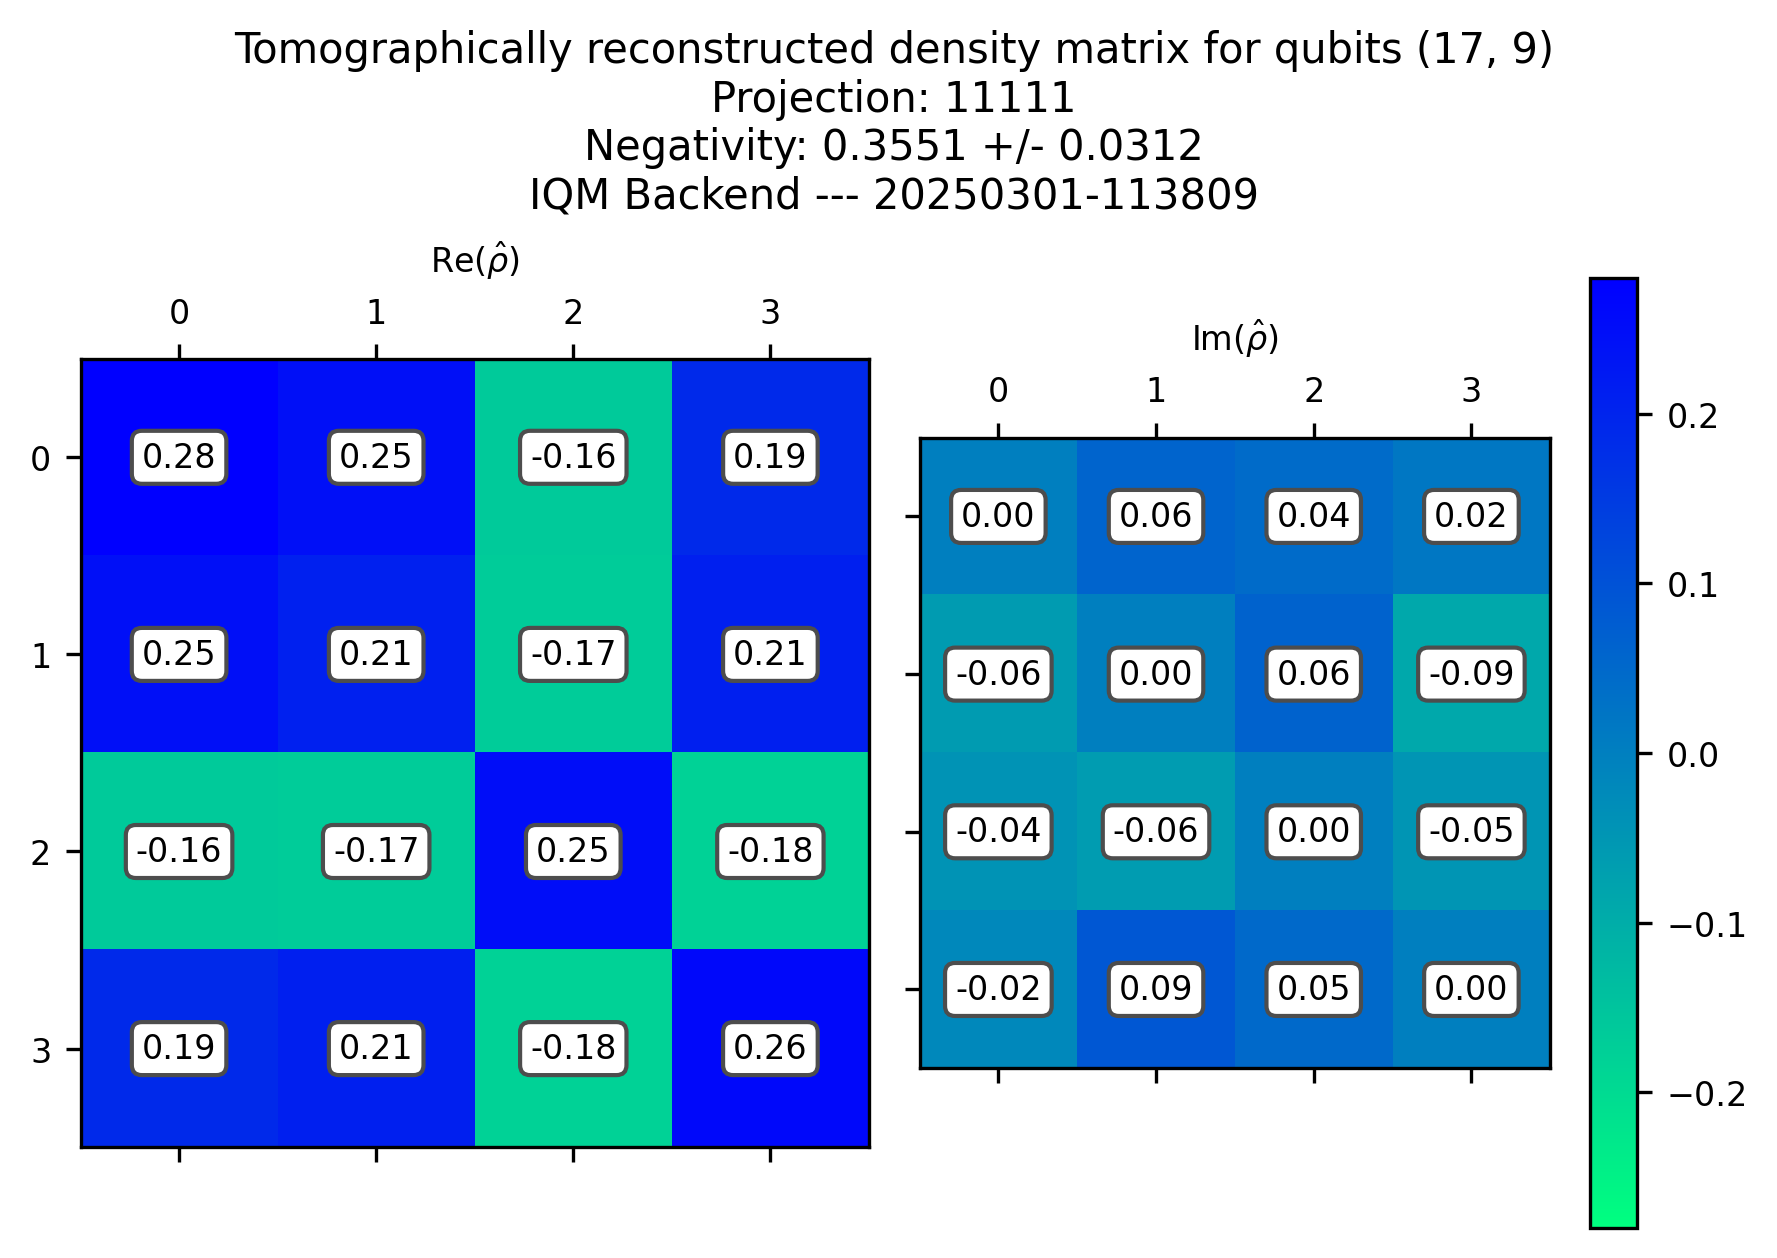

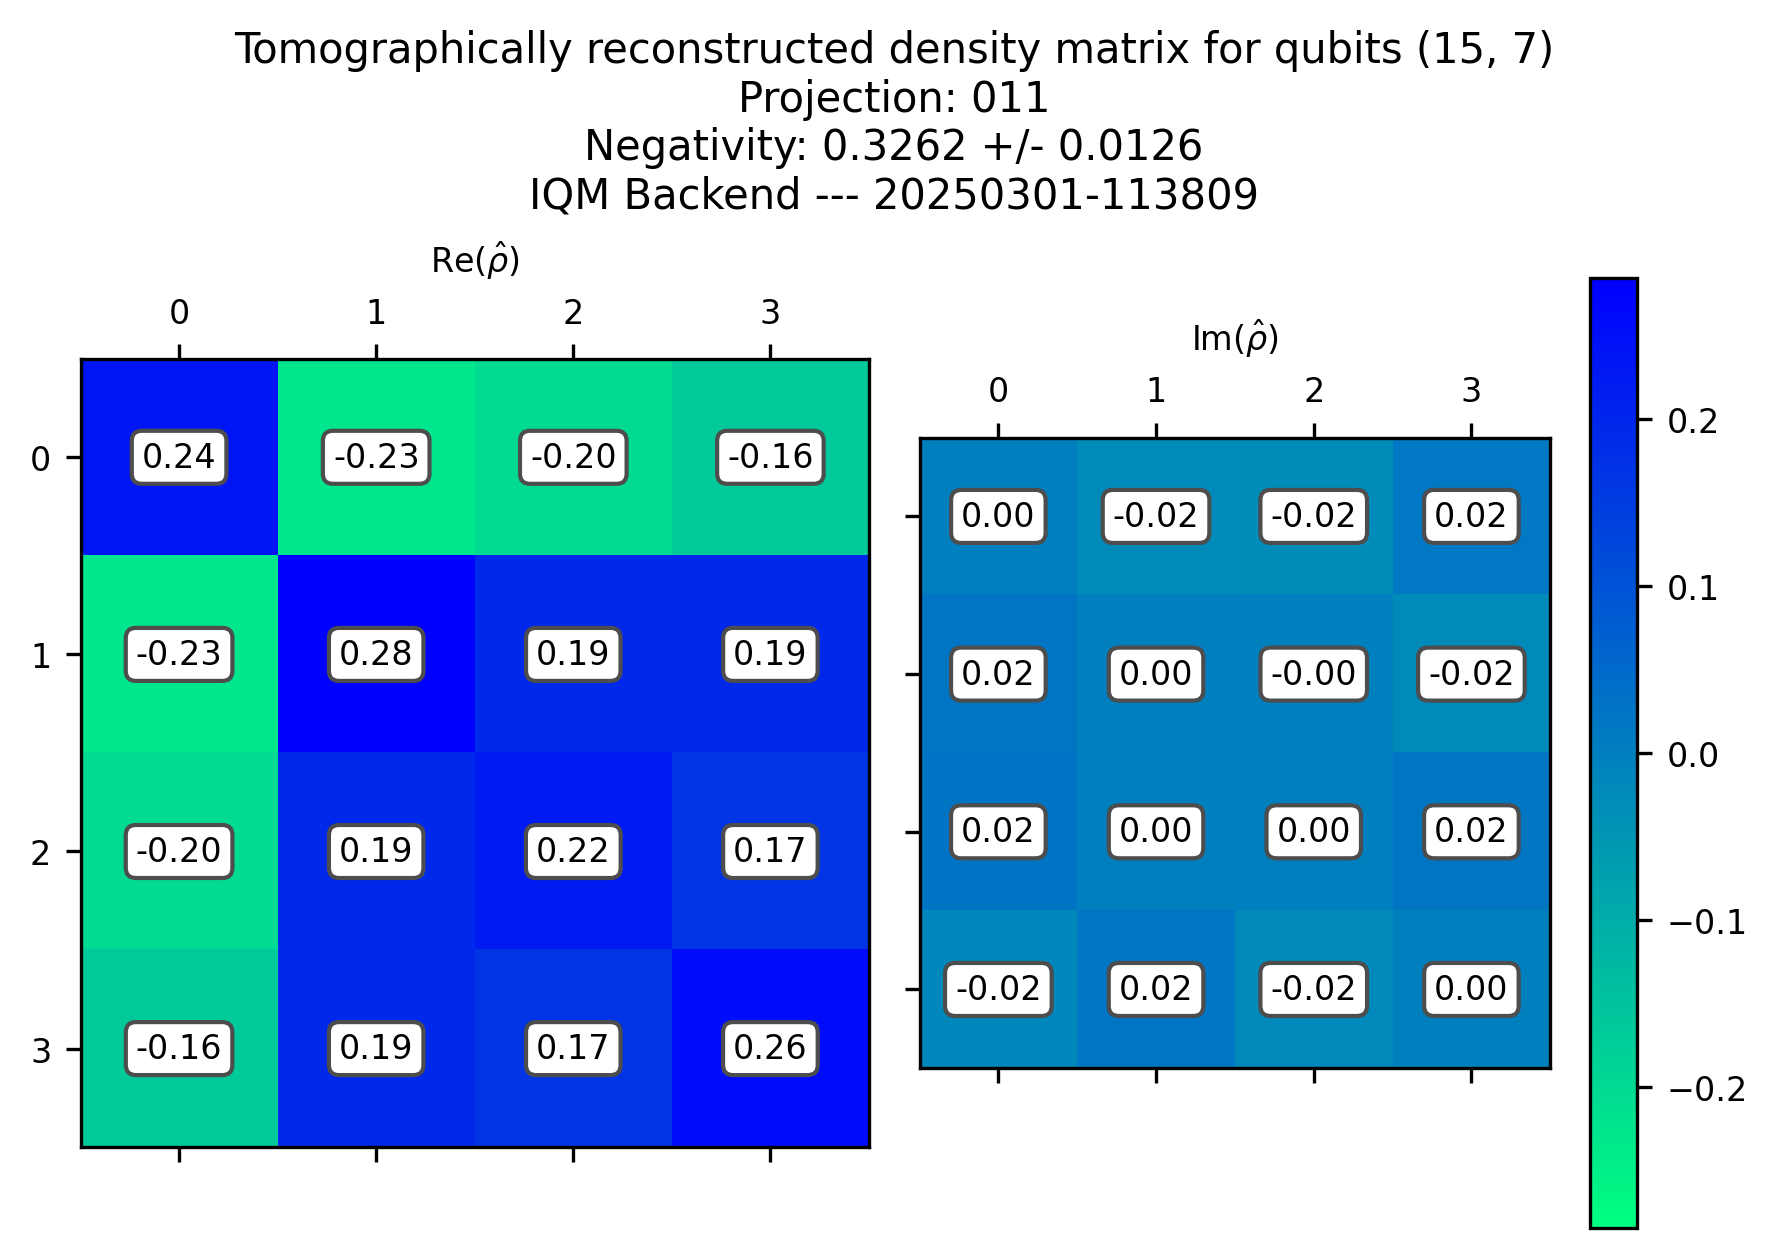

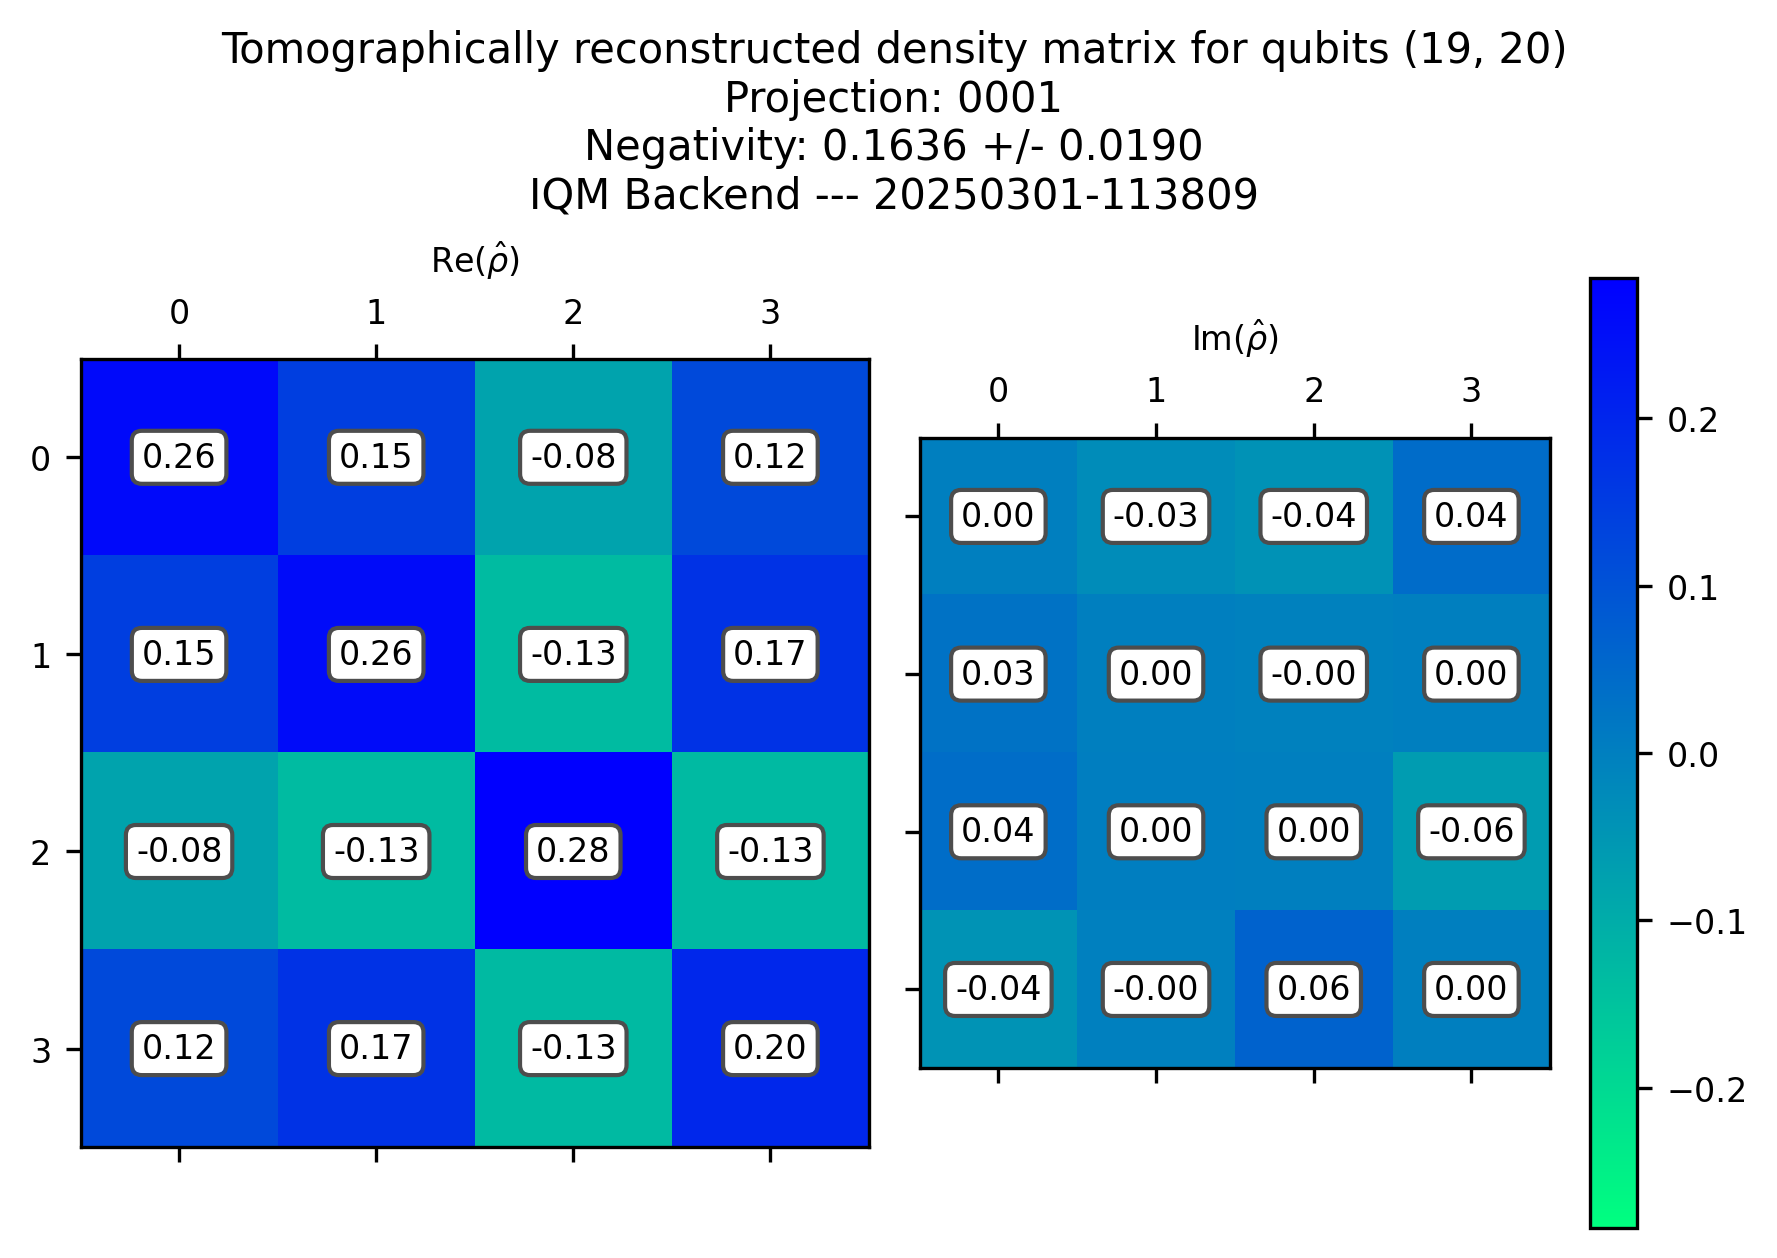

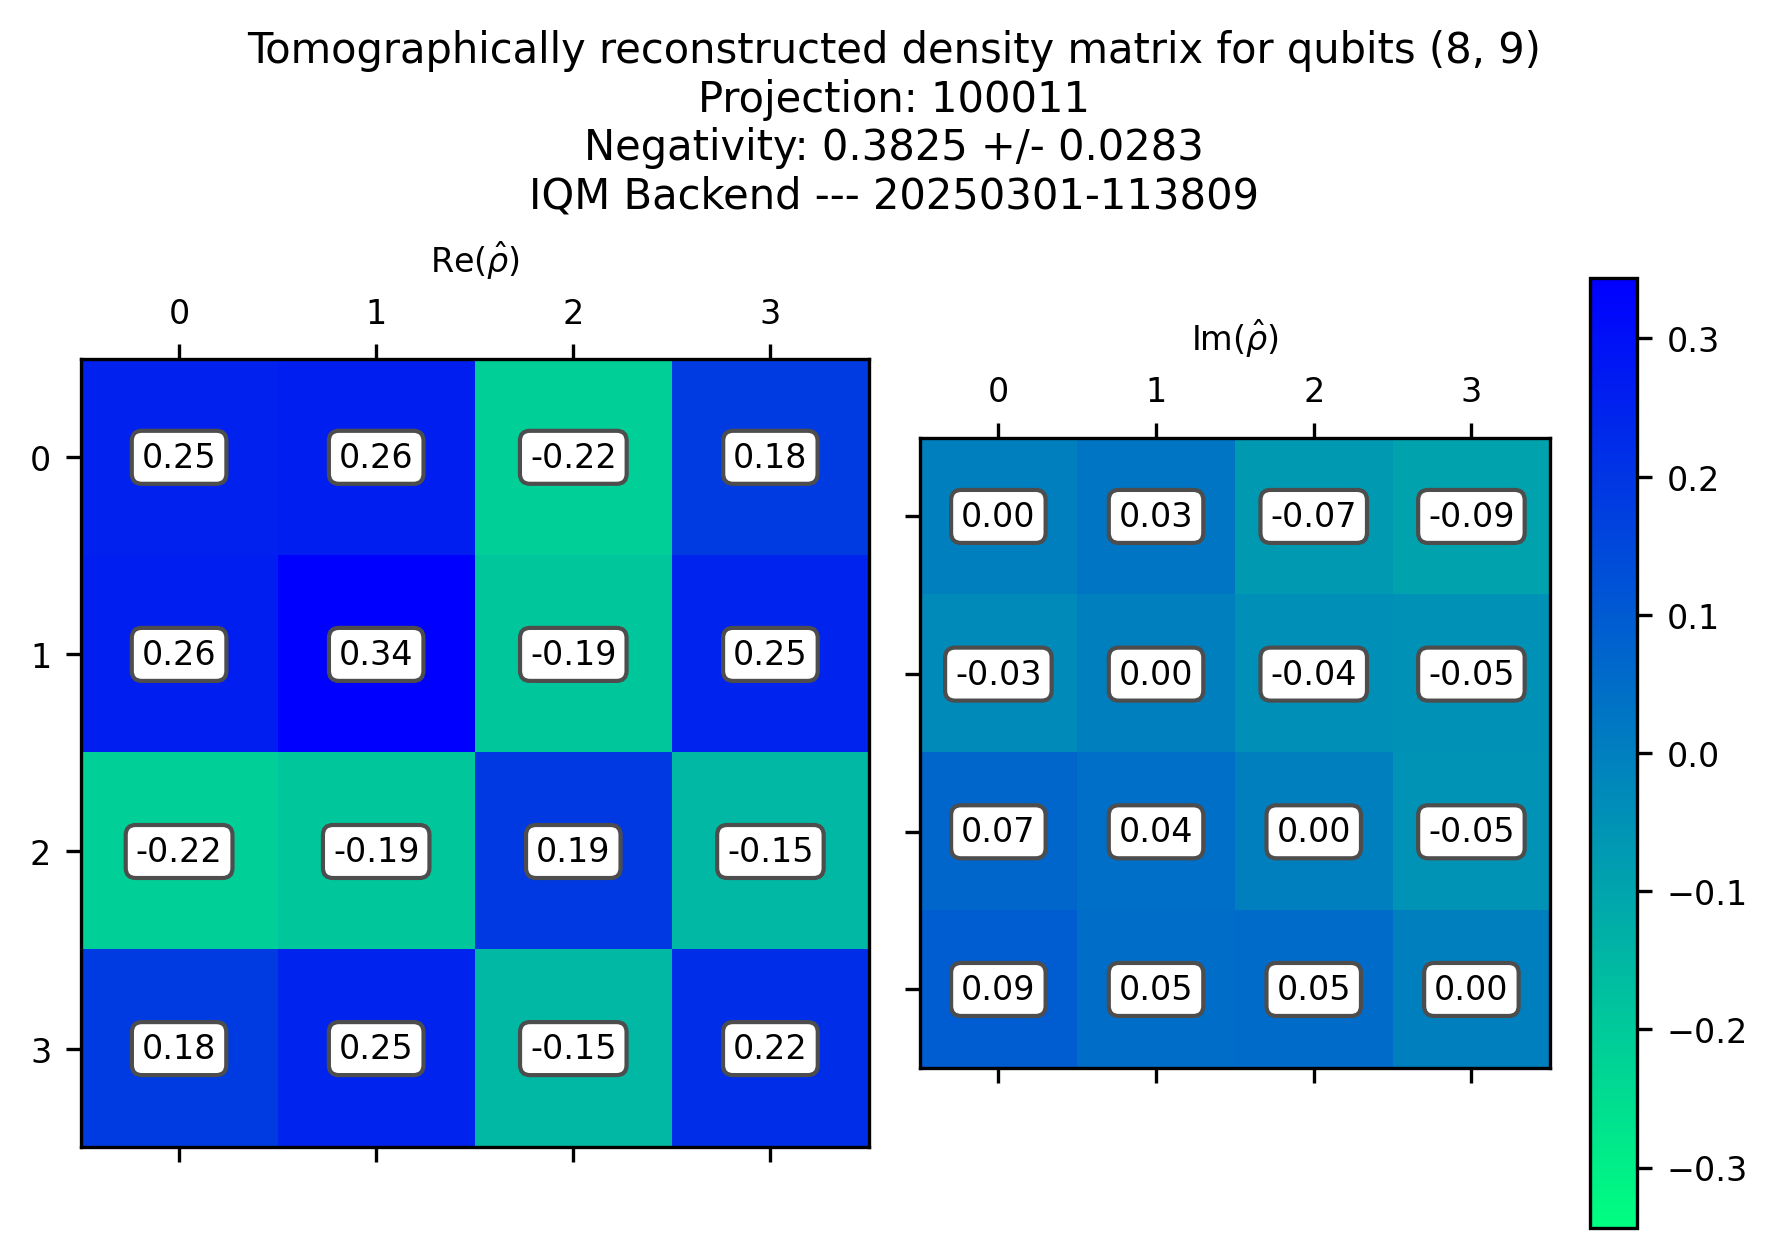

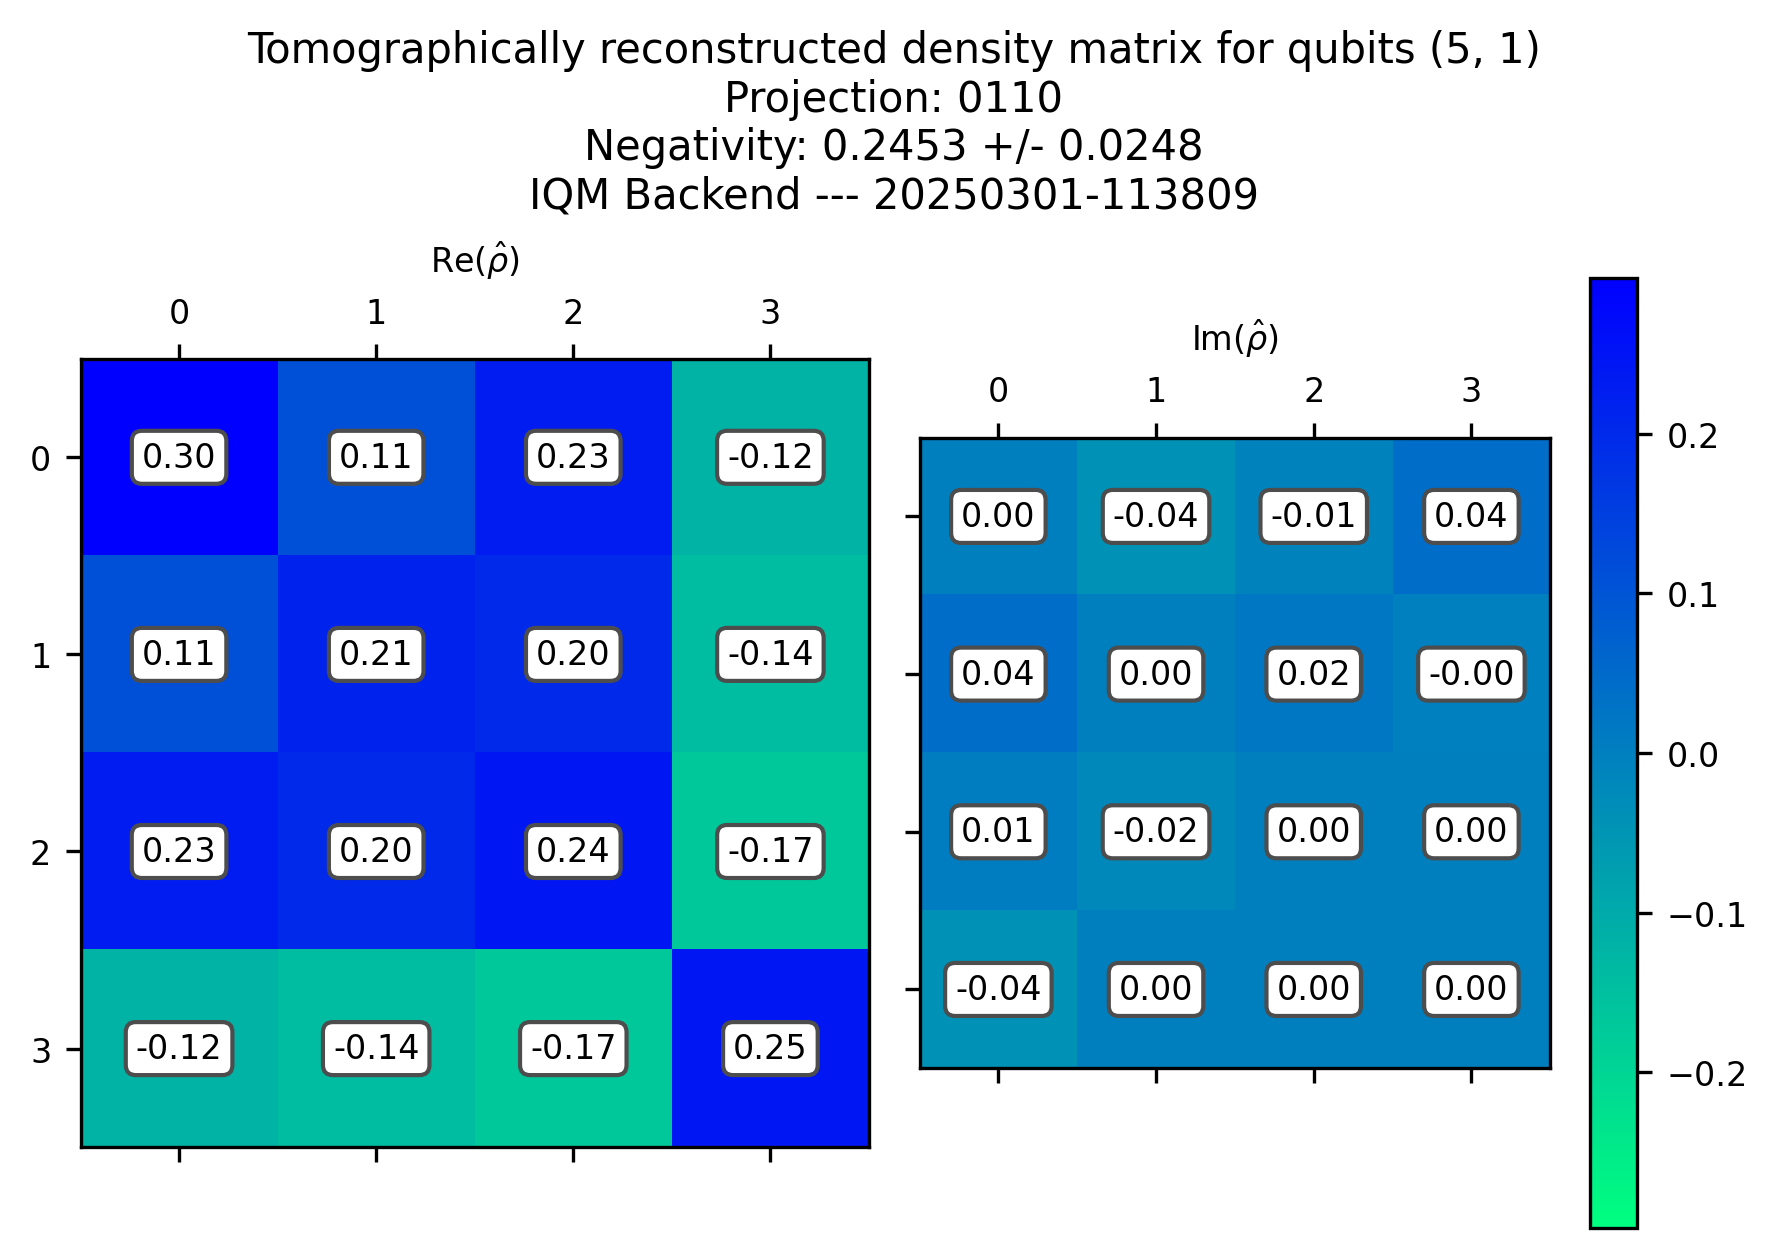

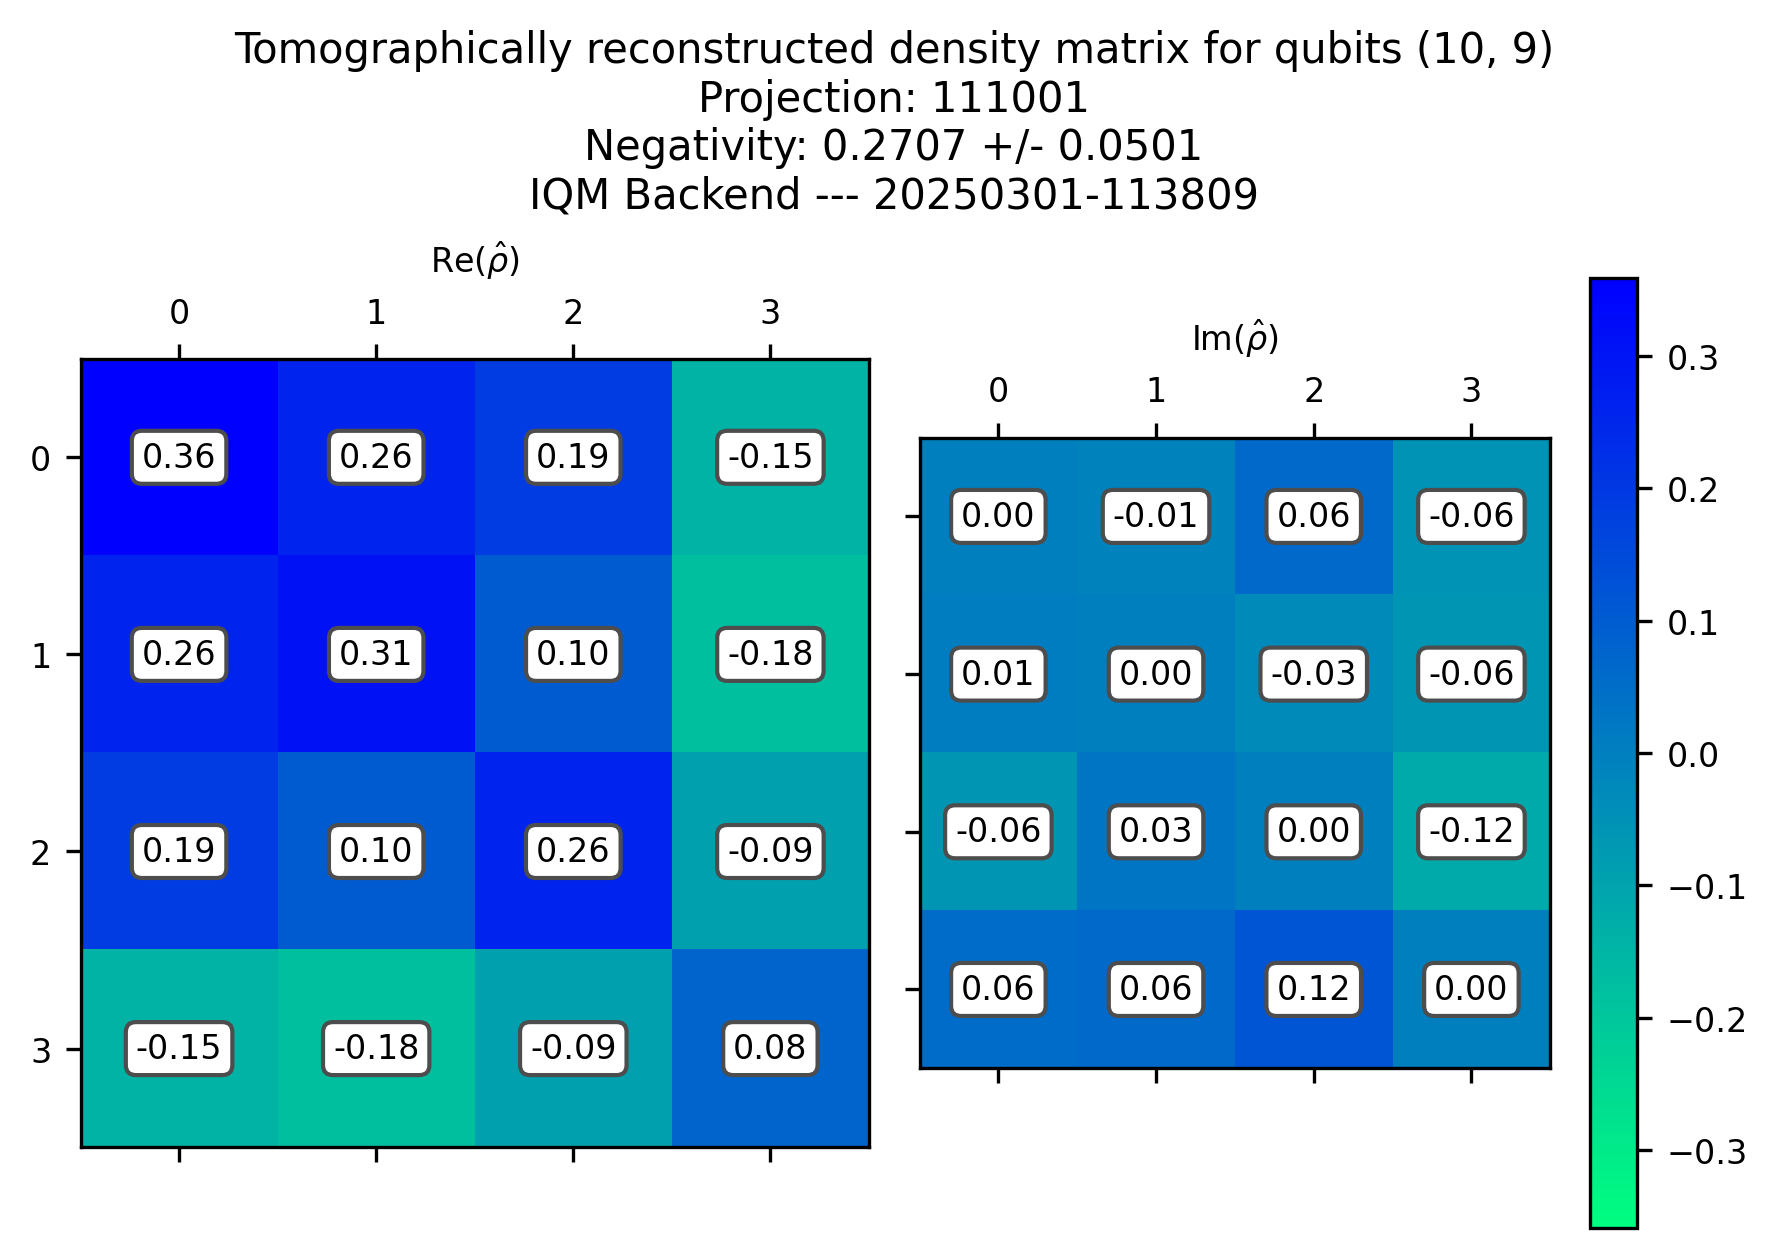

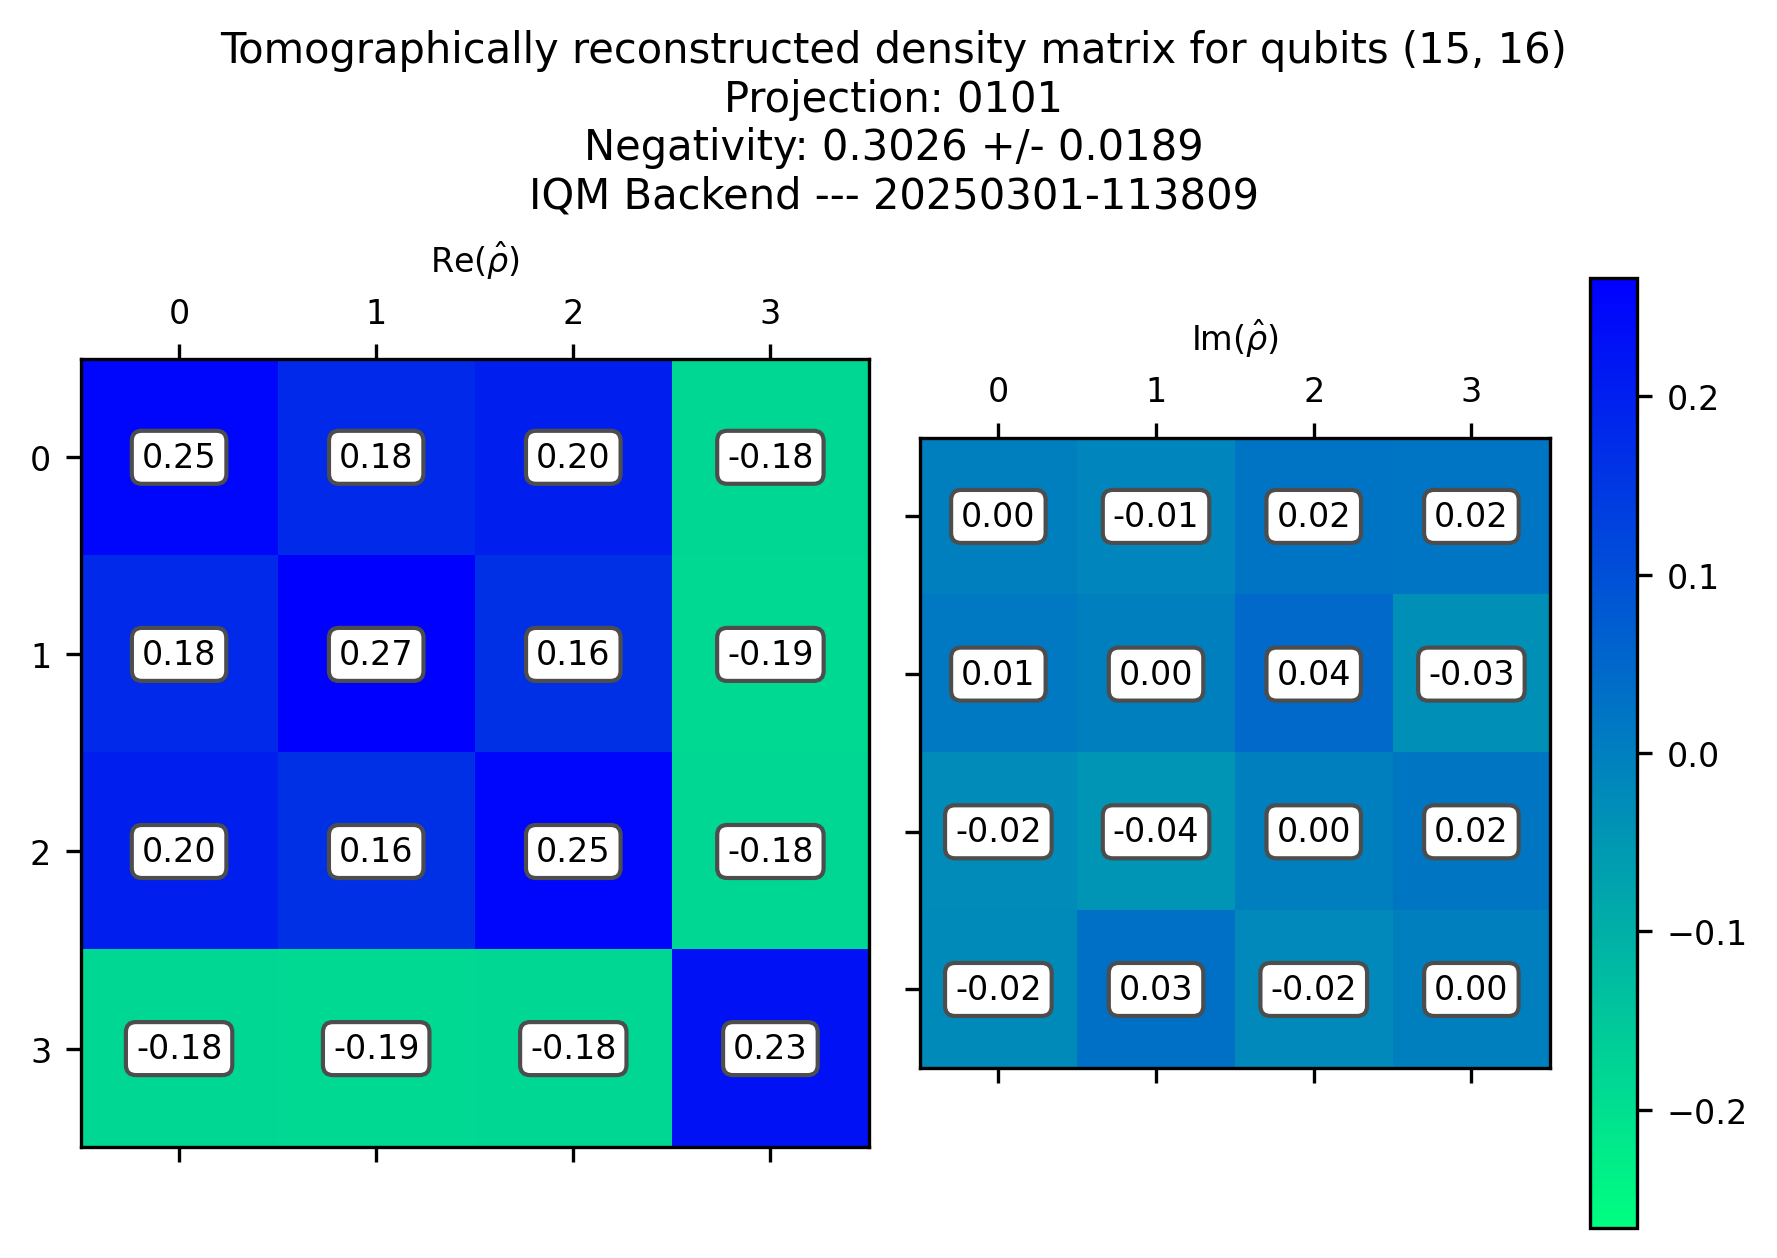

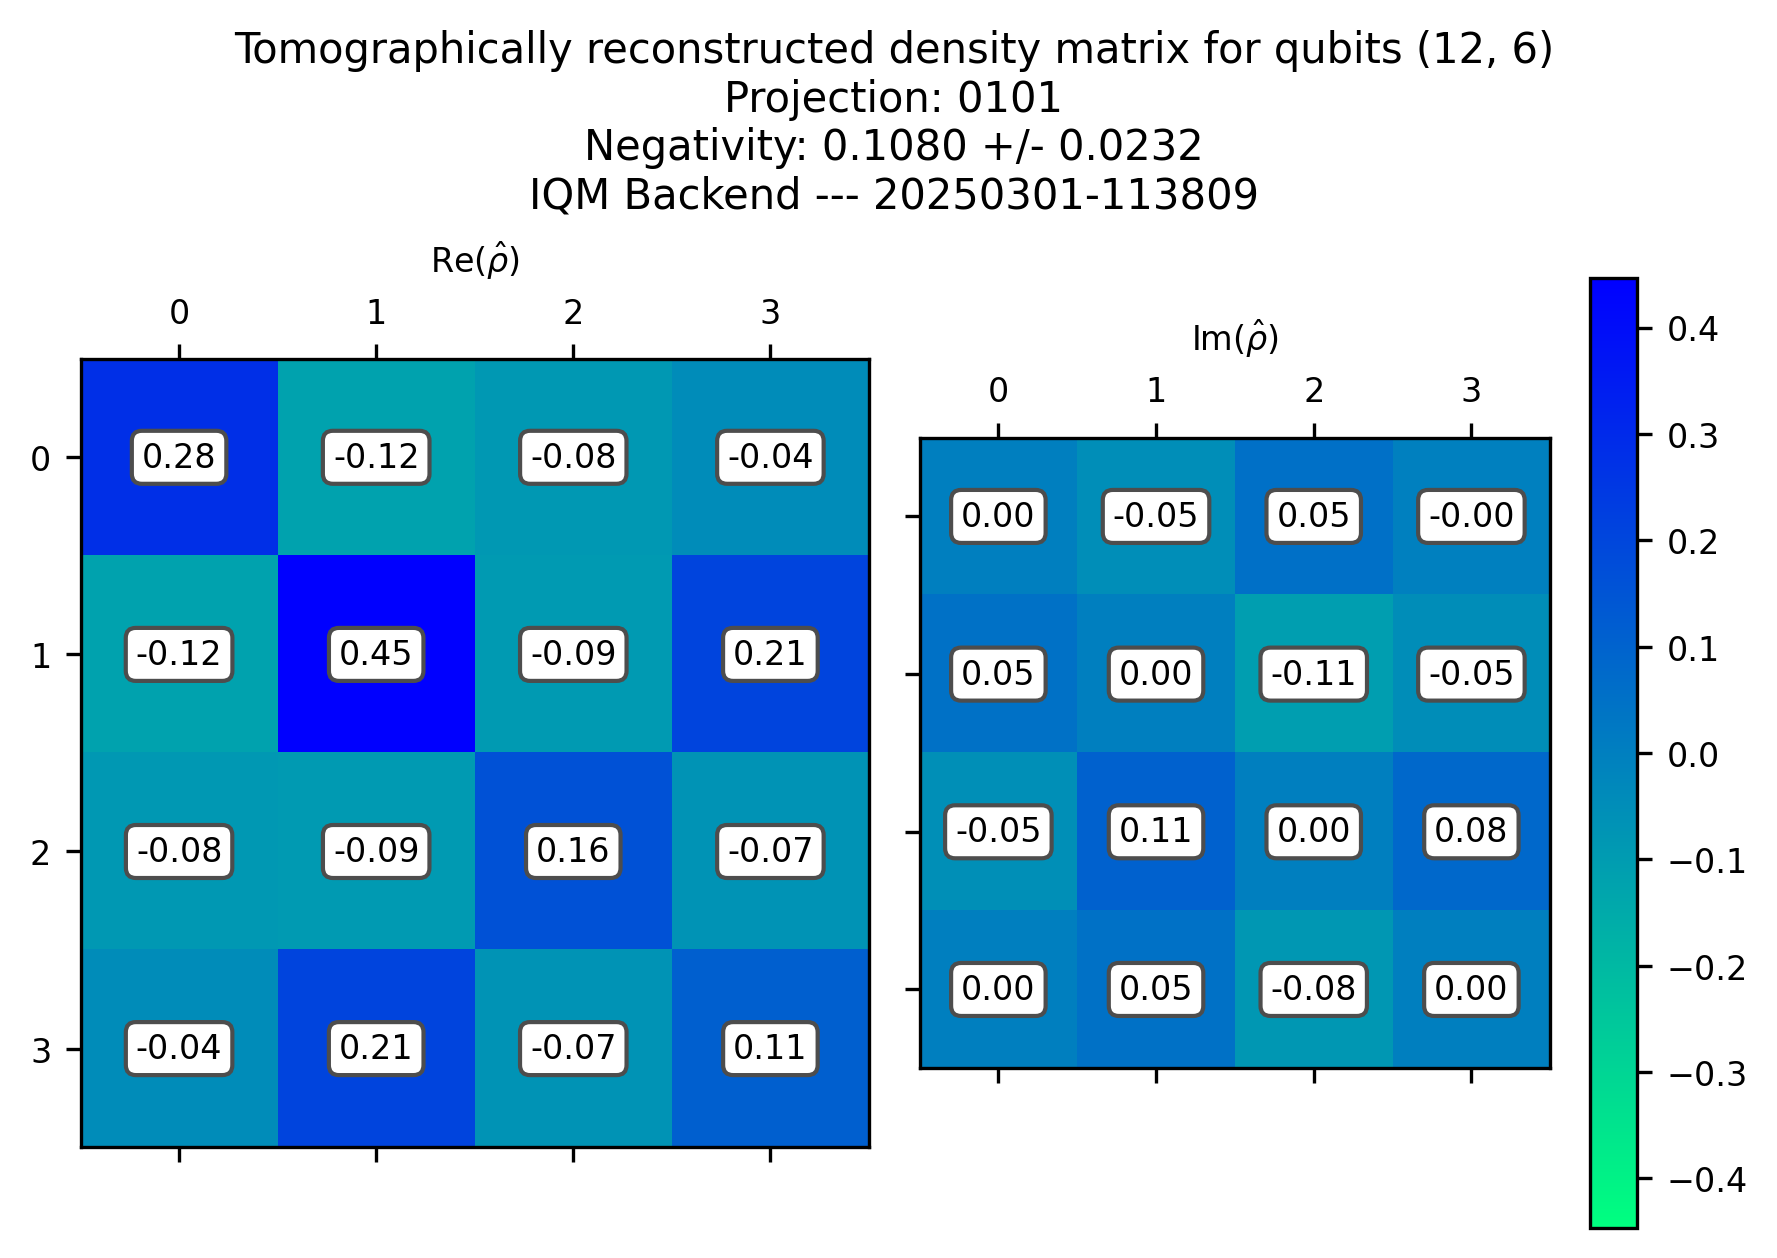

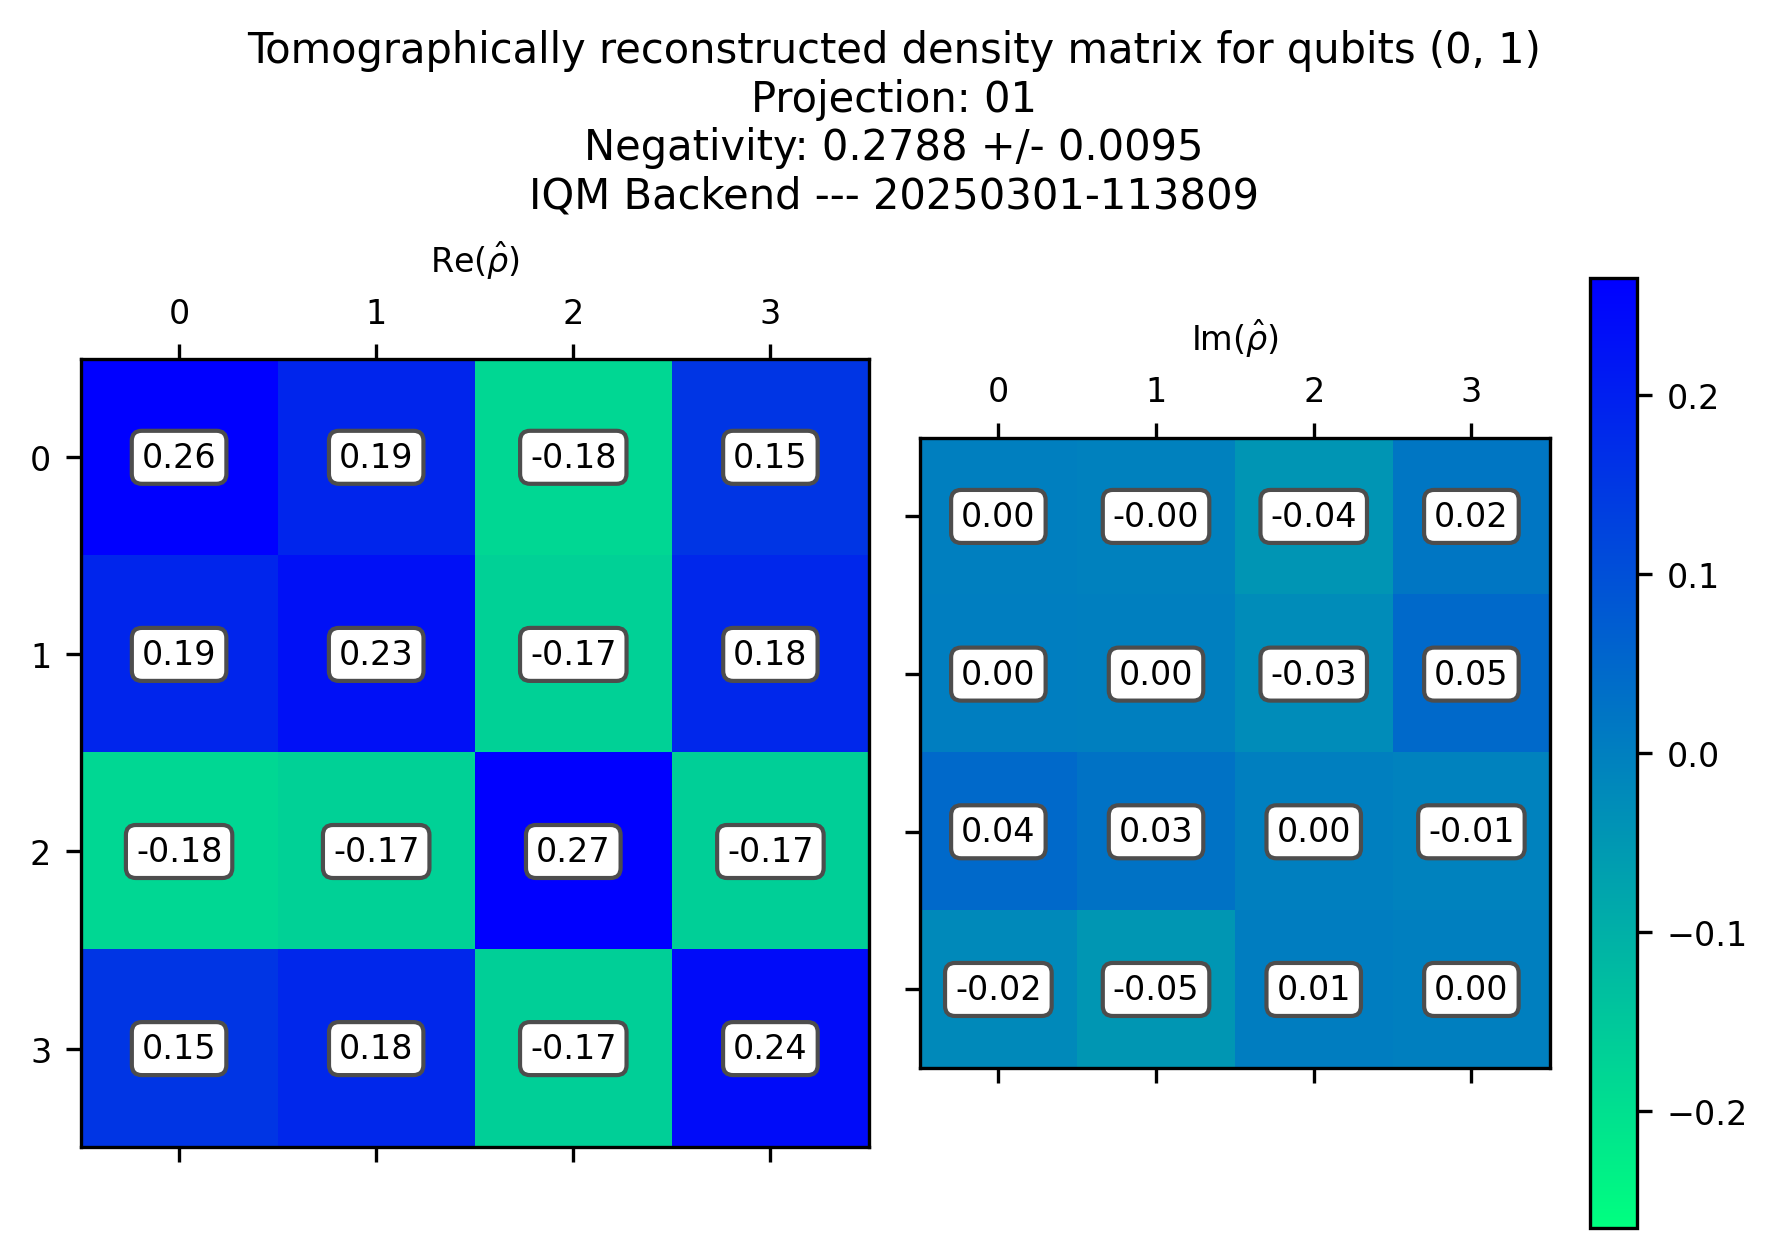

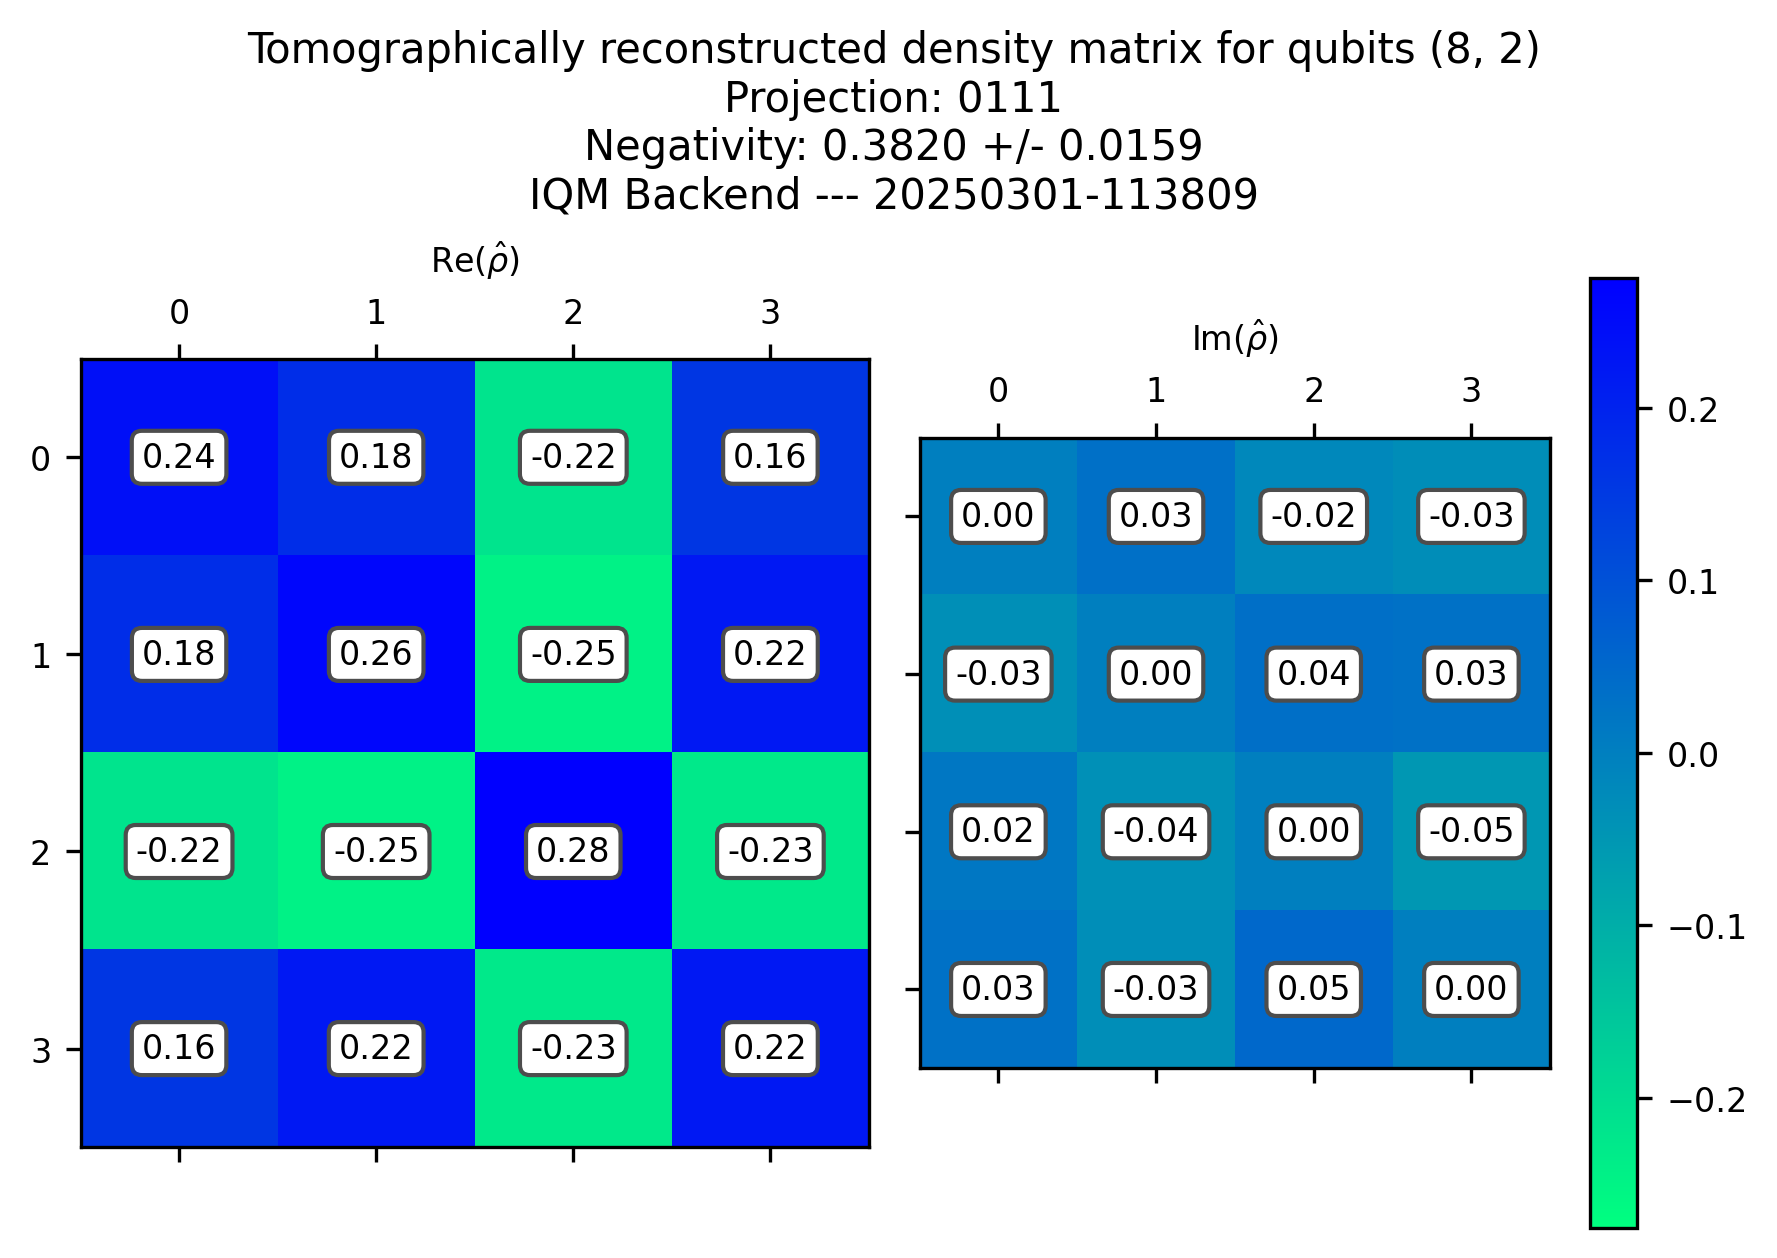

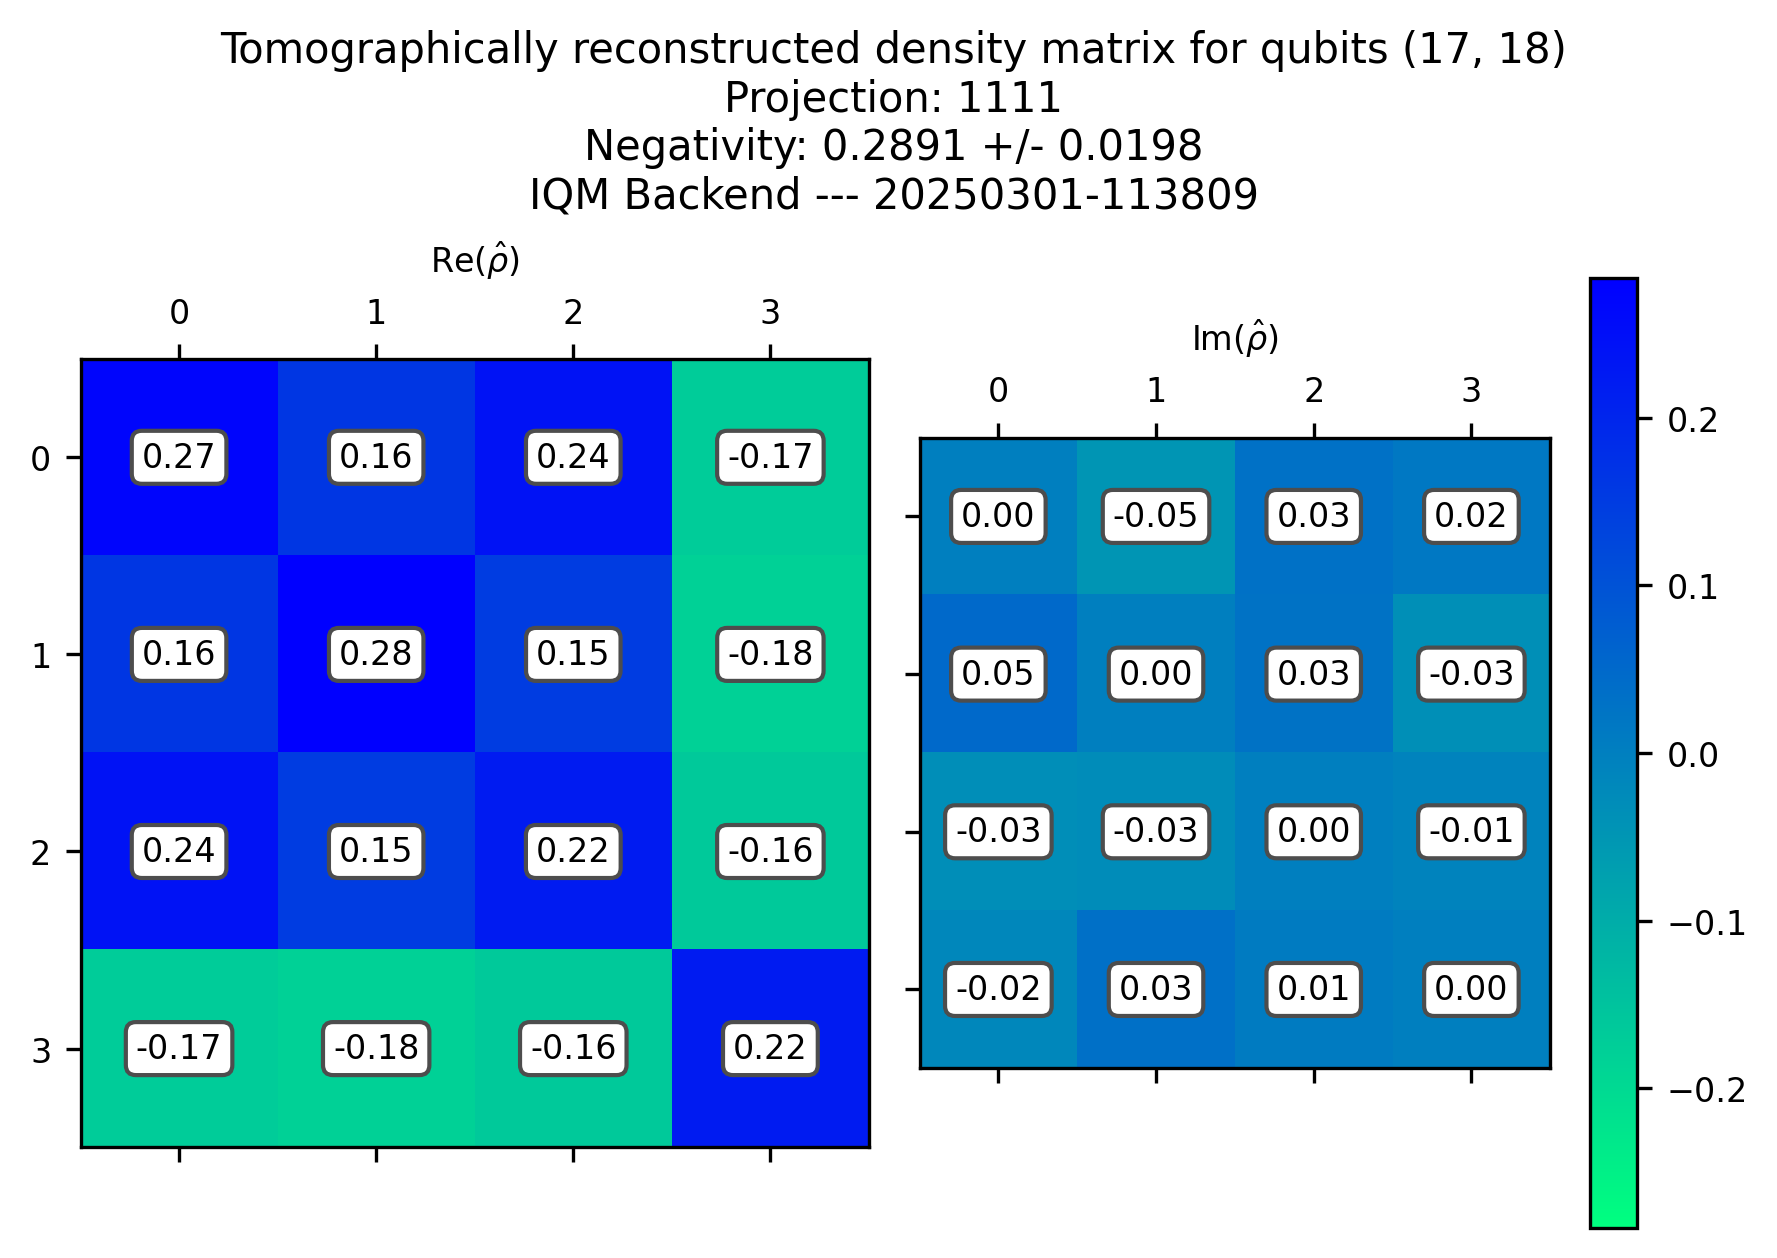

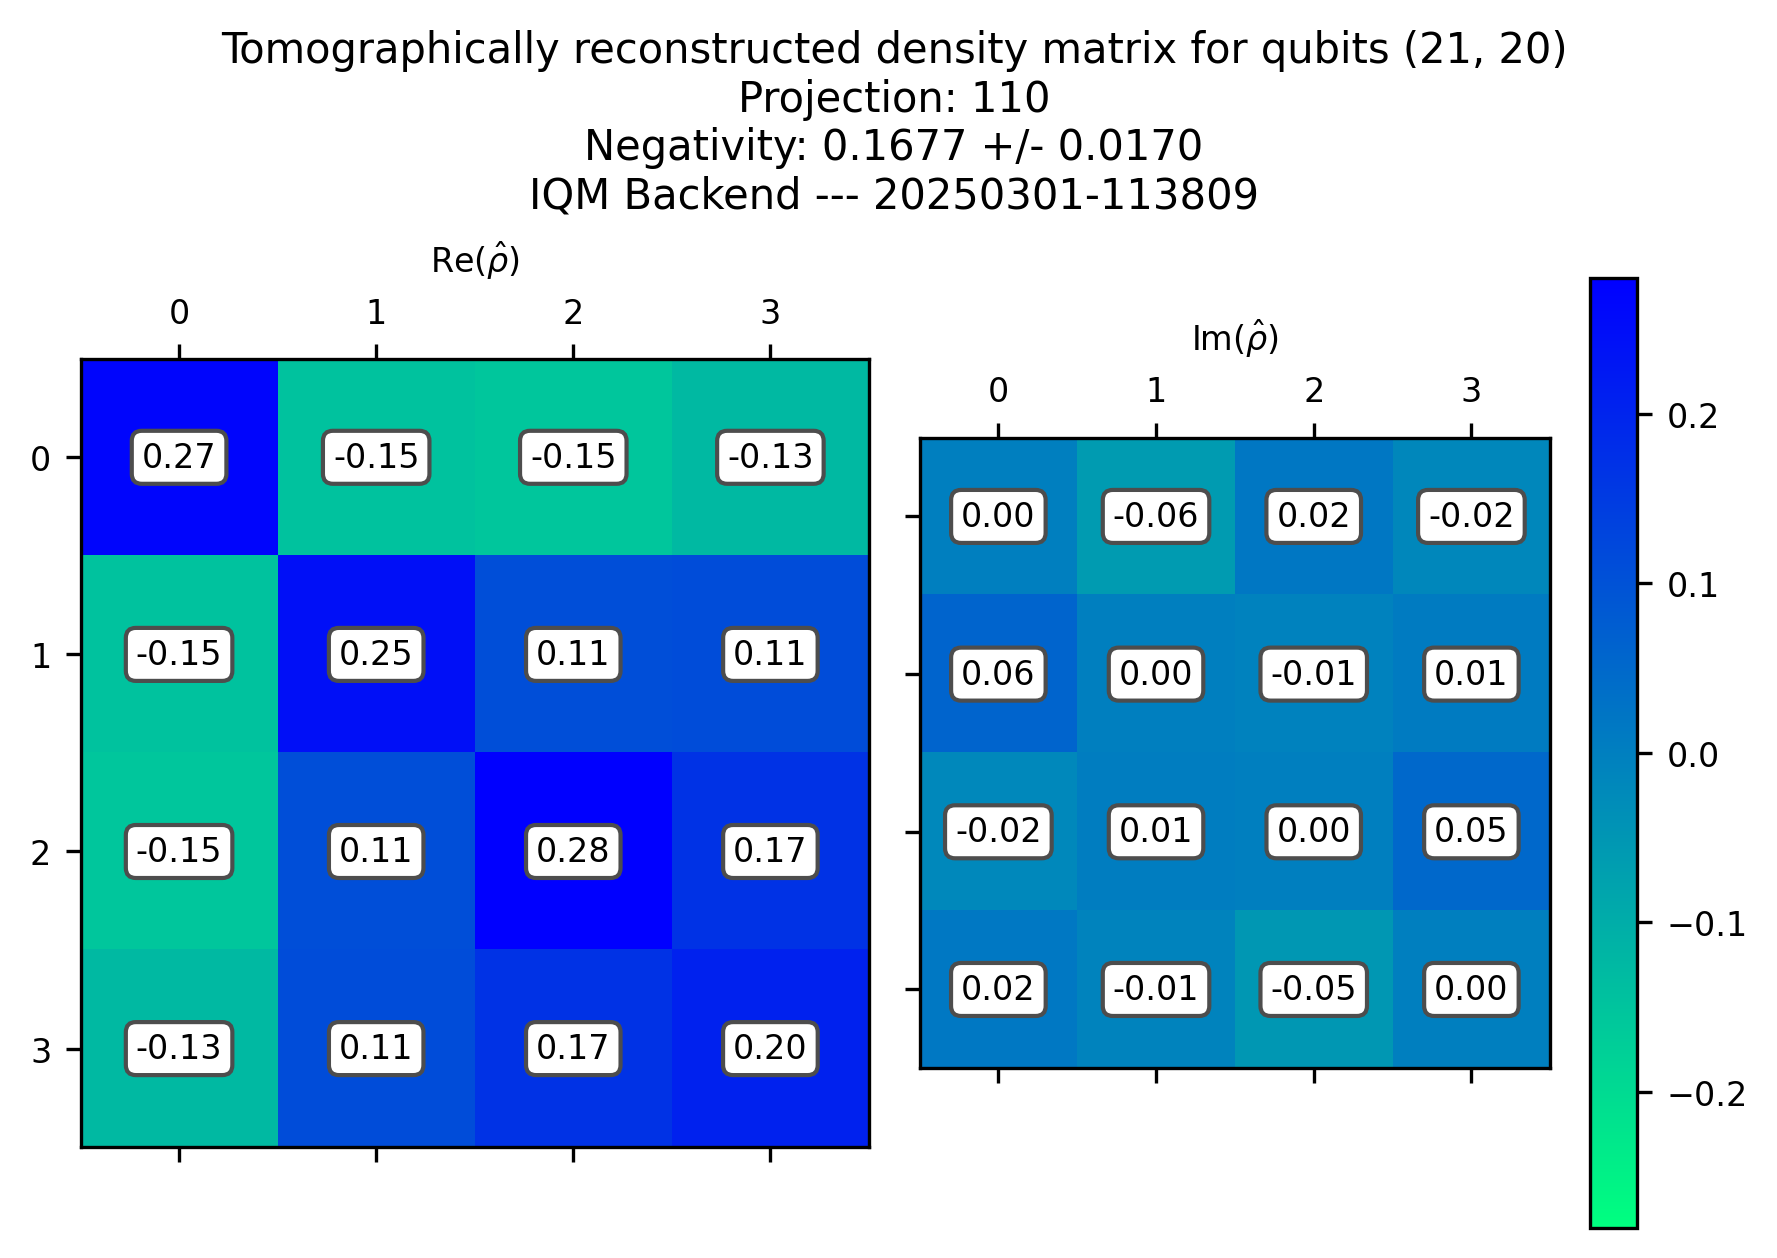

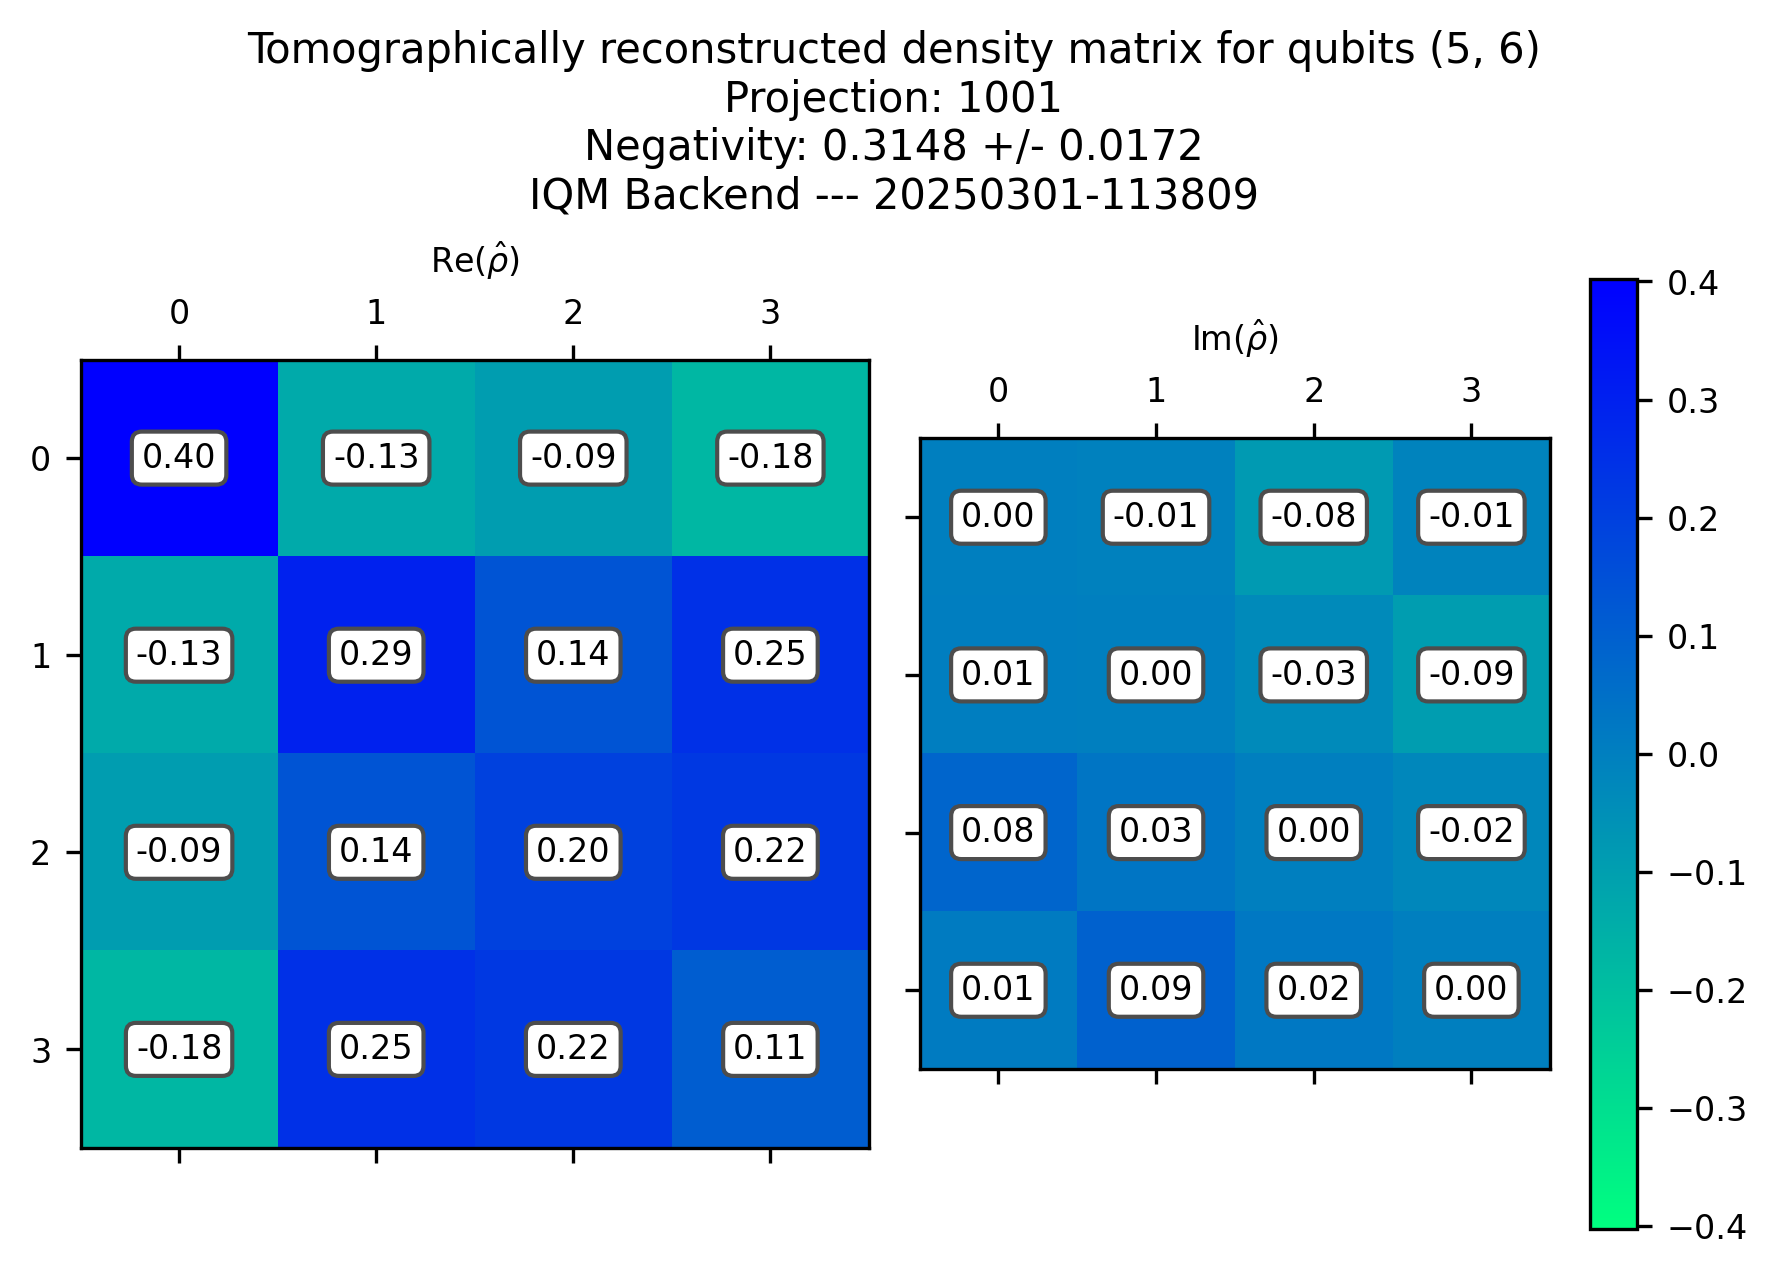

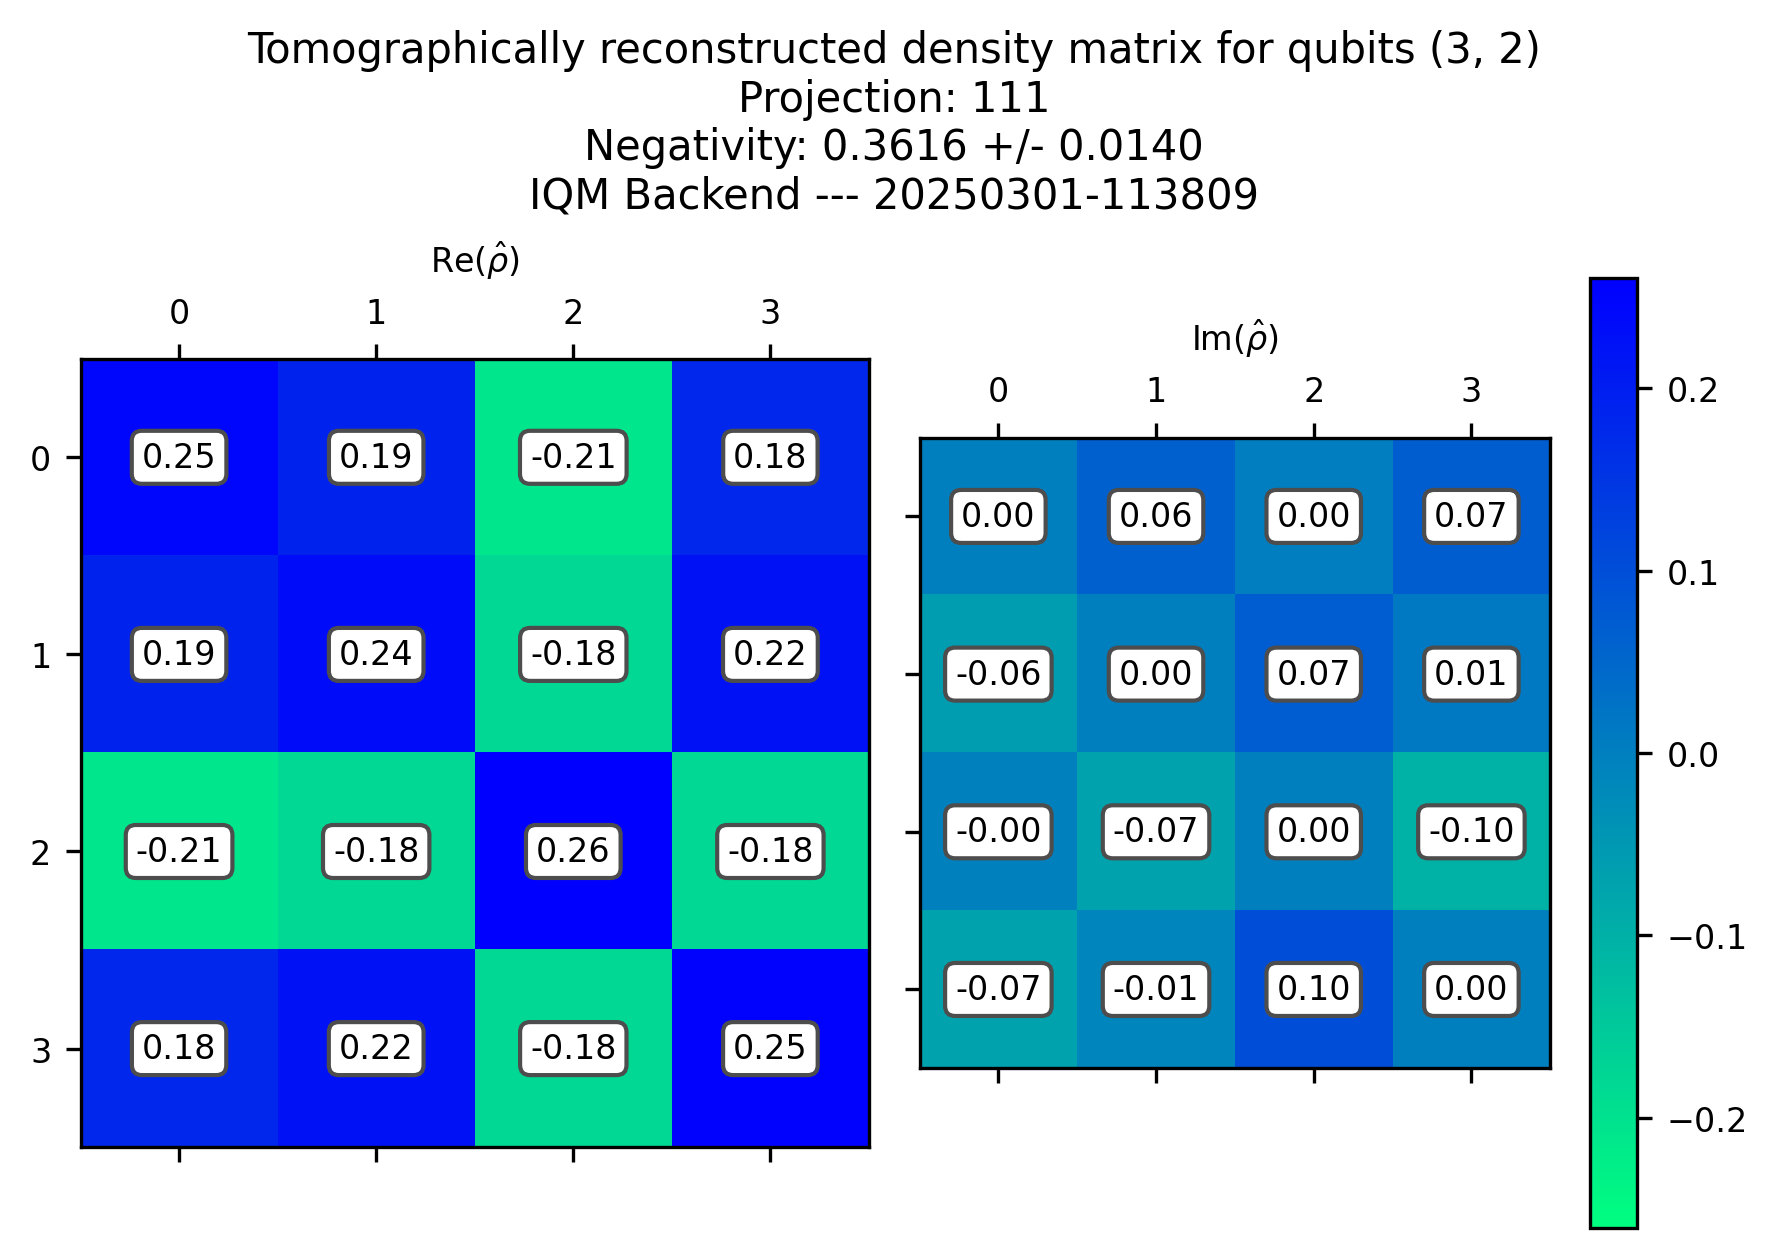

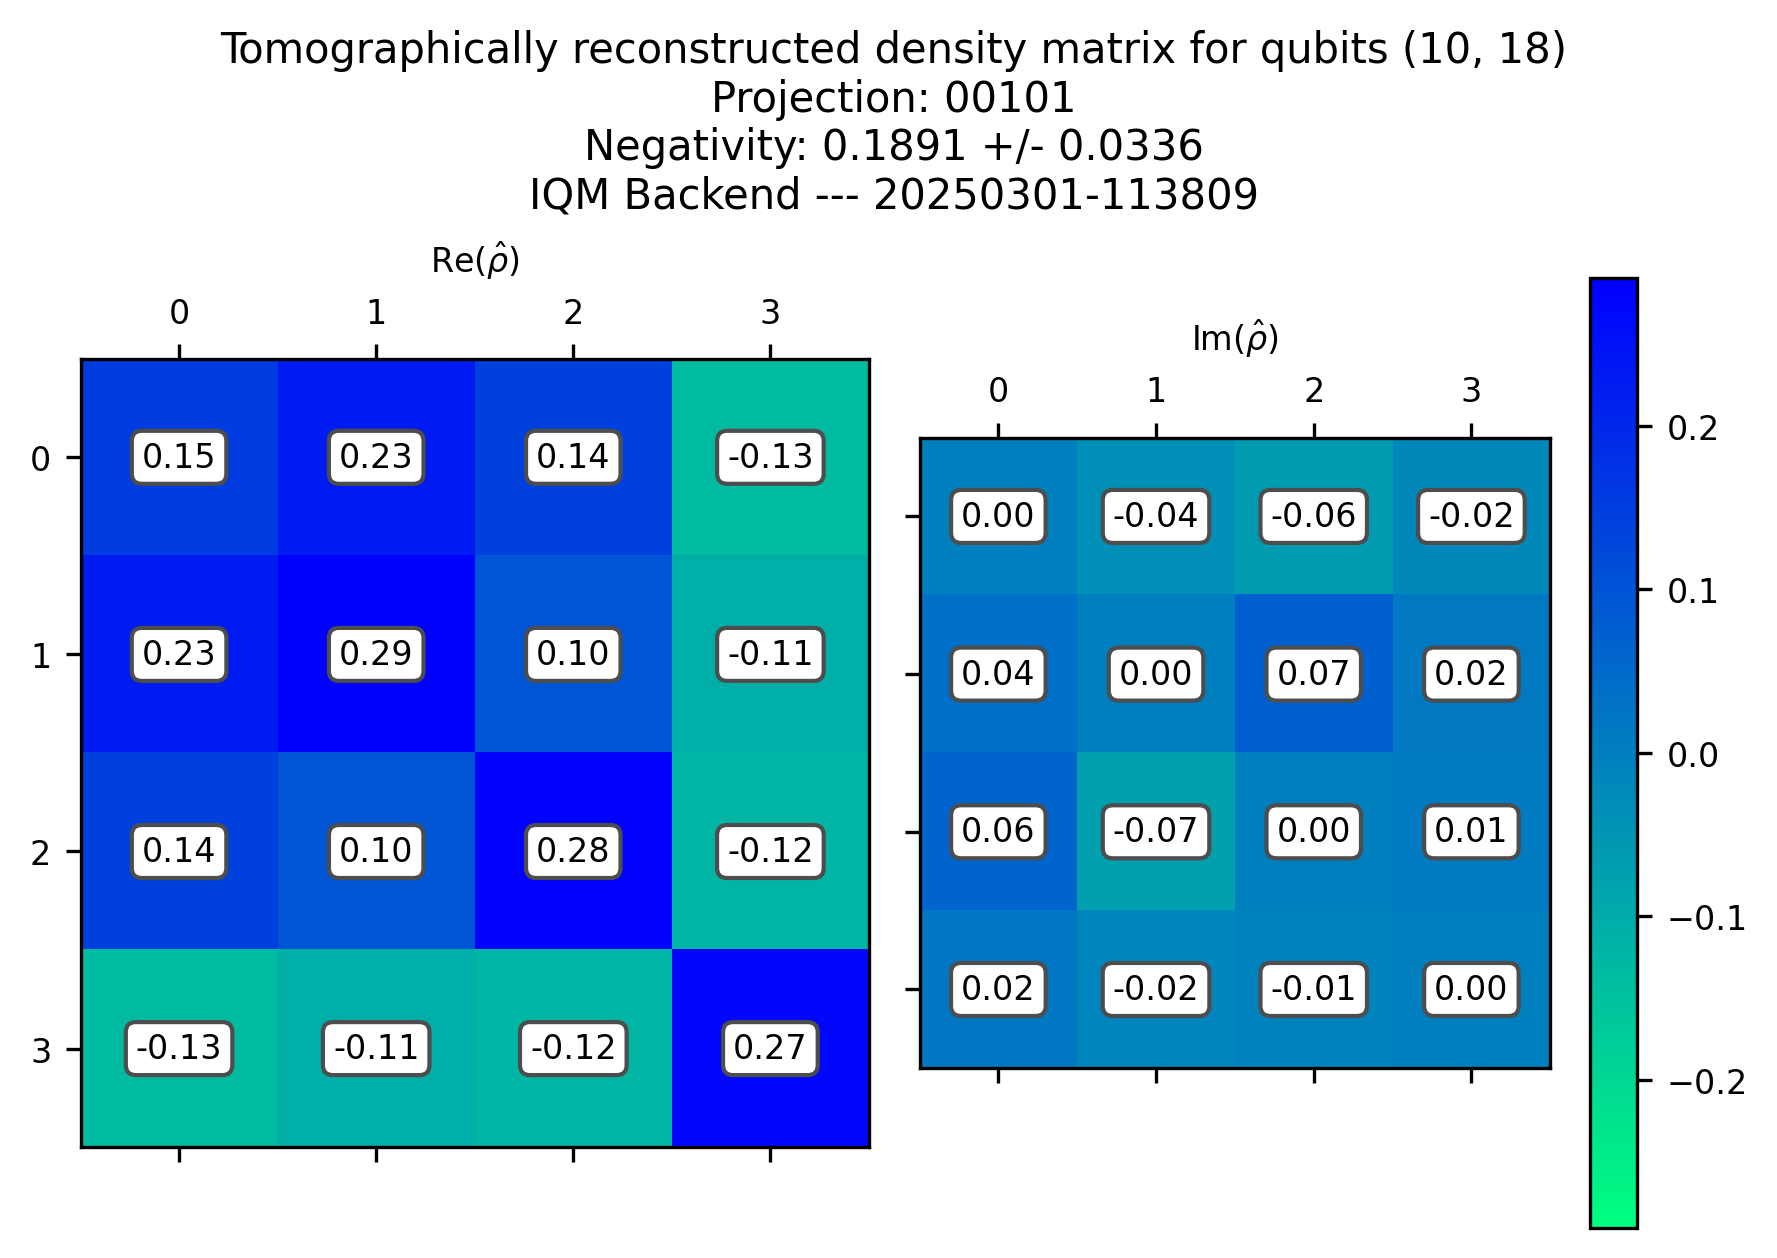

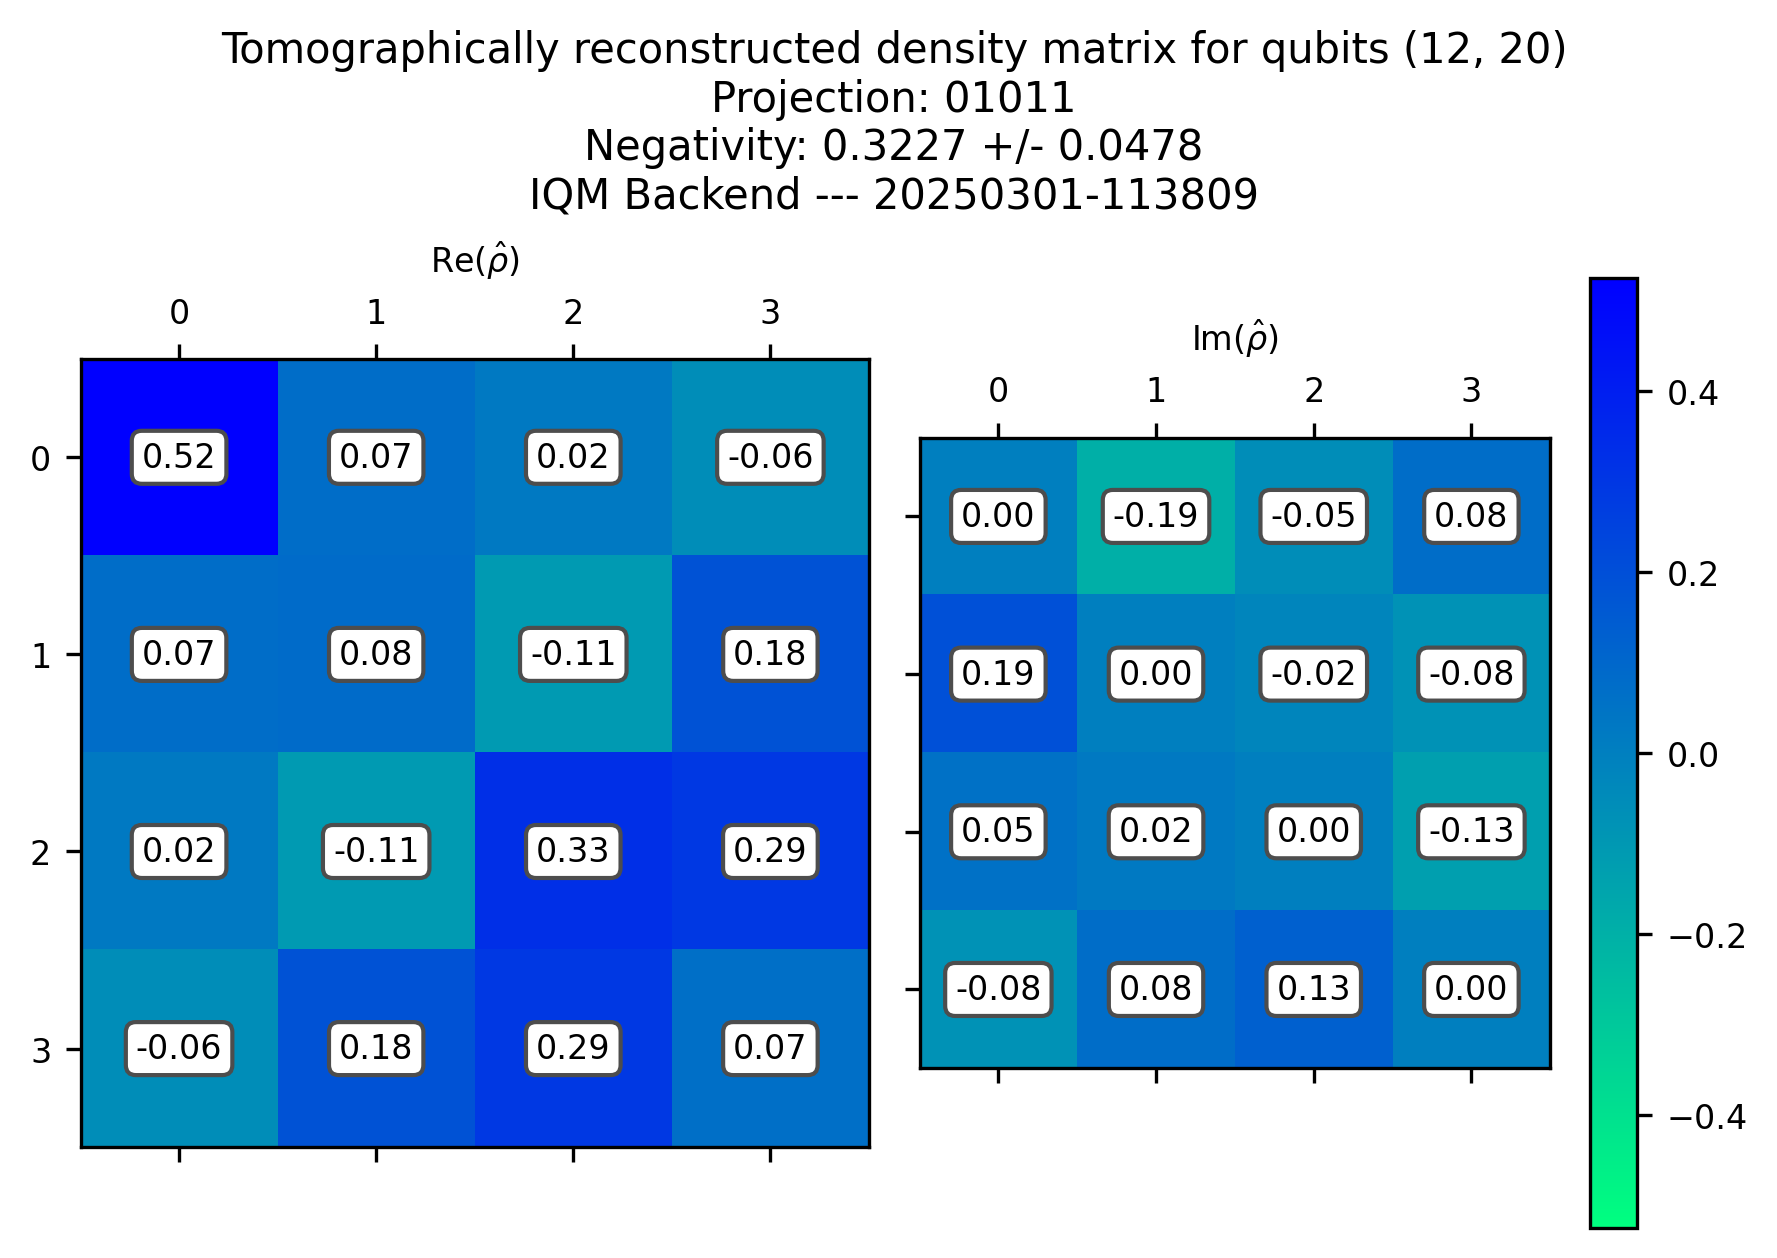

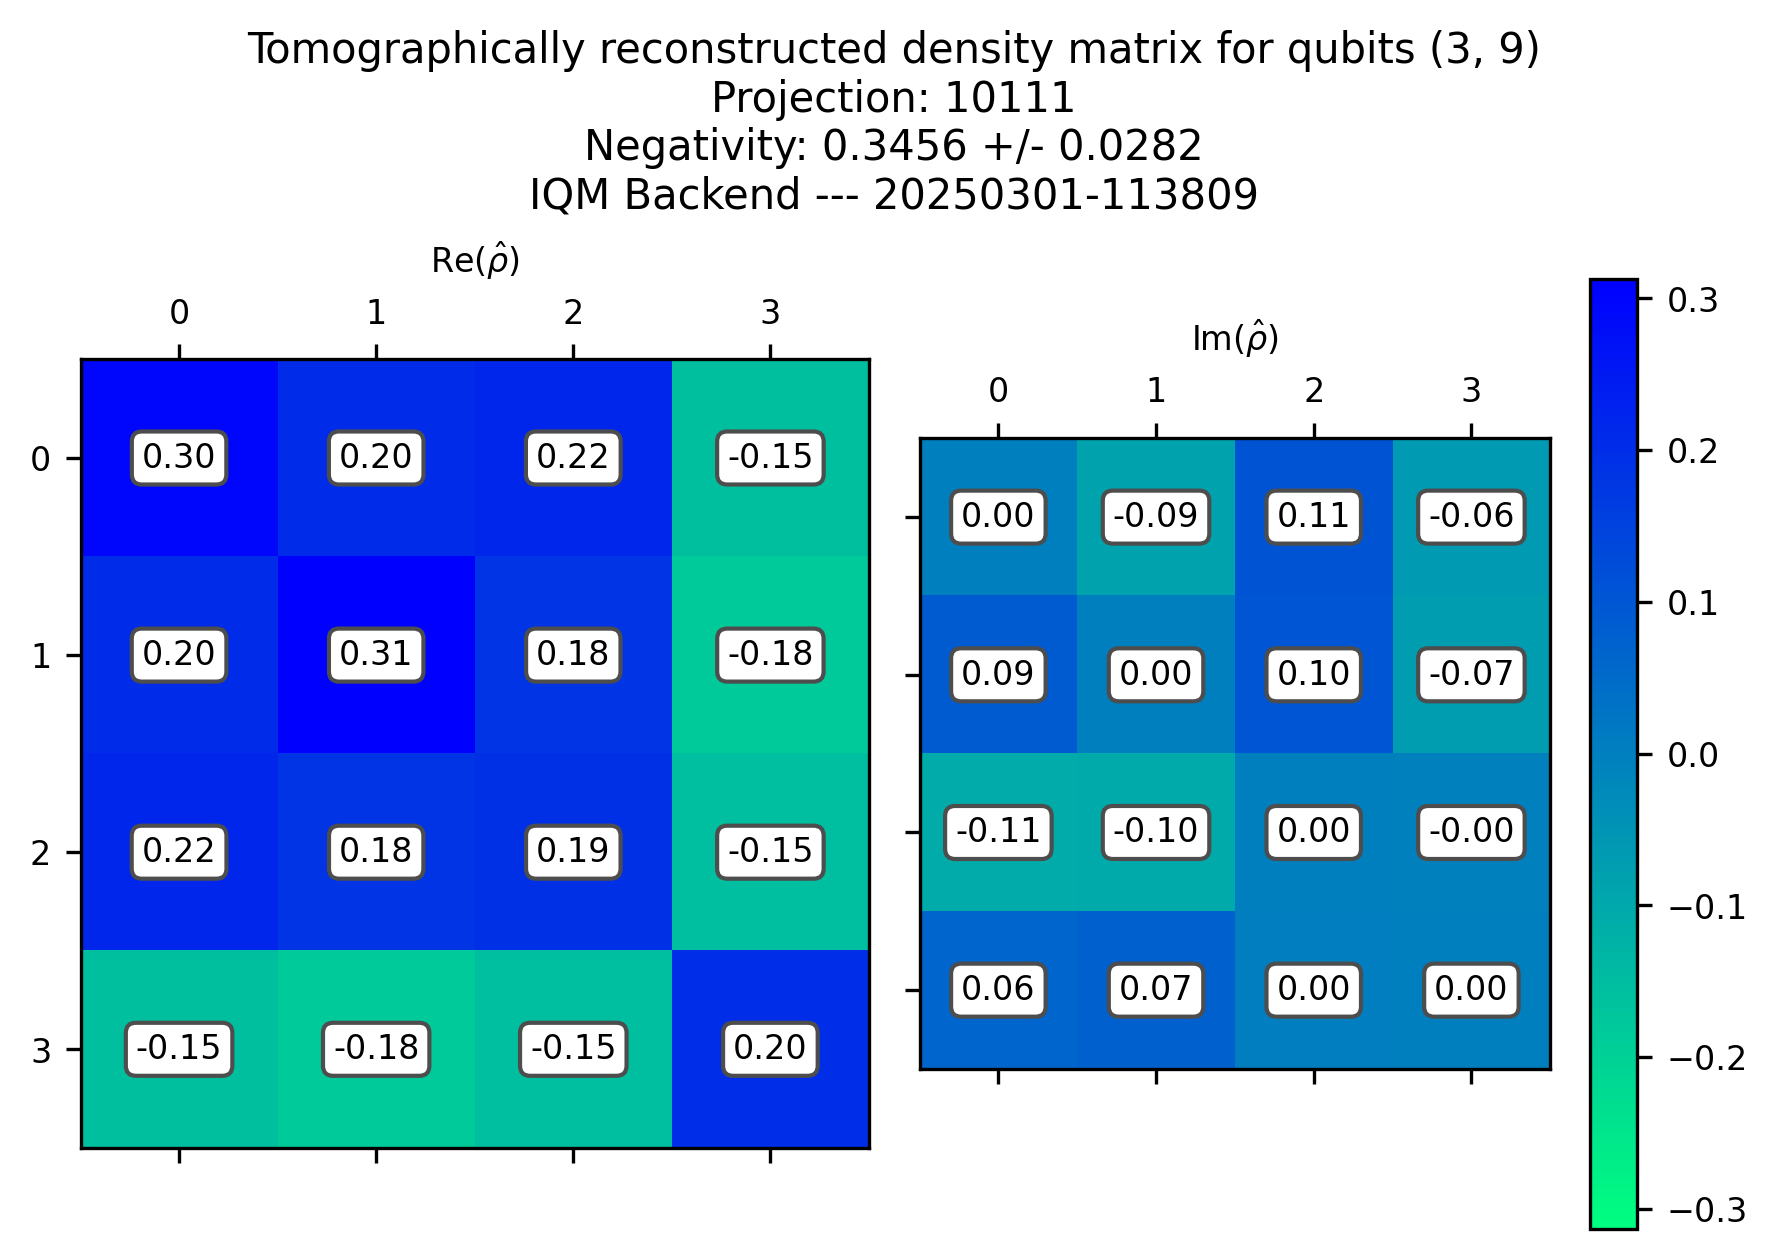

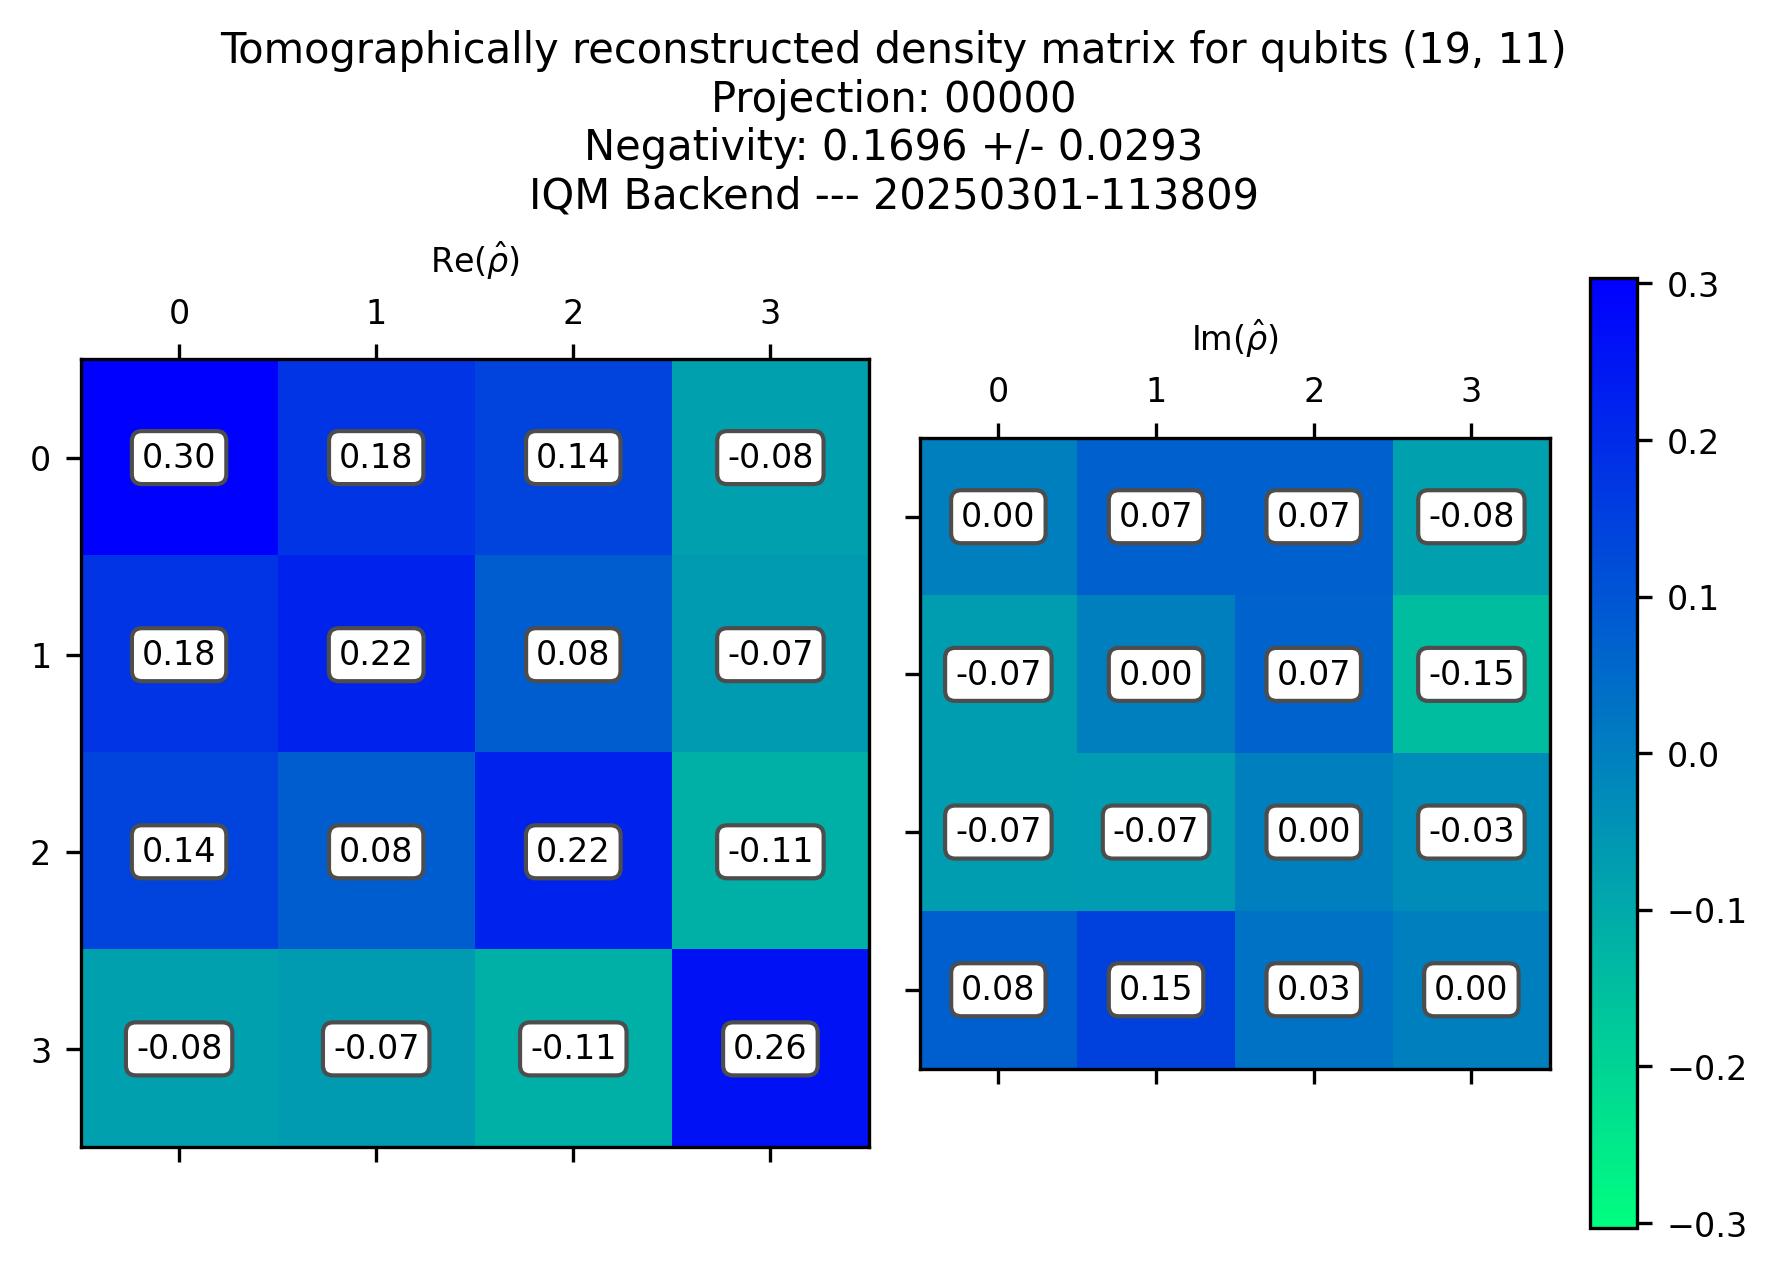

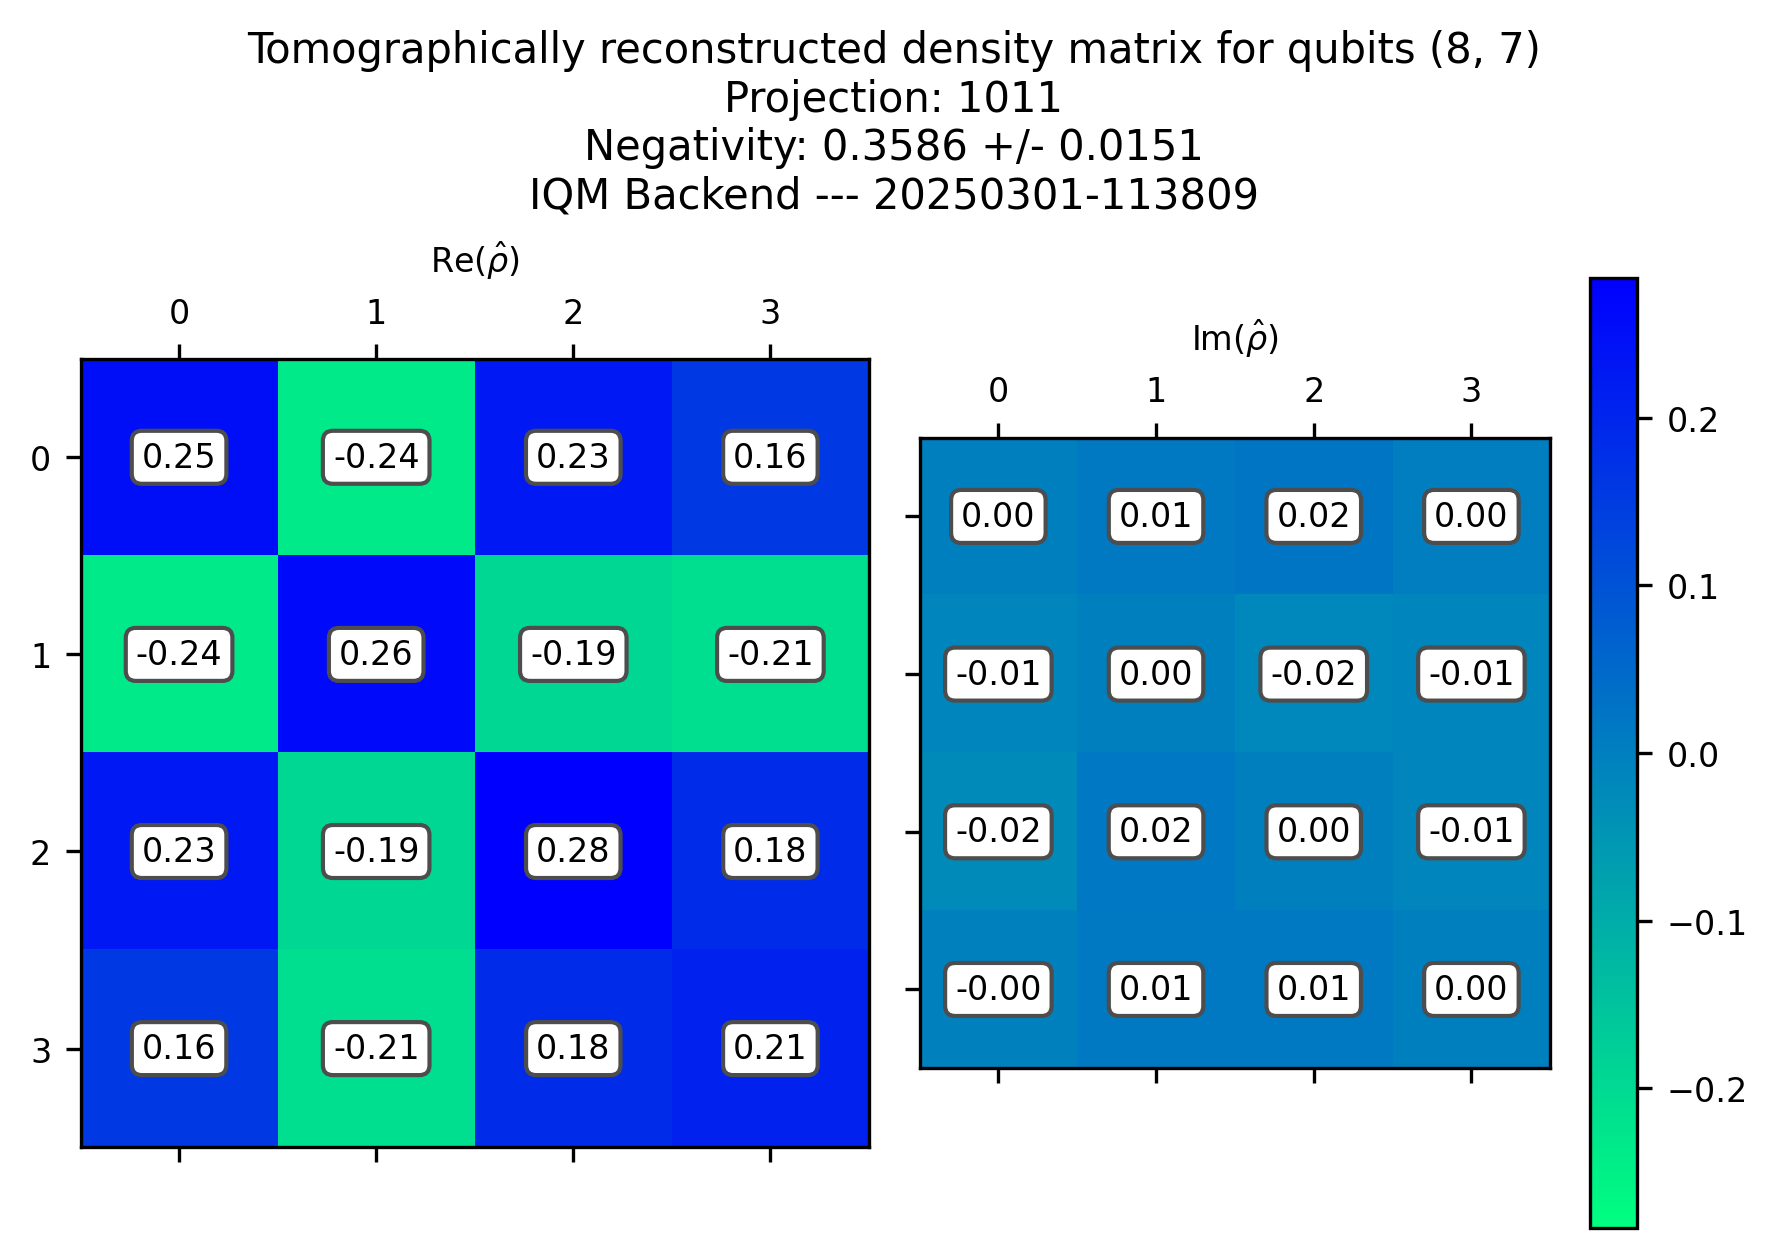

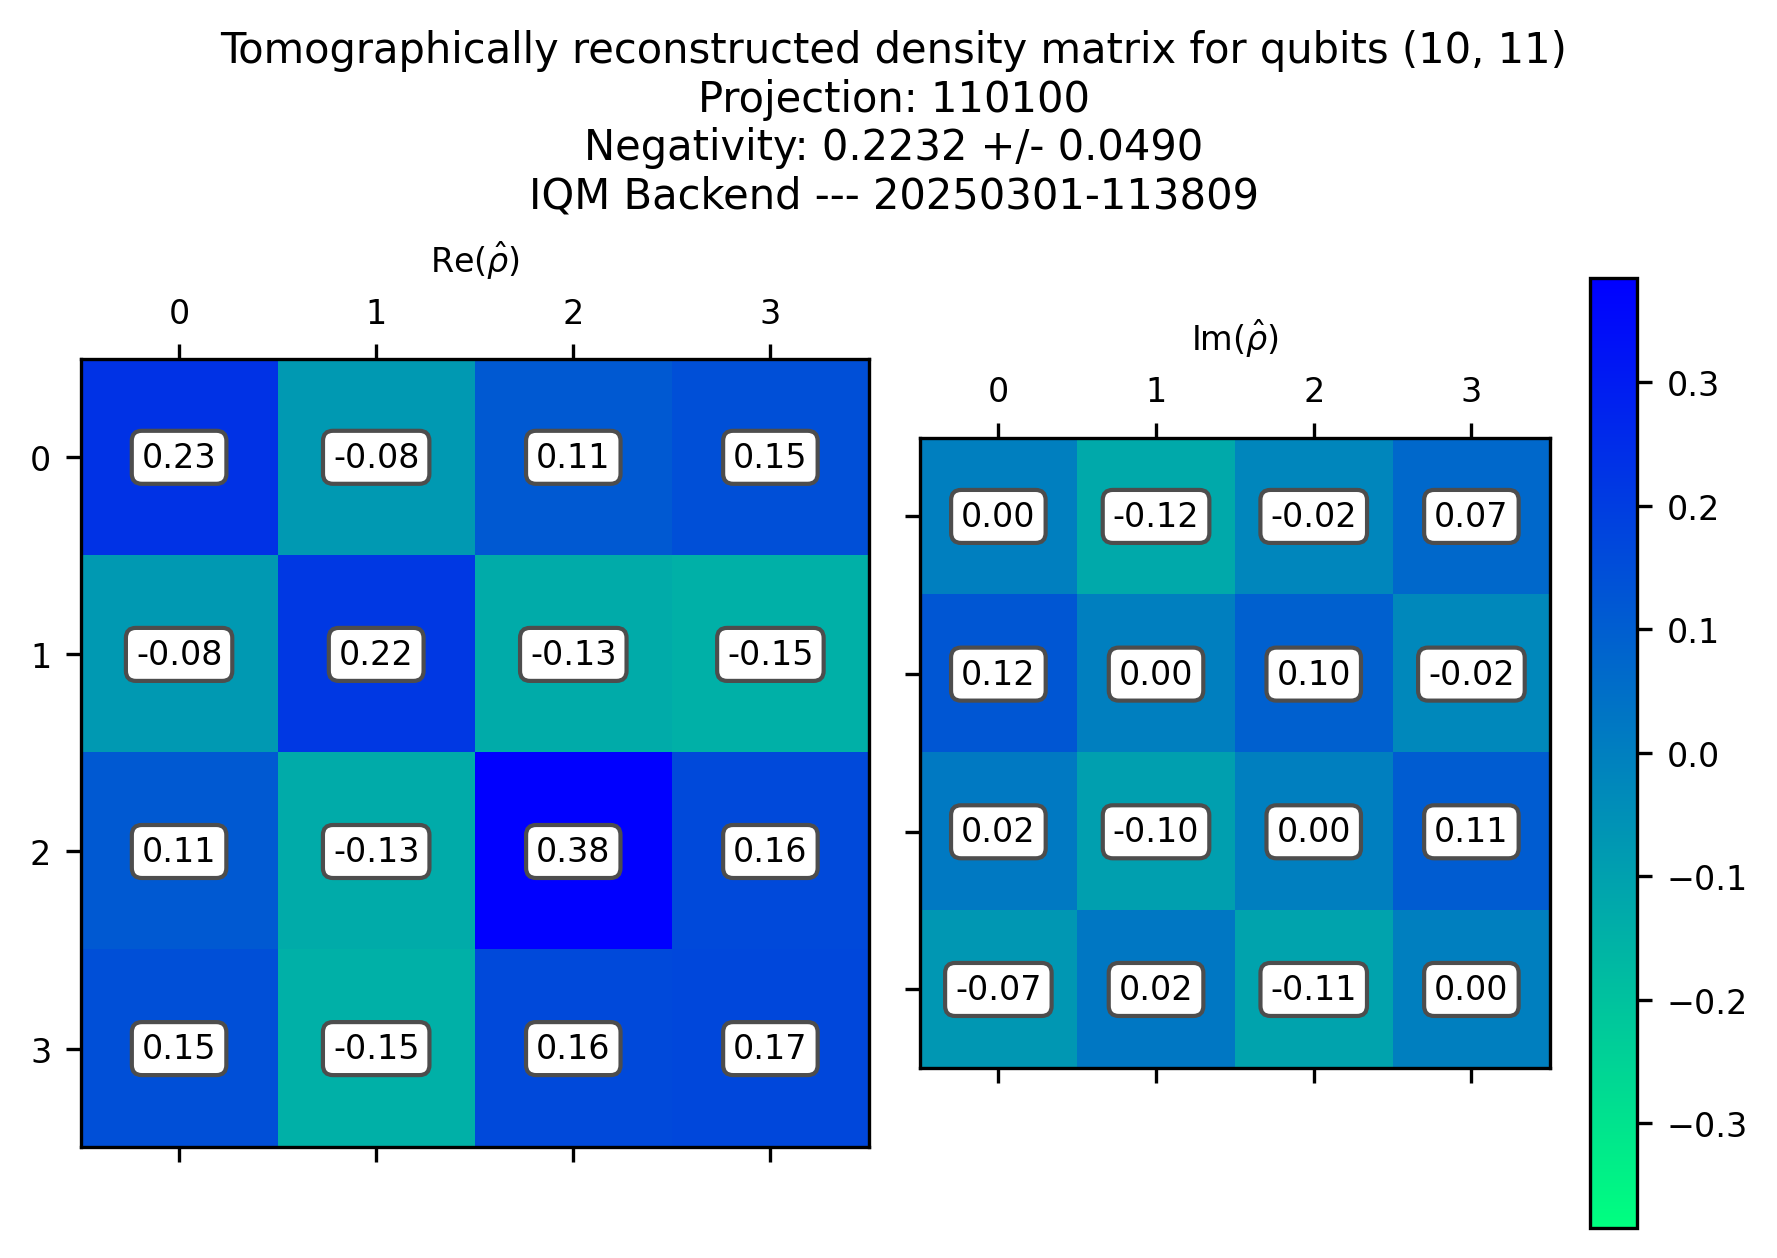

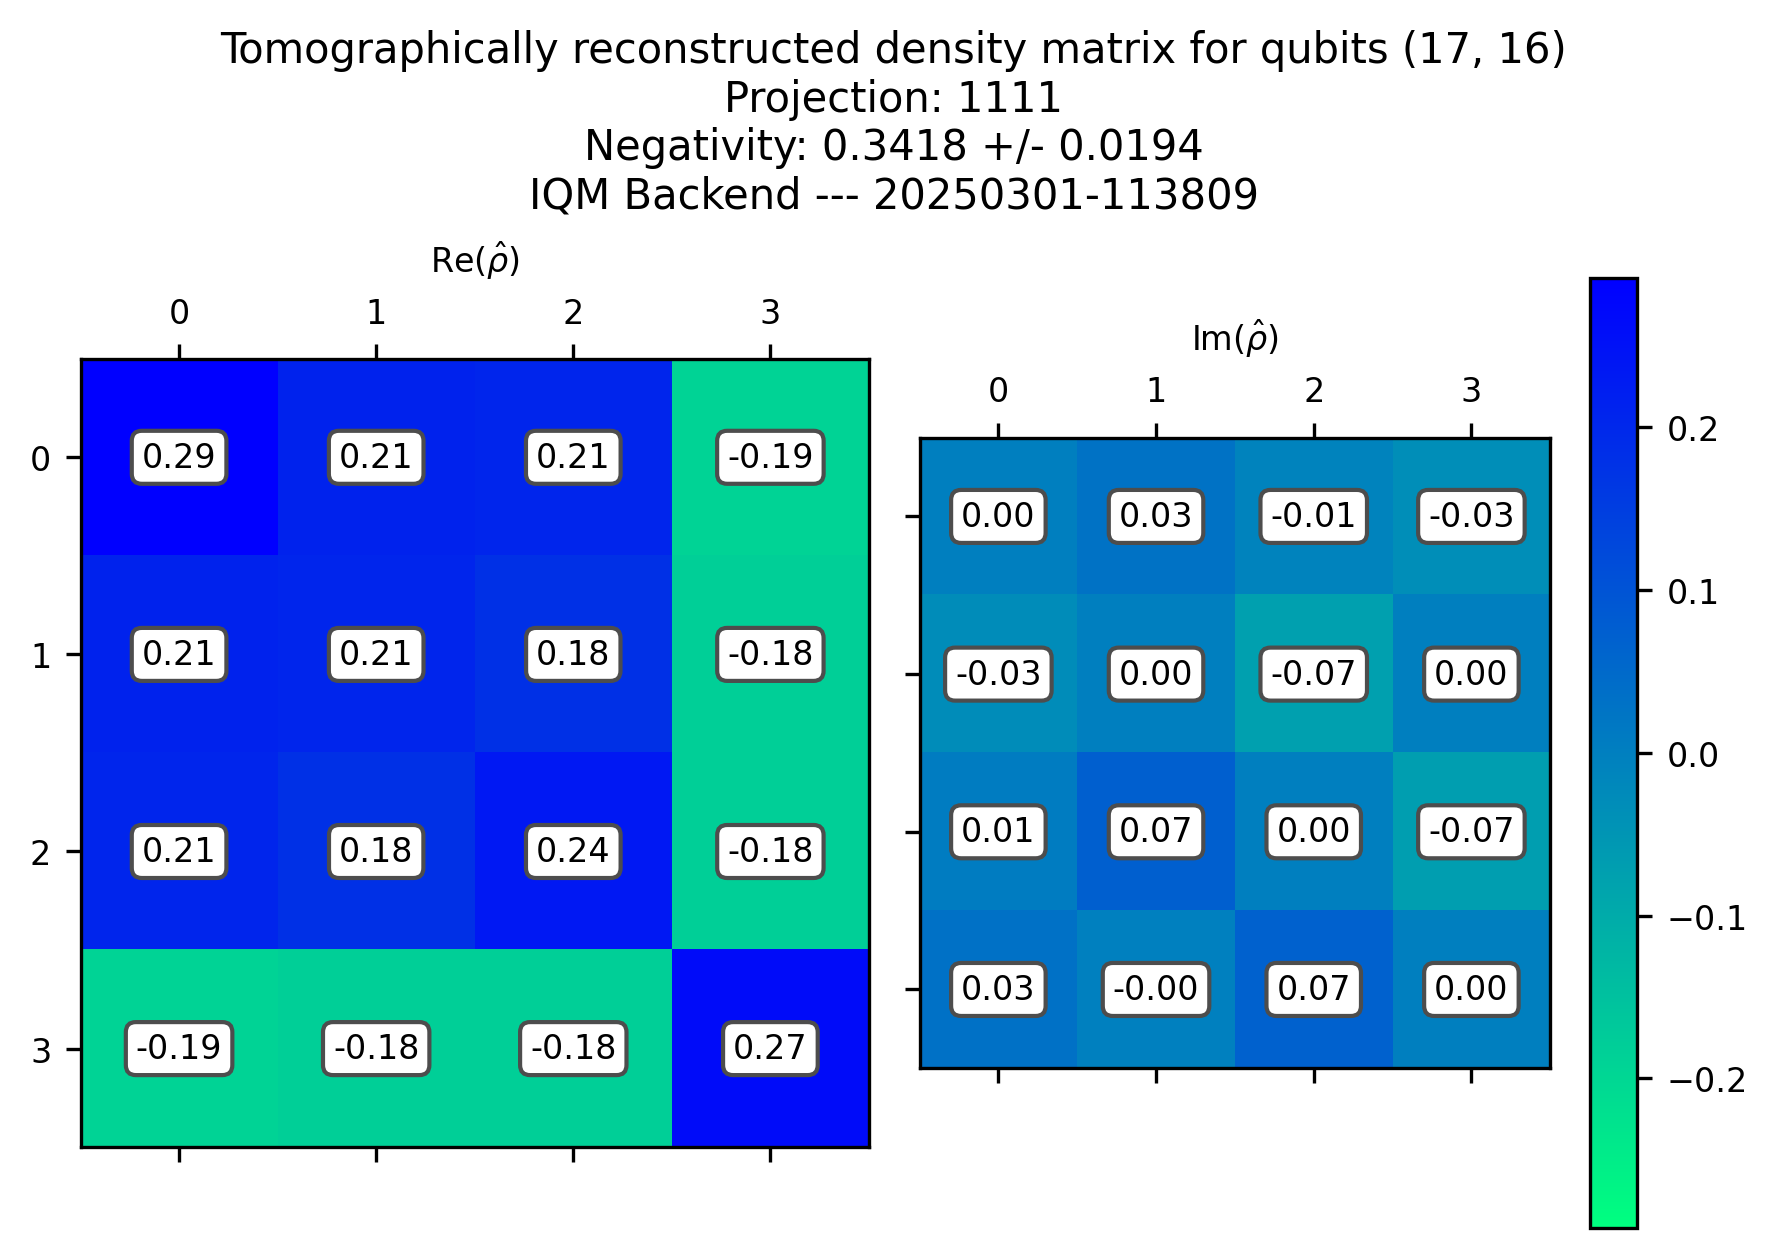

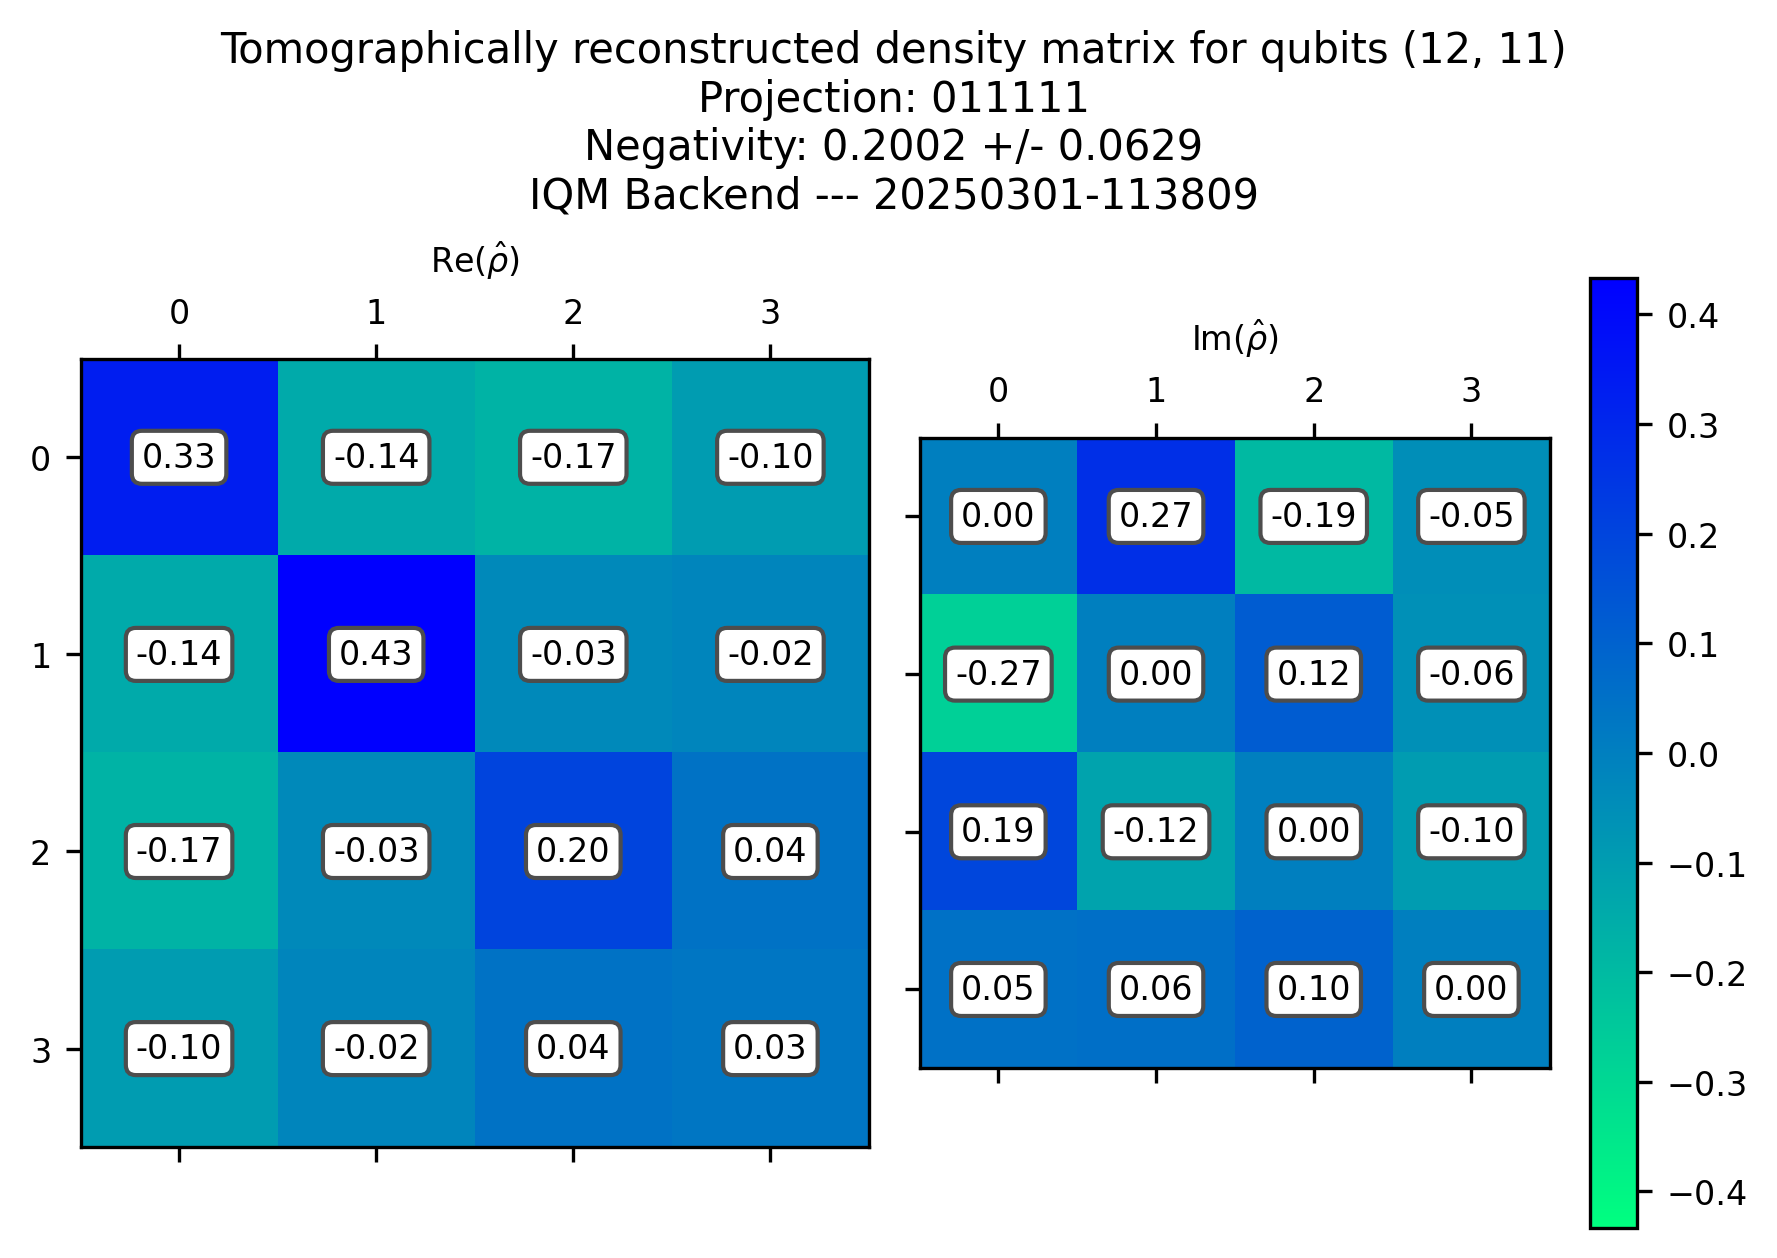

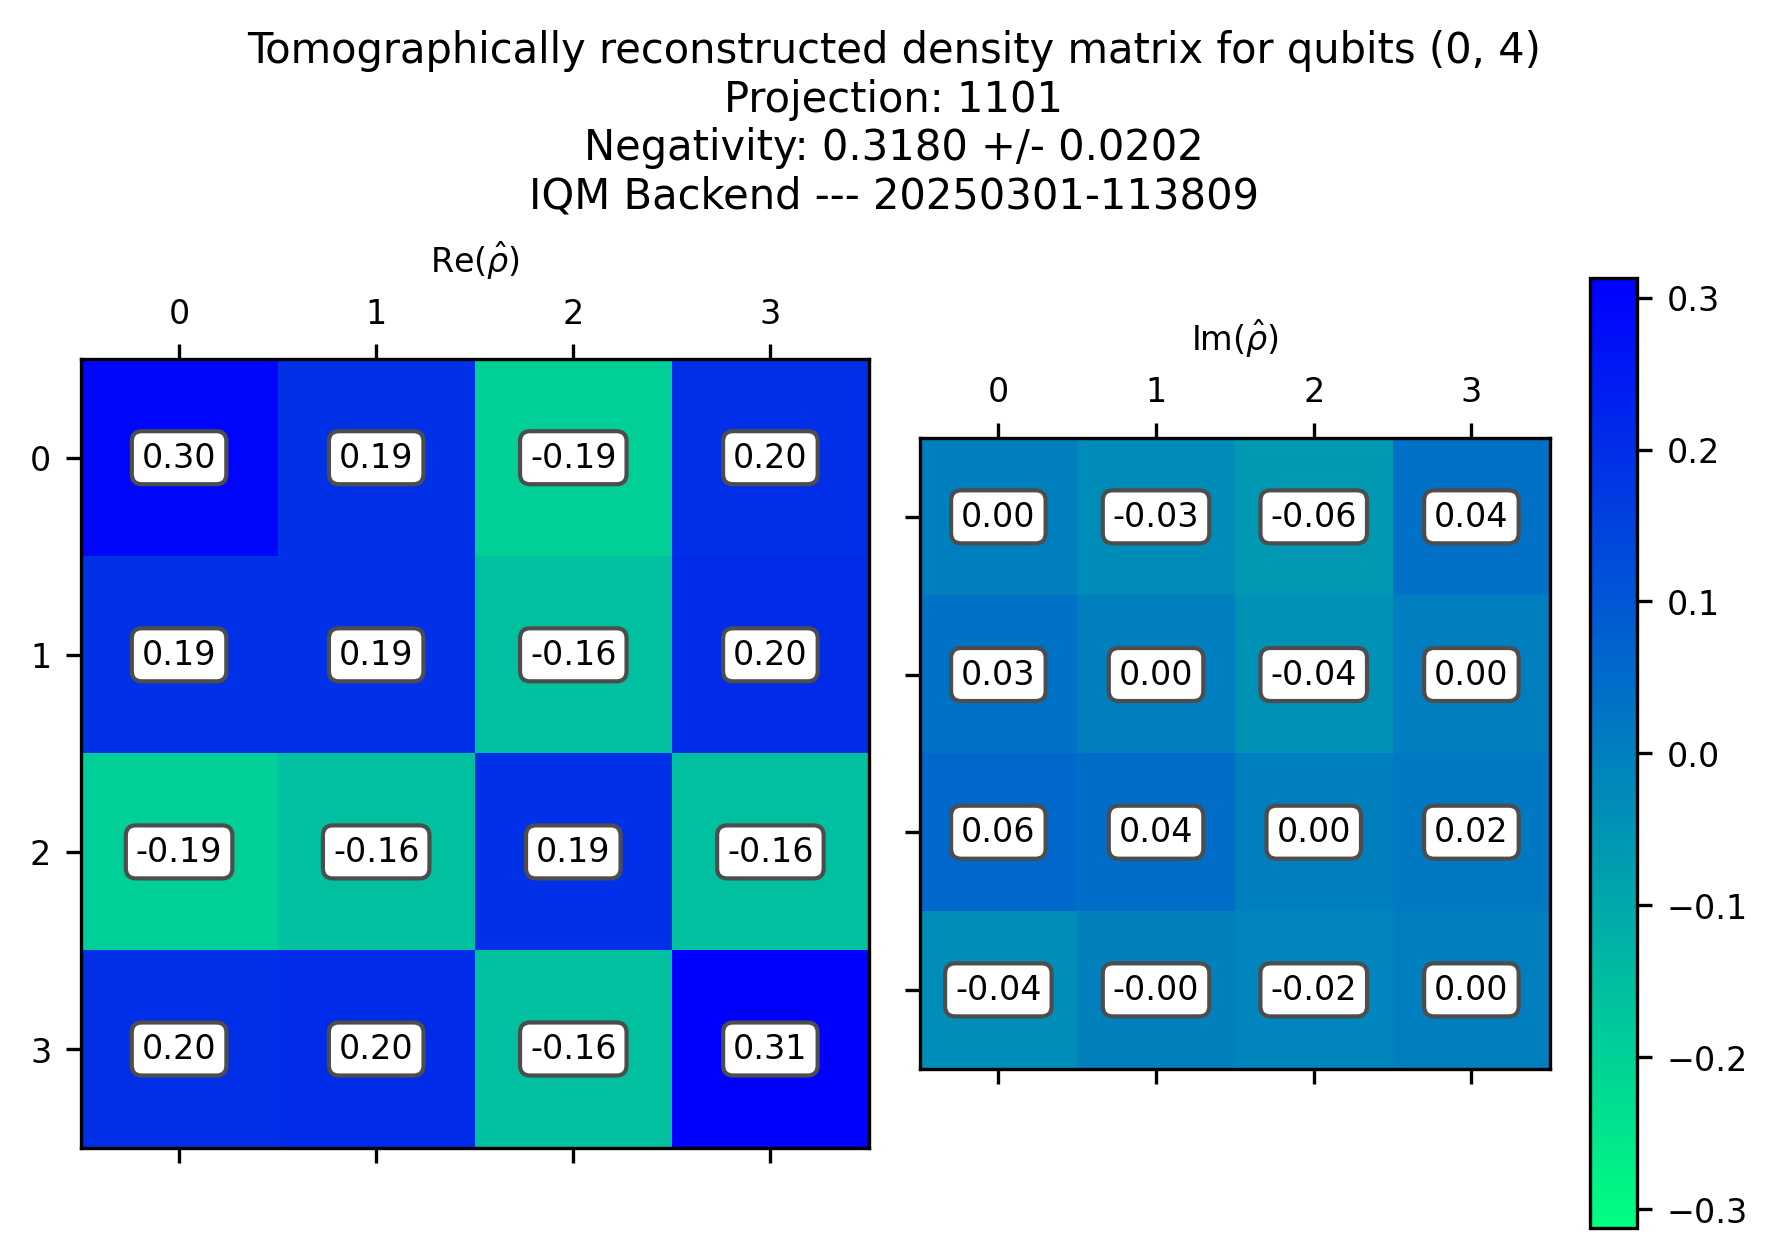

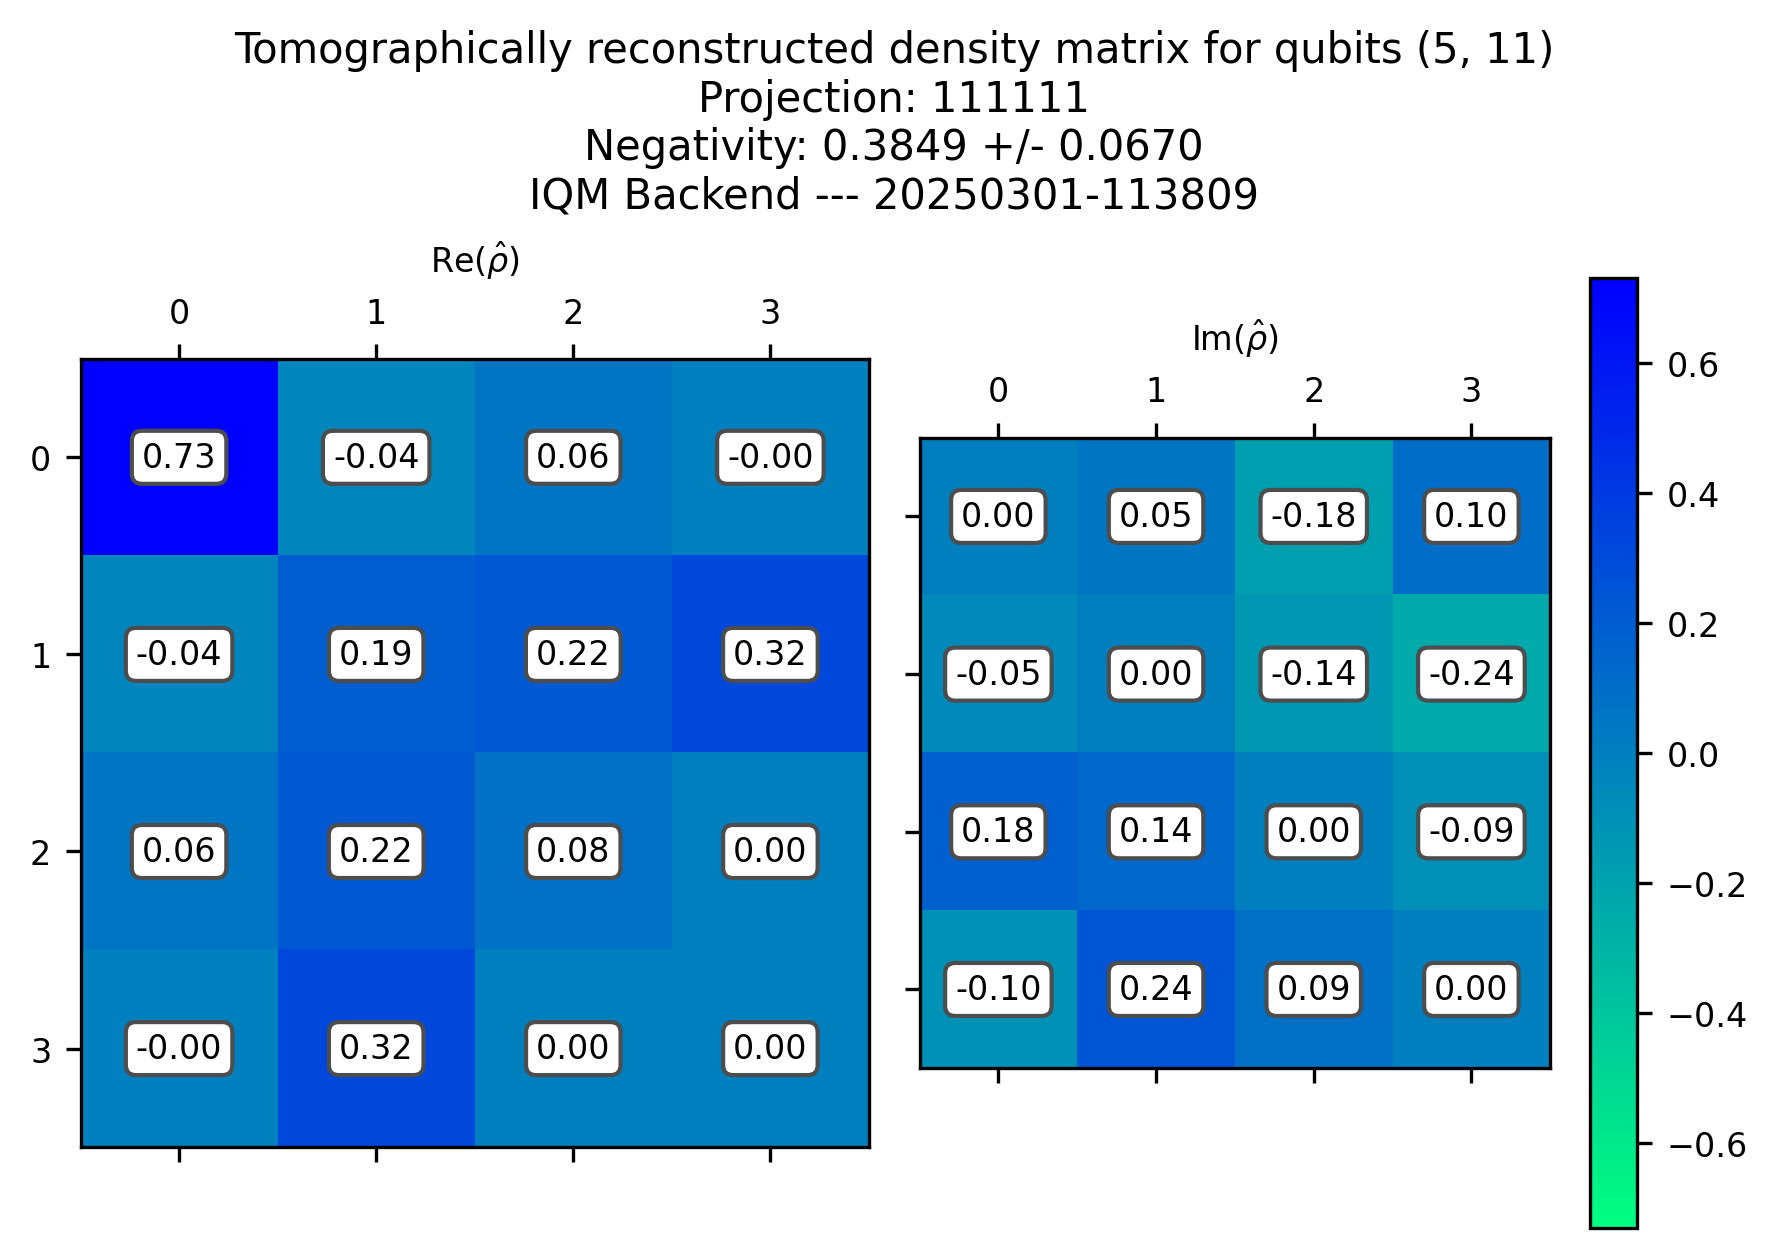

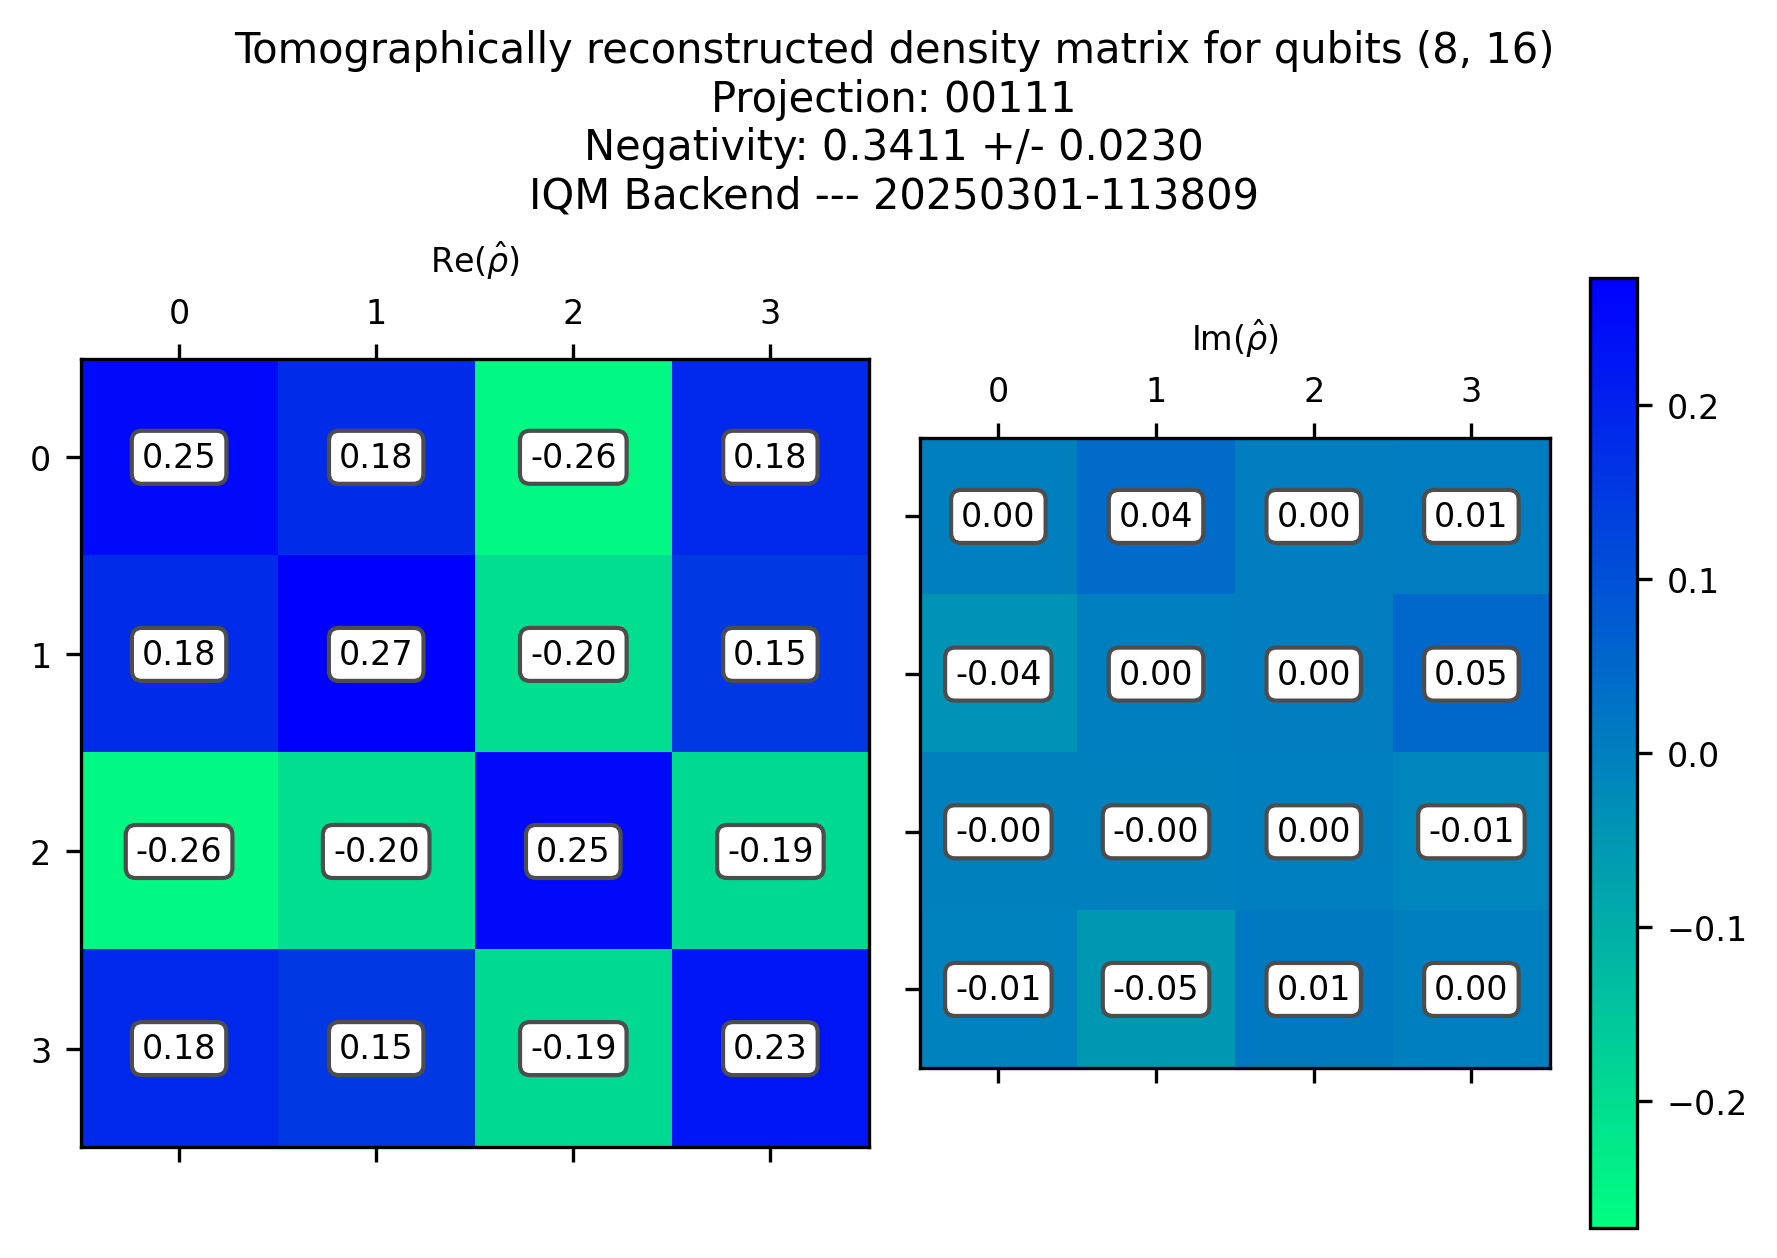

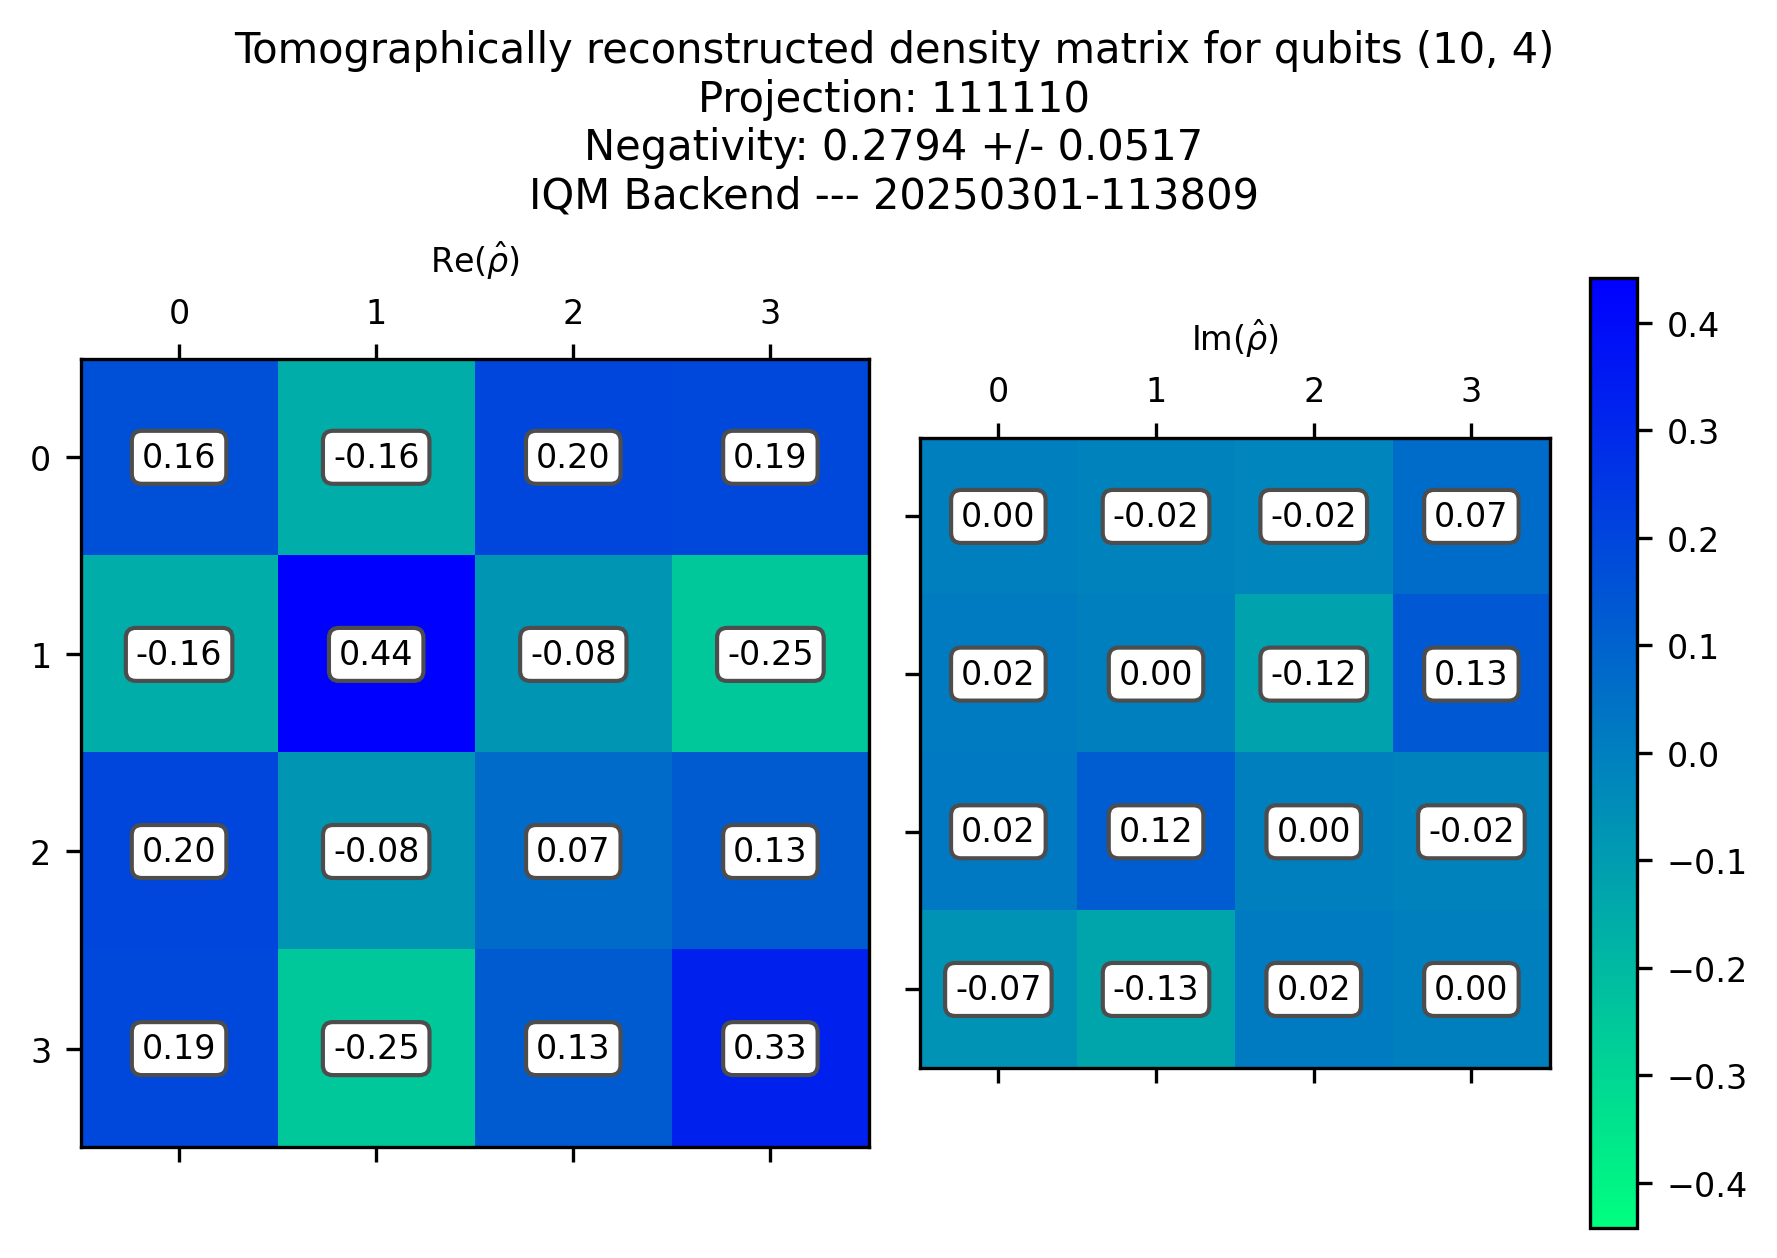

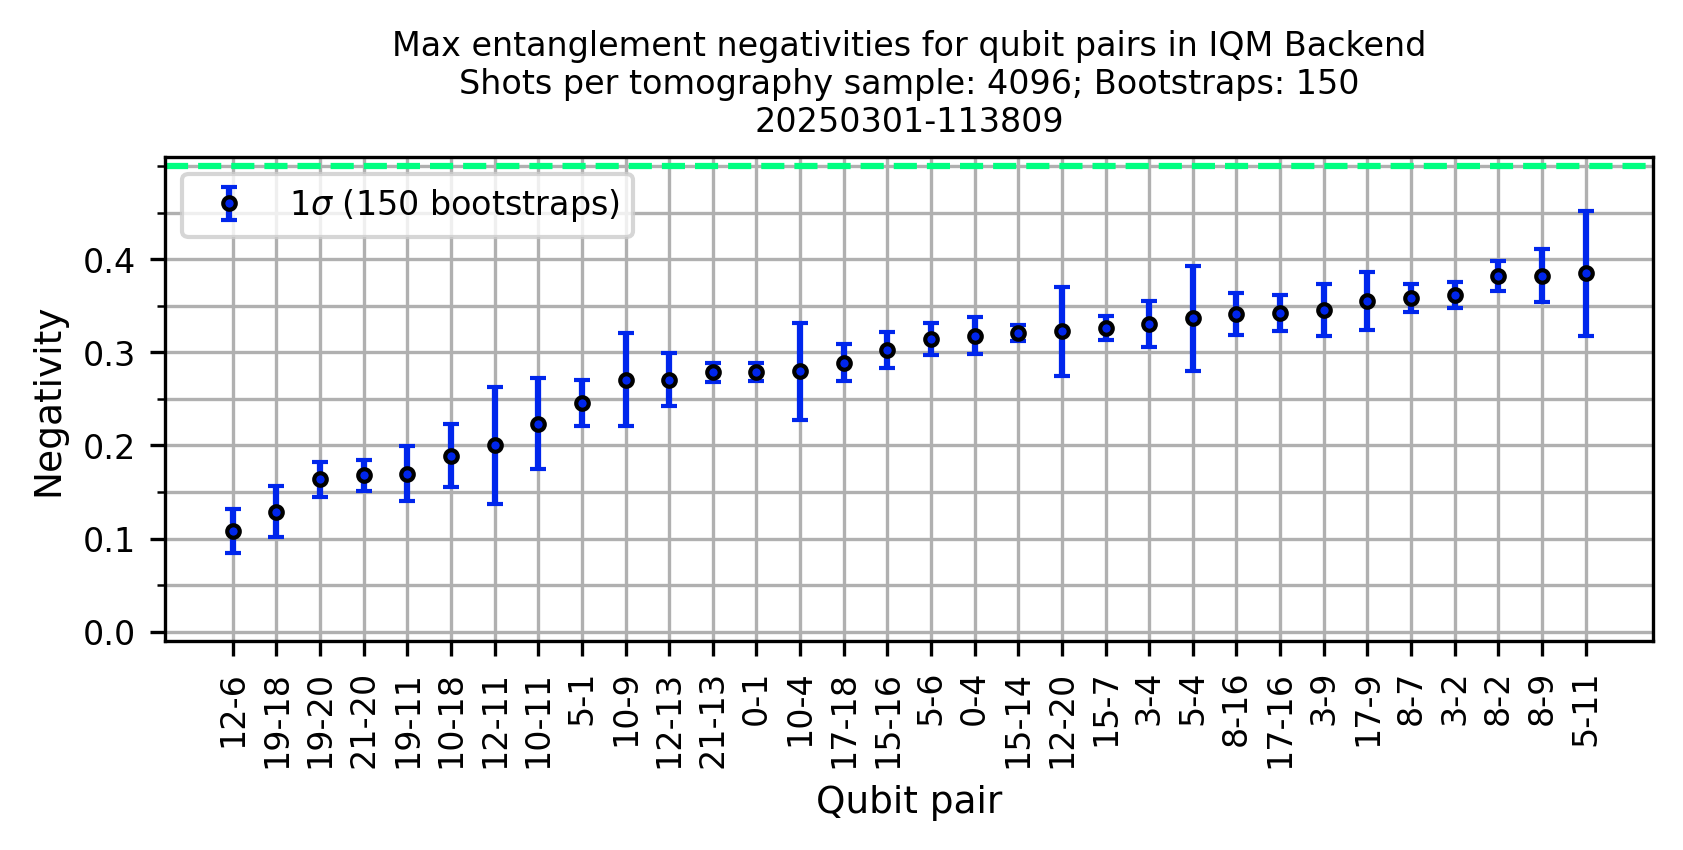

In [10]:
result_graphstate.plot_all()

In [11]:
result_graphstate.dataset.attrs.keys()

dict_keys(['session_timestamp', 'execution_timestamp', 'backend_configuration_name', 'backend_name', 'benchmark', 'shots', 'max_gates_per_batch', 'calset_id', 'routing_method', 'physical_layout', 'qubits', 'tomography', 'num_bootstraps', 'n_random_unitaries', 'n_median_of_means', 'time_circuit_generation', 'all_unprojected_qubits', 'all_projected_qubits', 'all_pair_groups', 'all_neighbor_groups', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 'all_tomography_states', 'all_negativities', 'max_negativities'])

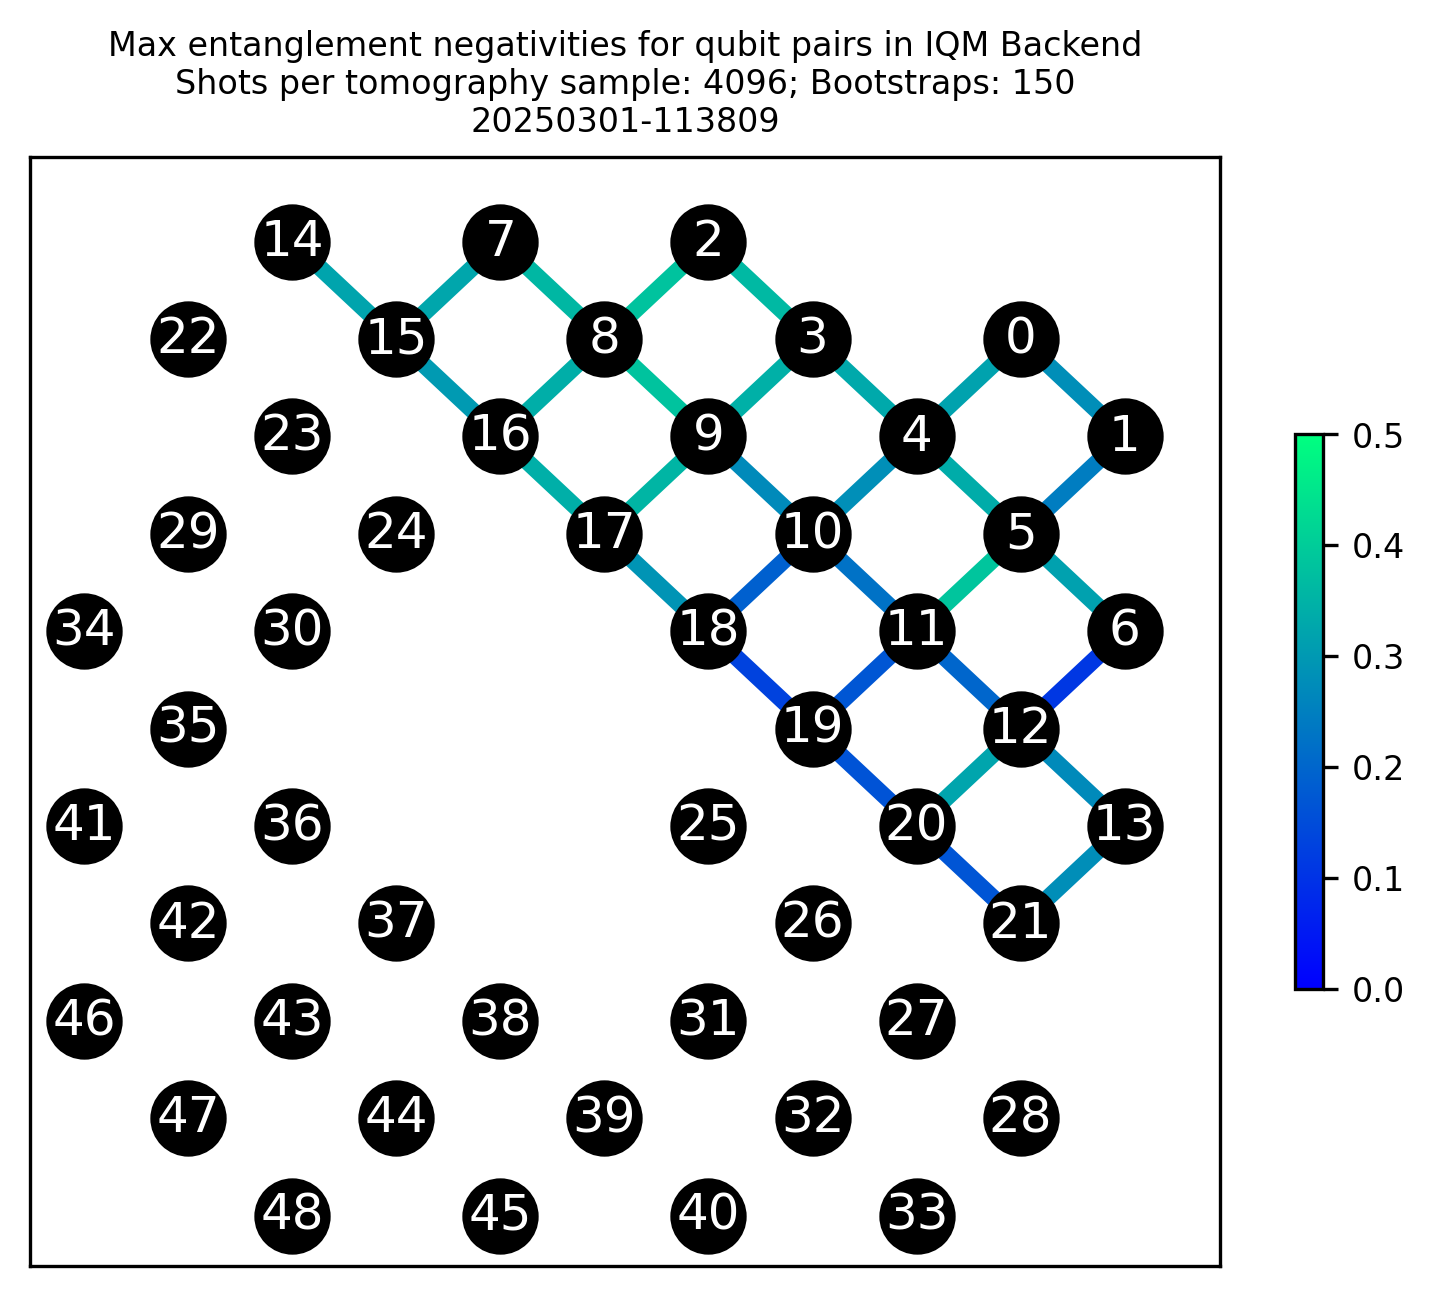

In [16]:
f_name, fig = plot_max_negativities_graph(
    negativities=result_graphstate.dataset.attrs['max_negativities'],
    backend=backend,
    timestamp=result_graphstate.dataset.attrs['execution_timestamp'],
    tomography=result_graphstate.dataset.attrs['tomography'],
    num_shots=result_graphstate.dataset.attrs['shots'],
    num_bootstraps=result_graphstate.dataset.attrs['num_bootstraps'])

fig

In [13]:
for qubits, x in result_graphstate.dataset.attrs['max_negativities'].items():
    print(f"{qubits} bootstrap bias: {np.abs(x['value'] - x['boostrapped_average']):.2e}")
    print(f"\t (sample) {x['value']} | (adjusted) {(2*x['value'] - x['boostrapped_average'])}")

(19, 18) bootstrap bias: 9.26e-03
	 (sample) 0.12890888402651993 | (adjusted) 0.1196456416591104
(3, 4) bootstrap bias: 9.25e-03
	 (sample) 0.33031014074206655 | (adjusted) 0.32106163237601776
(15, 14) bootstrap bias: 1.14e-03
	 (sample) 0.3208376921035078 | (adjusted) 0.31969917773127926
(21, 13) bootstrap bias: 5.45e-04
	 (sample) 0.27877237904490515 | (adjusted) 0.27822727525544844
(5, 4) bootstrap bias: 2.85e-02
	 (sample) 0.3366262003648901 | (adjusted) 0.3081727118679822
(12, 13) bootstrap bias: 1.02e-02
	 (sample) 0.2707285565698585 | (adjusted) 0.26052962567368637
(17, 9) bootstrap bias: 7.08e-03
	 (sample) 0.35510665455168317 | (adjusted) 0.34802407572441113
(15, 7) bootstrap bias: 4.05e-03
	 (sample) 0.32615061087537084 | (adjusted) 0.32209746873897893
(19, 20) bootstrap bias: 6.70e-03
	 (sample) 0.16362007040123755 | (adjusted) 0.15692488548461508
(8, 9) bootstrap bias: 1.70e-02
	 (sample) 0.382493183006606 | (adjusted) 0.3654732311377612
(5, 1) bootstrap bias: 1.49e-03
	 (s

In [14]:
result_graphstate.dataset.attrs["all_neighbor_groups"]

{0: [{10, 11, 17, 20}, {0, 2, 5, 9, 10}, {7, 16}, {12, 20}],
 1: [{0, 1, 3, 6, 10, 11}, {6, 11, 20, 21}, {3, 8, 10, 16, 18}, {8, 14, 16}],
 2: [{11, 12, 18, 21}, {2, 3, 7, 10, 16, 17}, {0, 4, 6, 11}],
 3: [{3, 4, 8, 11, 17, 18}, {7, 8, 14, 17}, {5, 11, 13, 20}, {4, 5}],
 4: [{3, 7, 9, 16}, {9, 10, 16, 19}, {12, 13, 19}, {1, 4, 11, 12}],
 5: [{4, 8, 9}, {4, 9, 11, 17, 19}, {6, 11, 13, 19, 21}],
 6: [{2, 4, 8, 10, 17}, {5, 10, 12, 18, 20}],
 7: [{2, 9, 15, 16}, {4, 5, 9, 12, 18, 19}],
 8: [{8, 9, 15, 18}, {5, 6, 10, 13, 19, 20}, {1, 3, 5, 10}],
 9: [{1, 4, 6, 10, 12, 19}, {2, 7, 9, 15, 17}],
 10: [{0, 3, 5, 9, 11, 18}]}

In [15]:
benchmark_graphstate.circuits.benchmark_circuits[0].circuit_groups[0].circuits[0].draw(output='mpl',fold=0,style='iqp')